<h1 style="color: green;">Summary</h1>
There are several objectives of exploratory data analysis:<br>
<ol>
<li>Tell the data story i.e. what useful information we can extract<br>from the data baring in mind
       statistical assumptions about the data</li><br>
<li>Find what's wrong with the data so that we can fix it later.</li>
</ol>      
<p style="color: black;">
In this section the following are accomplished:
<ul>
<li>Separate features into numeric and categorical</li>
<li>Perform exploratory data analysis</li>
<li>Explore interesting relationships between the target and the features</li>
</ul>
All of this is done with the raw data extracted in <b>Data Extraction</b>
</p>


<h1 style="color: green;">Import libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# for Q-Q plots
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green;">Setting seaborn colour palette</h1>

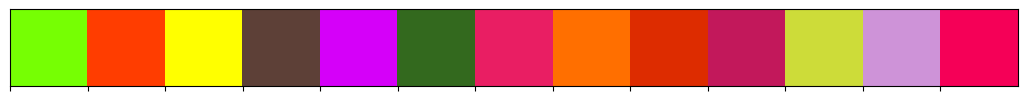

In [2]:
palette = ['#76FF03','#FF3D00','#FFFF00','#5D4037','#D500F9','#33691E','#E91E63','#FF6F00','#DD2C00','#C2185B',
           '#CDDC39','#CE93D8','#F50057'
          ]
sb.palplot(palette)
sb.set_palette(palette)

<h1 style="color: green;">Reading data</h1>

In [3]:
raw0 = pd.read_csv("../2. Data/homeshopping.csv")
raw0.head()

Total_Nbr_of_Items  Total_Price         Venue Payment_Type Card_Source  \
0                   1         2.98          eBay         Card          DD   
1                   1         3.29          eBay         Card          DD   
2                   1        10.89          eBay         Card          DD   
3                   1        10.00  Abbey Sports         Card          DB   
4                   1         5.91          eBay         Card          DD   

   Date_diff Week_day_name  Nbr_trips_per_wk  Nbr_items_per_wk  \
0        0.0        Friday                 3                 3   
1        0.0        Friday                 3                 3   
2        0.0        Friday                 3                 3   
3        5.0     Wednesday                 4                 4   
4        1.0      Thursday                 4                 4   

   Nbr_items_wk_perc  ...  Clothes_and_shoes_wk_perc  \
0           0.333333  ...                        0.0   
1           0.333333  ...                        0.0   
2           0.333333  ...                        0.0   
3           0.250000  ...                        0.0   
4           0.250000  ...                        0.0   

   Clothes_and_shoes_exp_receipt  Clothes_and_shoes_exp_wk  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   

   Clothes_and_shoes_wk_exp_perc  House_and_kitchen_receipt  \
0                            0.0                          0   
1                            0.0                          0   
2                            0.0                          0   
3                            0.0                          0   
4                            0.0                          0   

  House_and_kitchen_wk  House_and_kitchen_wk_perc  \
0                    0                        0.0   
1                    0                        0.0   
2                    0                        0.0   
3                    0                        0.0   
4                    0                        0.0   

   House_and_kitchen_exp_receipt  House_and_kitchen_exp_wk  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   

   House_and_kitchen_wk_exp_perc  
0                            0.0  
1                            0.0  
2                            0.0  
3                            0.0  
4                            0.0  

[5 rows x 156 columns]

In [4]:
print(raw0.shape)

(888, 156)


In [5]:
sum(raw0.isnull().mean()>0)
# there are no missing values

0

In [6]:
num_feats = [var for var in raw0.columns if raw0[var].dtype != 'O' and var != 'Trips_response_lt_5']
cat_feats = [var for var in raw0.columns if raw0[var].dtype == 'O']

In [7]:
print(f"Length of numeric features: {len(num_feats)}\nLength categorical features: {len(cat_feats)}")

Length of numeric features: 150
Length categorical features: 5


In [8]:
num_feats

['Total_Nbr_of_Items',
 'Total_Price',
 'Date_diff',
 'Nbr_trips_per_wk',
 'Nbr_items_per_wk',
 'Nbr_items_wk_perc',
 'Expenditure_per_wk',
 'Total_Exp_wk_perc',
 'AVG_exp_item_per_wk',
 'hour',
 'Bread',
 'Cooked_meats',
 'Raw_meats',
 'Eating_out',
 'Snacks',
 'Drinks',
 'Vegetables',
 'Fruit',
 'Cooking_base',
 'Dairy_produce',
 'Seasoning',
 'Breakfast',
 'Transport',
 'DIY',
 'Electronics',
 'Education',
 'Tech_and_services',
 'Cosmetics_and_selfcare',
 'Clothes_and_shoes',
 'House_and_kitchen',
 'Bread_receipt',
 'Bread_wk',
 'Bread_wk_perc',
 'Bread_exp_receipt',
 'Bread_exp_wk',
 'Bread_wk_exp_perc',
 'Cooked_meats_receipt',
 'Cooked_meats_wk',
 'Cooked_meats_wk_perc',
 'Cooked_meats_exp_receipt',
 'Cooked_meats_exp_wk',
 'Cooked_meats_wk_exp_perc',
 'Raw_meats_receipt',
 'Raw_meats_wk',
 'Raw_meats_wk_perc',
 'Raw_meats_exp_receipt',
 'Raw_meats_exp_wk',
 'Raw_meats_wk_exp_perc',
 'Eating_out_receipt',
 'Eating_out_wk',
 'Eating_out_wk_perc',
 'Eating_out_exp_receipt',
 'Eatin

In [9]:
cat_feats

['Venue', 'Payment_Type', 'Card_Source', 'Week_day_name', 'Part_of_day']

<h1 style="color: green;">Exploring numerical features</h1>

In [10]:
raw0[num_feats[:19]].describe()

Total_Nbr_of_Items  Total_Price   Date_diff  Nbr_trips_per_wk  \
count          888.000000   888.000000  888.000000        888.000000   
mean             5.654279    18.275045    1.516892          6.840090   
std              5.649961    73.447080    2.782160          3.598712   
min              1.000000     0.390000    0.000000          1.000000   
25%              1.000000     4.800000    0.000000          5.000000   
50%              3.000000     9.280000    1.000000          6.000000   
75%              9.000000    14.990000    2.000000          9.000000   
max             31.000000  1303.400000   44.000000         18.000000   

       Nbr_items_per_wk  Nbr_items_wk_perc  Expenditure_per_wk  \
count        888.000000         888.000000          888.000000   
mean          34.100225           0.193694          121.822477   
std           12.851334           0.210087          270.624494   
min            1.000000           0.013699            2.990000   
25%           26.000000           0.038462           40.637500   
50%           32.000000           0.105263           66.750000   
75%           42.000000           0.288715          119.880000   
max           73.000000           1.000000         2683.720000   

       Total_Exp_wk_perc  AVG_exp_item_per_wk        hour       Bread  \
count         888.000000           888.000000  888.000000  888.000000   
mean            0.193694             4.324274   13.122748    0.274775   
std             0.194131            13.372794    3.932580    0.503600   
min             0.001118             0.617949    0.000000    0.000000   
25%             0.062298             1.282000   10.000000    0.000000   
50%             0.135394             2.076667   13.000000    0.000000   
75%             0.263595             3.593043   16.000000    0.000000   
max             1.000000           299.495000   23.000000    2.000000   

       Cooked_meats   Raw_meats  Eating_out      Snacks      Drinks  \
count    888.000000  888.000000  888.000000  888.000000  888.000000   
mean       0.270270    0.497748    0.069820    0.731982    0.450450   
std        0.689047    0.883263    0.450067    1.591342    0.842648   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.000000    0.000000    0.000000    0.000000    0.000000   
50%        0.000000    0.000000    0.000000    0.000000    0.000000   
75%        0.000000    1.000000    0.000000    1.000000    1.000000   
max       12.000000    6.000000    7.000000    8.000000    8.000000   

       Vegetables       Fruit  Cooking_base  
count  888.000000  888.000000    888.000000  
mean     1.358108    0.235360      0.139640  
std      2.504139    0.694486      0.533737  
min      0.000000    0.000000      0.000000  
25%      0.000000    0.000000      0.000000  
50%      0.000000    0.000000      0.000000  
75%      2.000000    0.000000      0.000000  
max     13.000000    7.000000      4.000000

In [11]:
# feature lists for plotting
list1 = ['Total_Price','Expenditure_per_wk']

list2 = ['Total_Nbr_of_Items','Date_diff','Nbr_trips_per_wk','Nbr_items_per_wk','AVG_exp_item_per_wk','hour']

list3 = ['Bread','Cooked_meats','Raw_meats','Eating_out','Snacks','Drinks','Vegetables','Fruit','Cooking_base',
         'Dairy_produce','Seasoning','Breakfast','Transport','DIY','Electronics','Education','Tech_and_services',
         'Cosmetics_and_selfcare','Clothes_and_shoes','House_and_kitchen']

list4 = ['Bread_receipt','Cooked_meats_receipt','Raw_meats_receipt','Eating_out_receipt','Snacks_receipt',
         'Drinks_receipt','Vegetables_receipt','Fruit_receipt','Cooking_base_receipt','Dairy_produce_receipt',
         'Seasoning_receipt','Breakfast_receipt','Transport_receipt','DIY_receipt','Electronics_receipt',
         'Education_receipt','Tech_and_services_receipt','Cosmetics_and_selfcare_receipt',
         'Clothes_and_shoes_receipt','House_and_kitchen_receipt']

list5 = ['Bread_wk','Cooked_meats_wk','Raw_meats_wk','Eating_out_wk','Snacks_wk','Drinks_wk','Vegetables_wk',
         'Fruit_wk','Cooking_base_wk','Dairy_produce_wk','Seasoning_wk','Breakfast_wk','Transport_wk','DIY_wk',
         'Electronics_wk','Education_wk','Tech_and_services_wk','Cosmetics_and_selfcare_wk',
         'Clothes_and_shoes_wk','House_and_kitchen_wk']

list6 = ['Bread_wk_perc','Cooked_meats_wk_perc','Raw_meats_wk_perc','Eating_out_wk_perc','Snacks_wk_perc',
         'Drinks_wk_perc','Vegetables_wk_perc','Fruit_wk_perc','Cooking_base_wk_perc','Dairy_produce_wk_perc',
         'Seasoning_wk_perc','Breakfast_wk_perc','Transport_wk_perc','DIY_wk_perc','Electronics_wk_perc',
         'Education_wk_perc','Tech_and_services_wk_perc','Cosmetics_and_selfcare_wk_perc',
         'Clothes_and_shoes_wk_perc','House_and_kitchen_wk_perc','Nbr_items_wk_perc','Total_Exp_wk_perc']

list7 = ['Cooked_meats_exp_receipt','Bread_exp_receipt','Raw_meats_exp_receipt','Eating_out_exp_receipt',
         'Snacks_exp_receipt','Drinks_exp_receipt','Vegetables_exp_receipt','Fruit_exp_receipt',
         'Cooking_base_exp_receipt','Dairy_produce_exp_receipt','Seasoning_exp_receipt','Breakfast_exp_receipt',
         'Transport_exp_receipt','DIY_exp_receipt','Electronics_exp_receipt','Education_exp_receipt',
         'Tech_and_services_exp_receipt','Cosmetics_and_selfcare_exp_receipt','Clothes_and_shoes_exp_receipt',
         'House_and_kitchen_exp_receipt']

list8 = ['Bread_exp_wk','Cooked_meats_exp_wk','Raw_meats_exp_wk','Eating_out_exp_wk','Snacks_exp_wk',
         'Drinks_exp_wk','Vegetables_exp_wk','Fruit_exp_wk','Cooking_base_exp_wk','Dairy_produce_exp_wk',
         'Seasoning_exp_wk','Breakfast_exp_wk','Transport_exp_wk','DIY_exp_wk','Electronics_exp_wk',
         'Education_exp_wk','Tech_and_services_exp_wk','Cosmetics_and_selfcare_exp_wk','Clothes_and_shoes_exp_wk',
         'House_and_kitchen_exp_wk']

list9 = ['Bread_wk_exp_perc','Cooked_meats_wk_exp_perc','Raw_meats_wk_exp_perc','Eating_out_wk_exp_perc',
         'Snacks_wk_exp_perc','Drinks_wk_exp_perc','Vegetables_wk_exp_perc','Fruit_wk_exp_perc',
         'Cooking_base_wk_exp_perc','Dairy_produce_wk_exp_perc','Seasoning_wk_exp_perc','Breakfast_wk_exp_perc',
         'Transport_wk_exp_perc','DIY_wk_exp_perc','Electronics_wk_exp_perc','Education_wk_exp_perc',
         'Tech_and_services_wk_exp_perc','Cosmetics_and_selfcare_wk_exp_perc','Clothes_and_shoes_wk_exp_perc',
         'House_and_kitchen_wk_exp_perc']

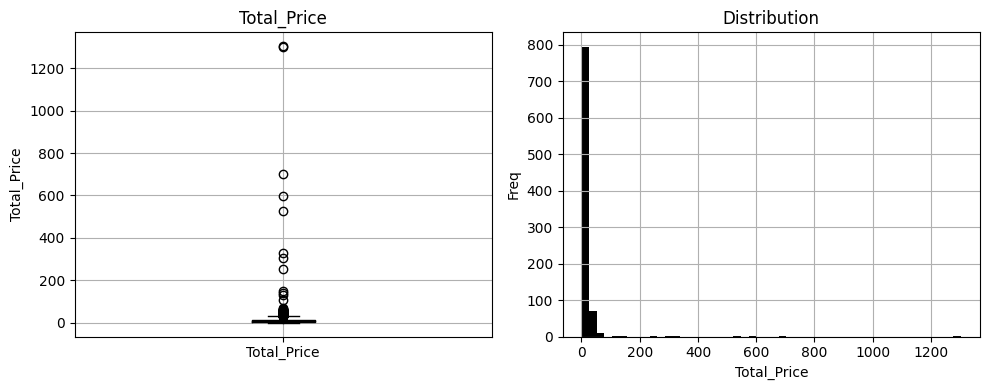

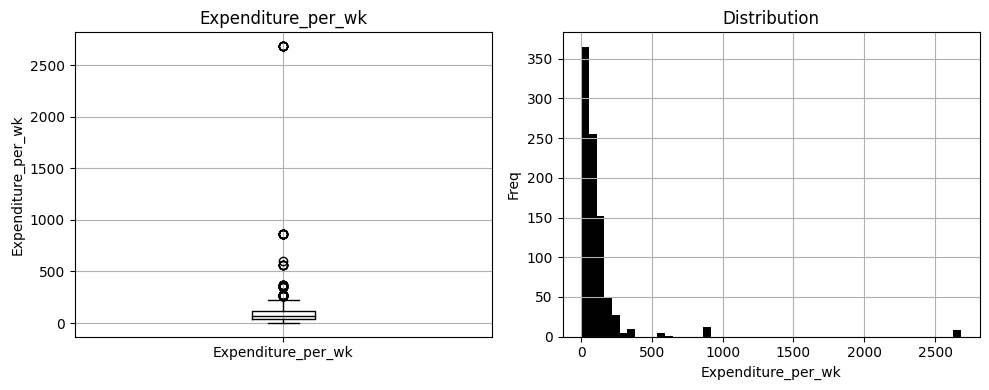

In [12]:
for var in list1:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)
    

    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(bins=50, color='black')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    
    plt.tight_layout()    
    
    plt.show()

<p>
As can be seen,both total price and expenditure_per_wk have outliers and very skewed distribution.
</p>

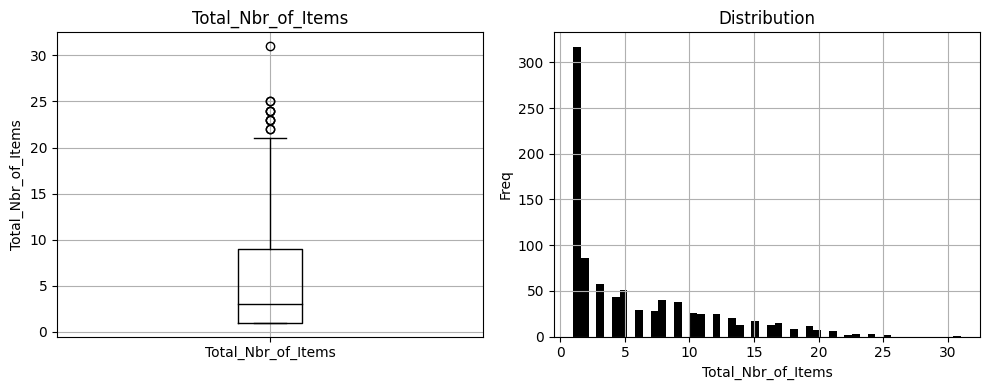

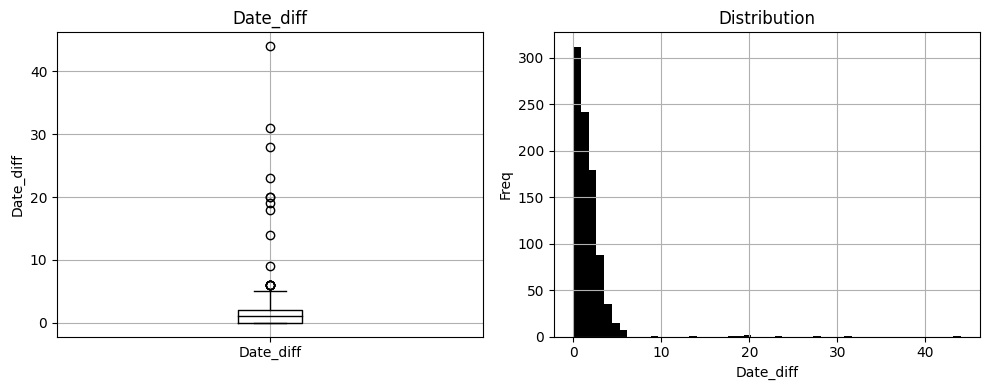

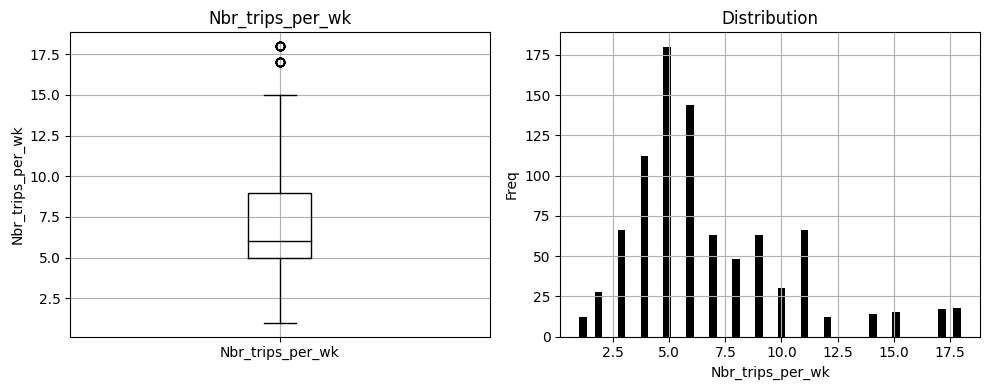

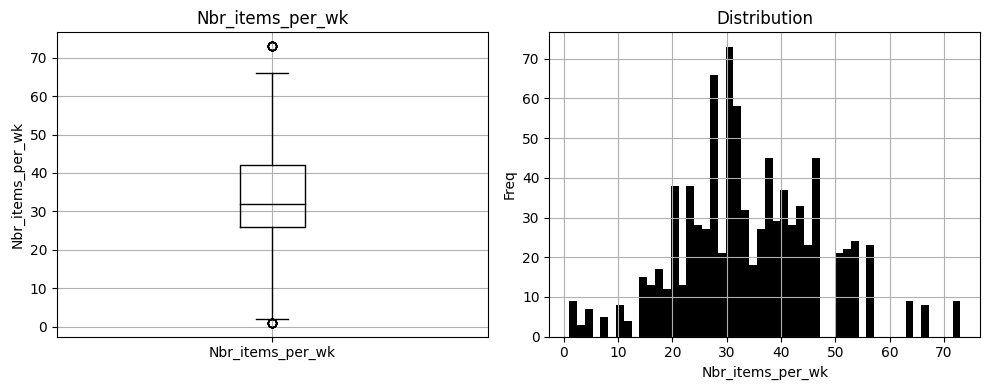

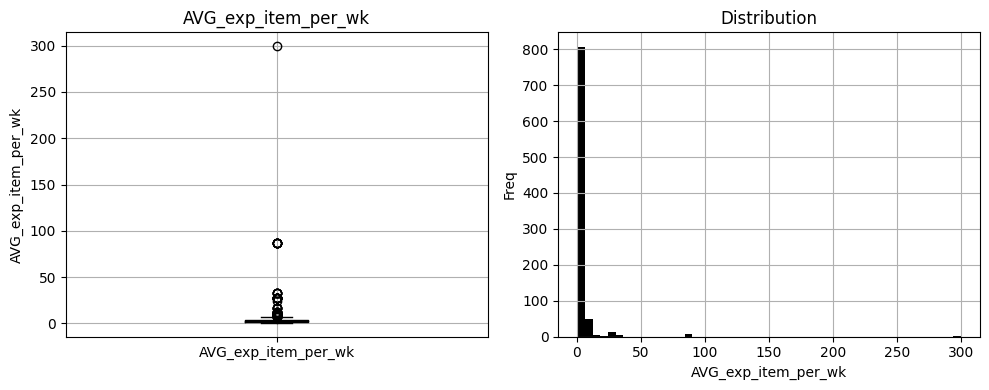

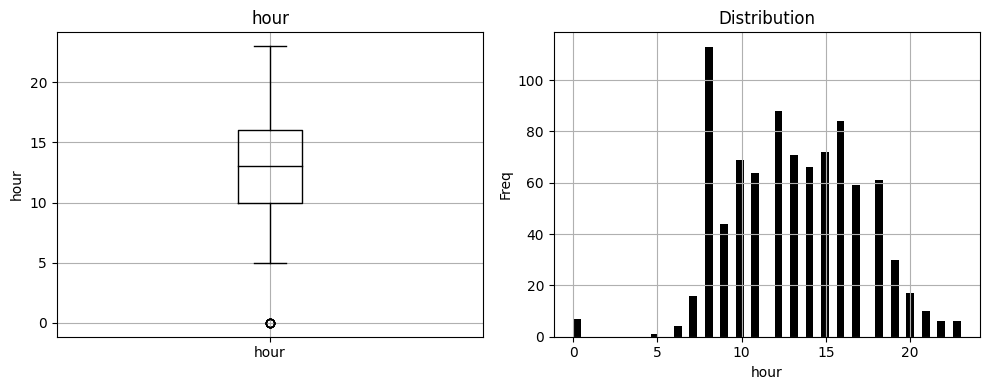

In [13]:
for var in list2:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)

    
    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(bins=50, color='black')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    plt.tight_layout()

    plt.show()

<p>The majority of the features on this list have skewed distributions with a good dispersion of values</p>

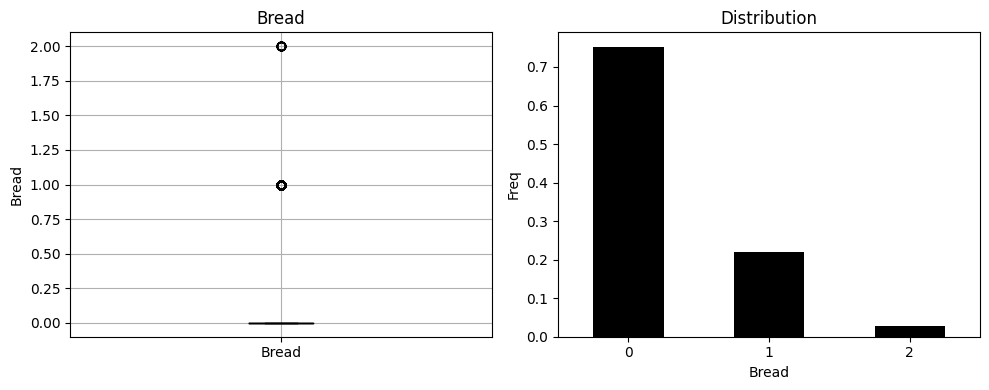

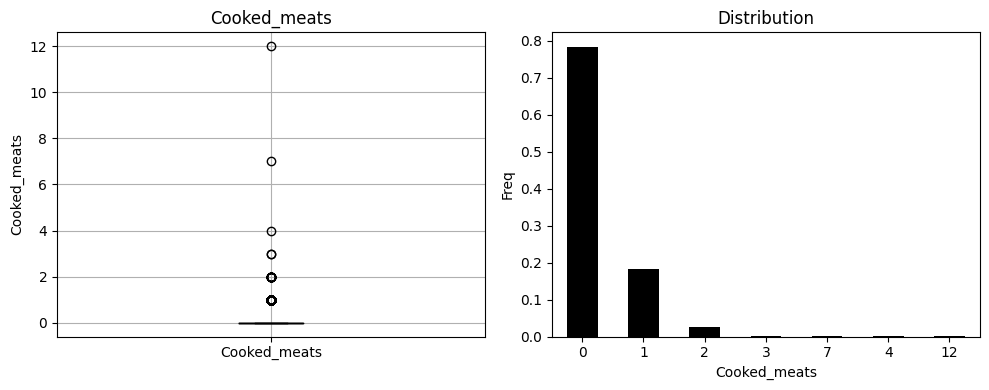

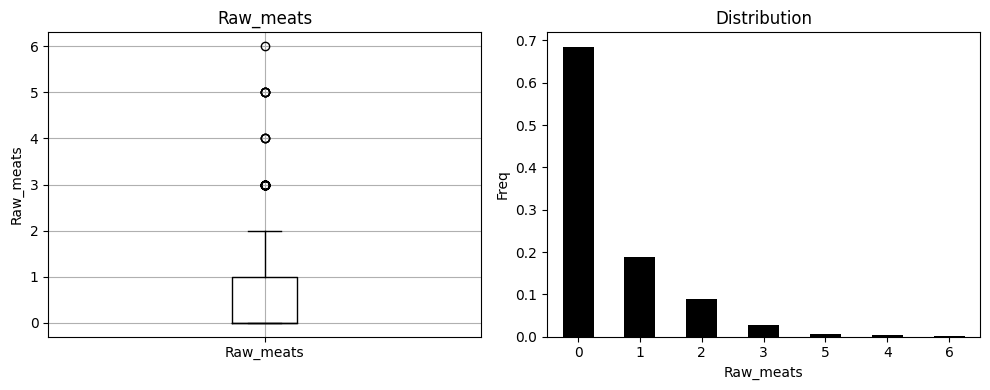

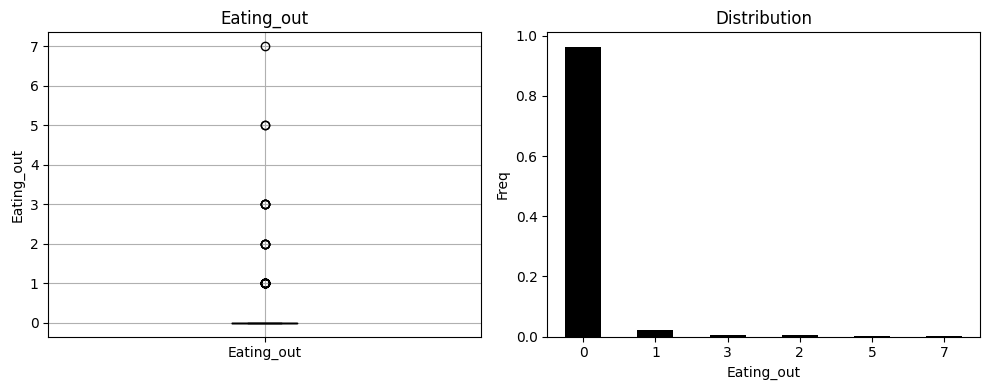

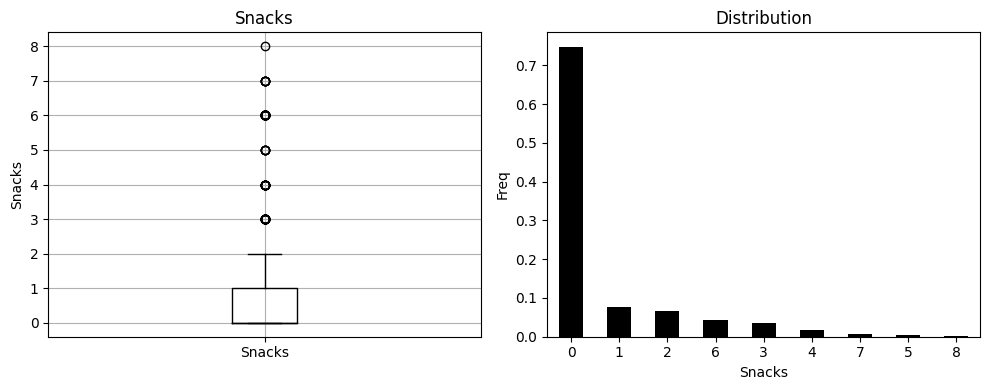

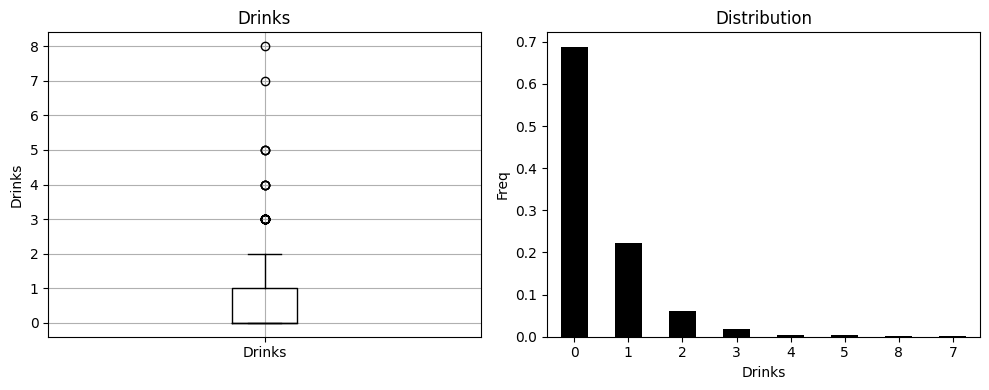

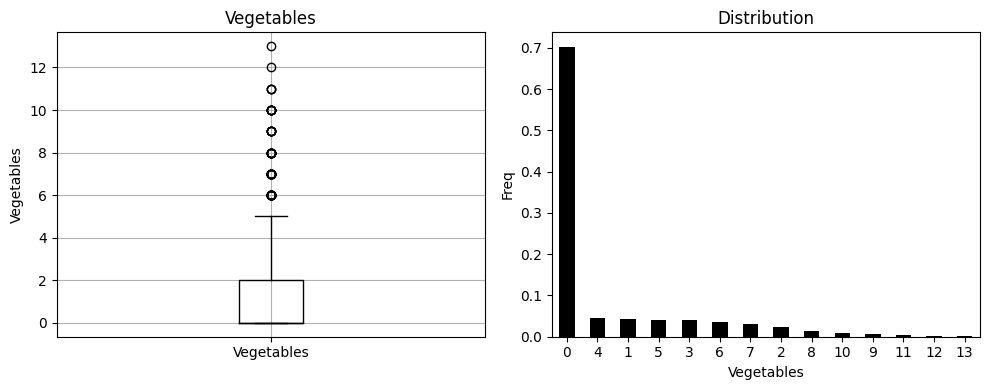

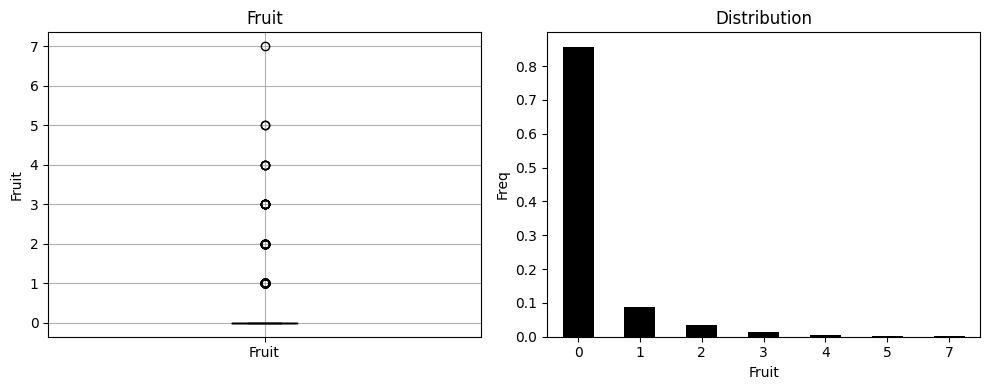

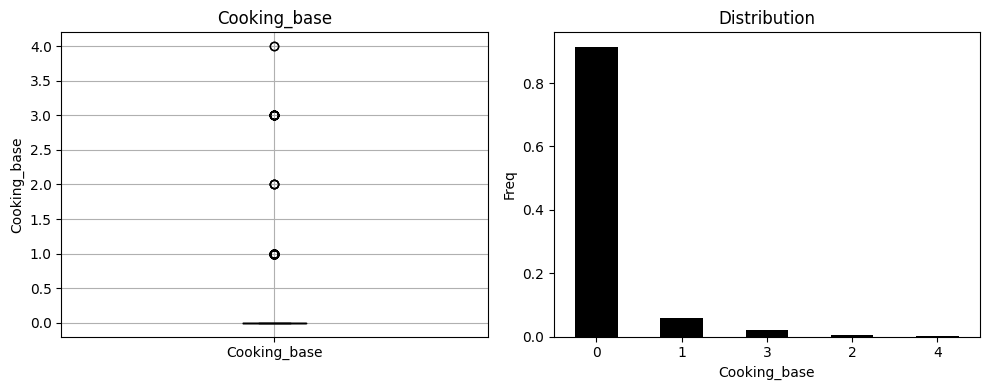

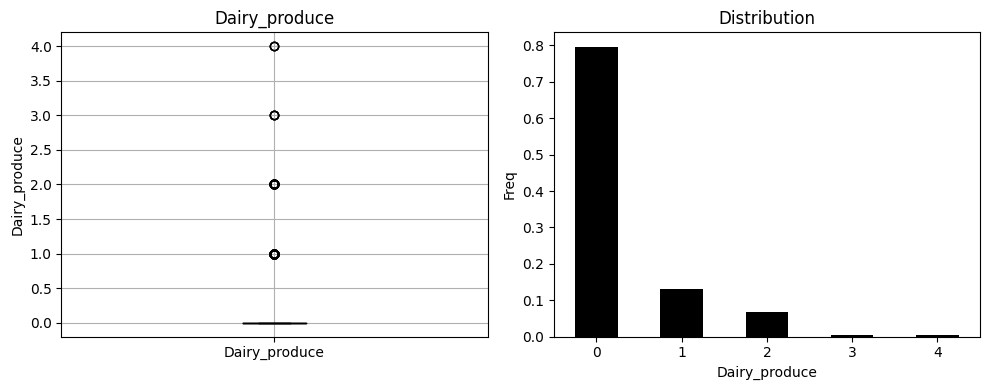

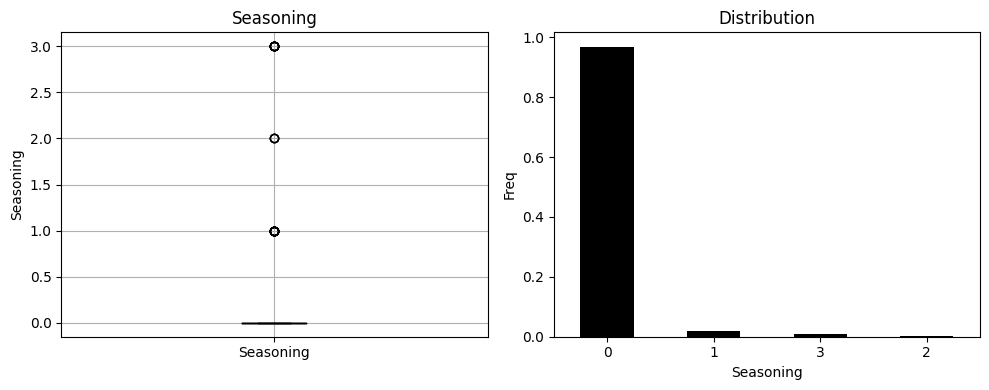

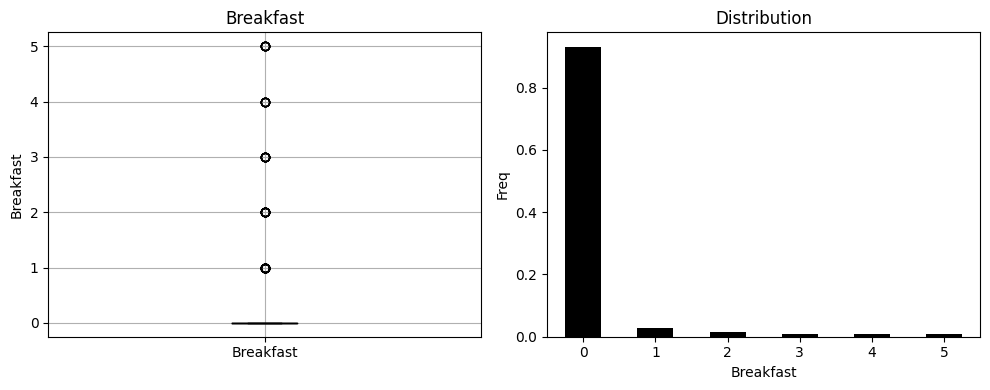

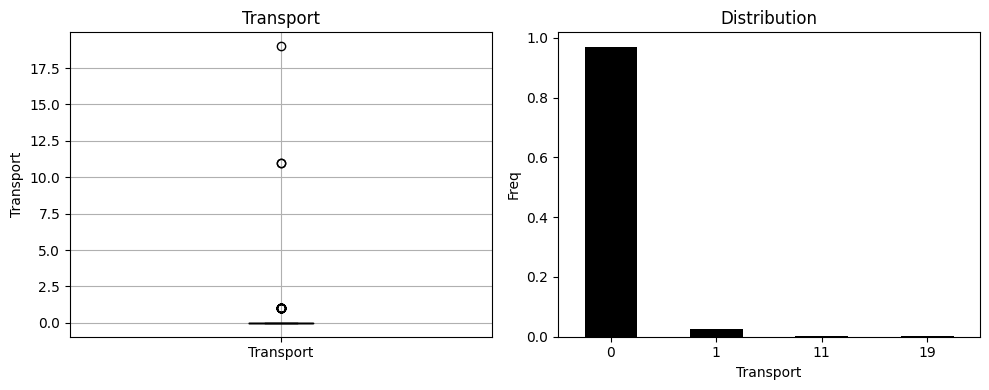

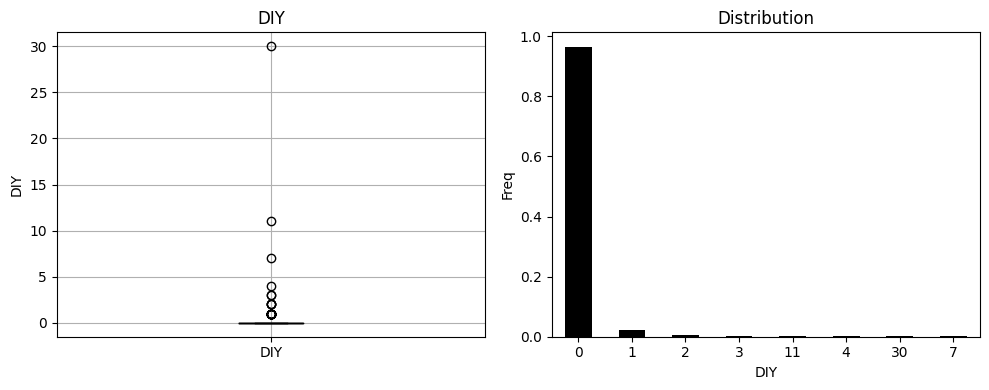

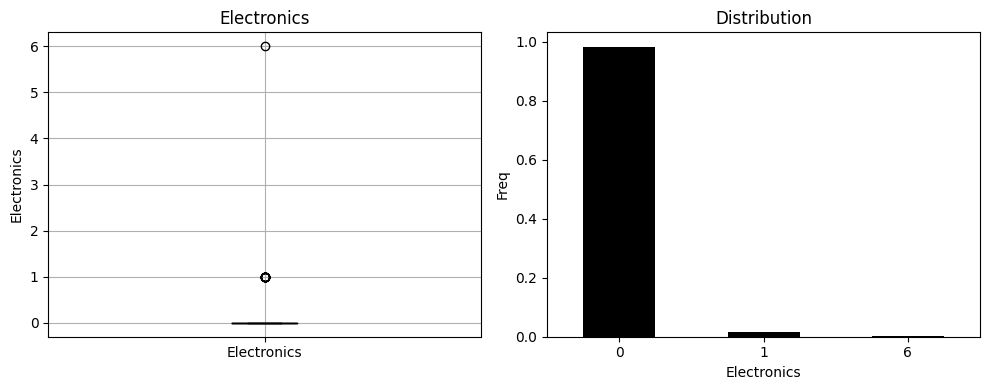

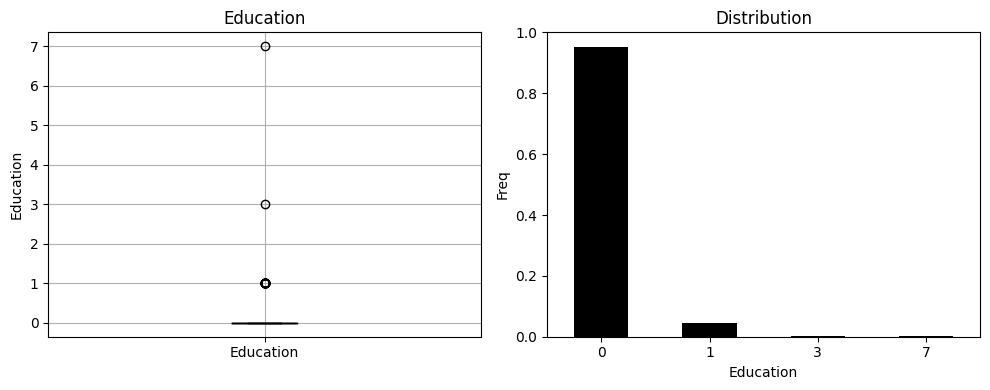

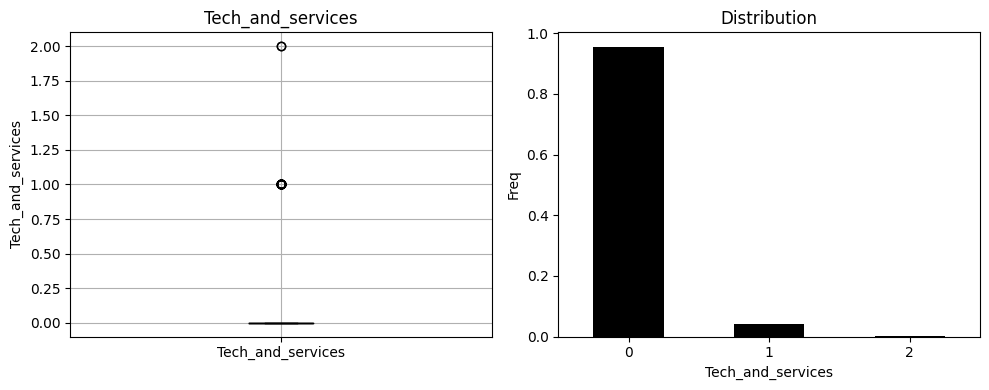

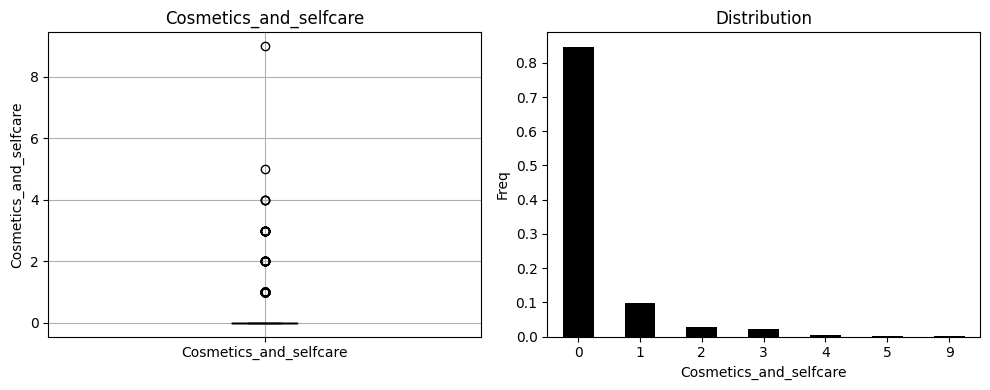

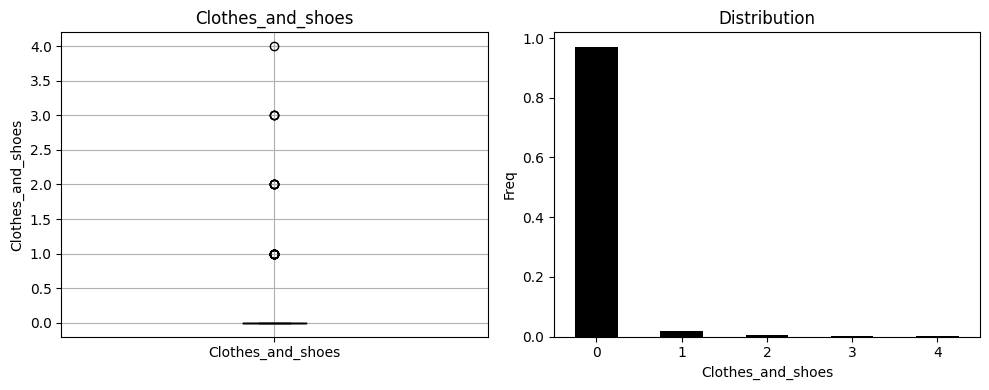

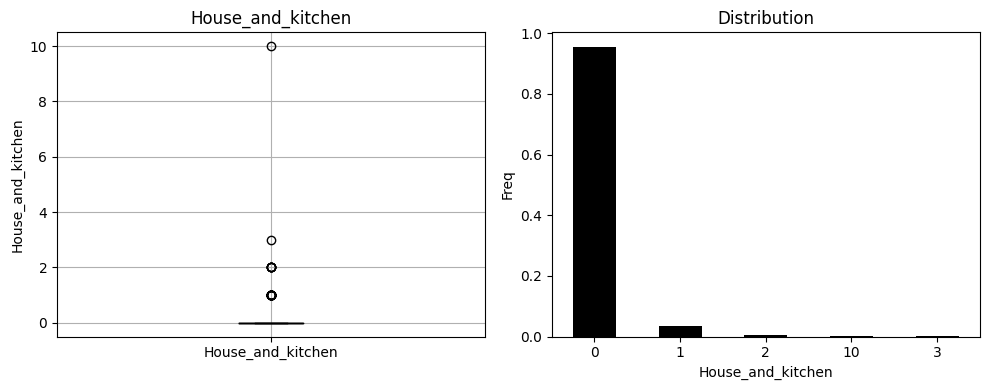

In [14]:
for var in list3:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].value_counts(normalize=True).plot(color='black', kind='bar', title=f'{var}')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    plt.xticks(rotation=0)
    plt.tight_layout()
    
    plt.show()
    

<p>
The features on this list have a skewed distribution with one predominant category, 0, representing over 70% of observations, in the majority of cases.
</p>

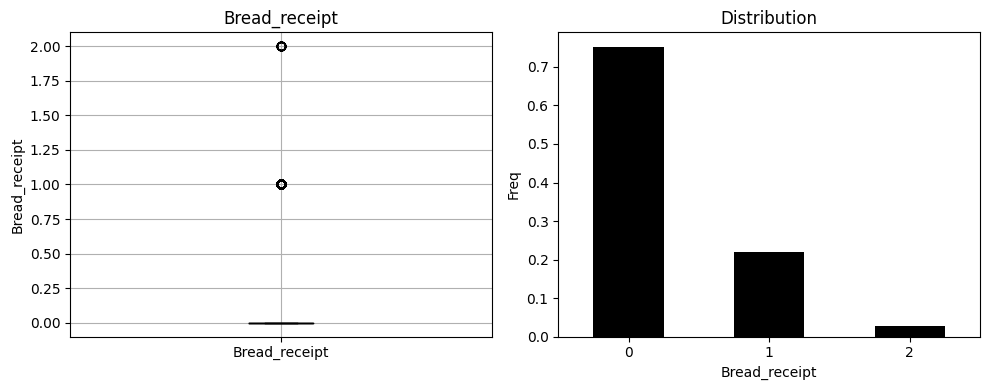

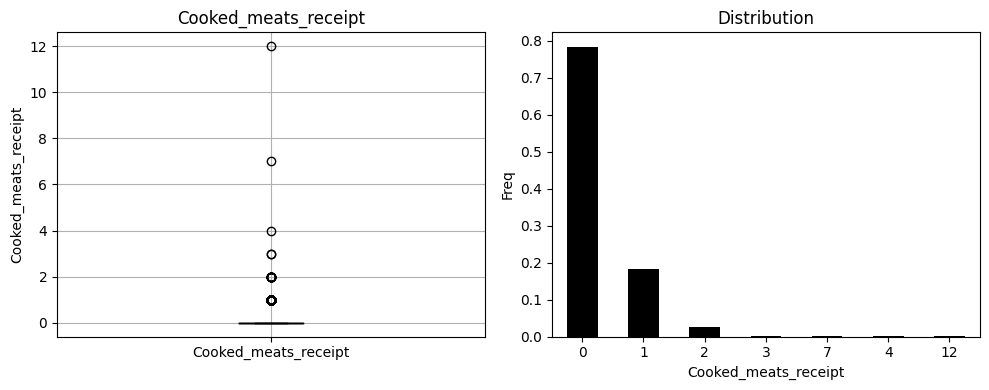

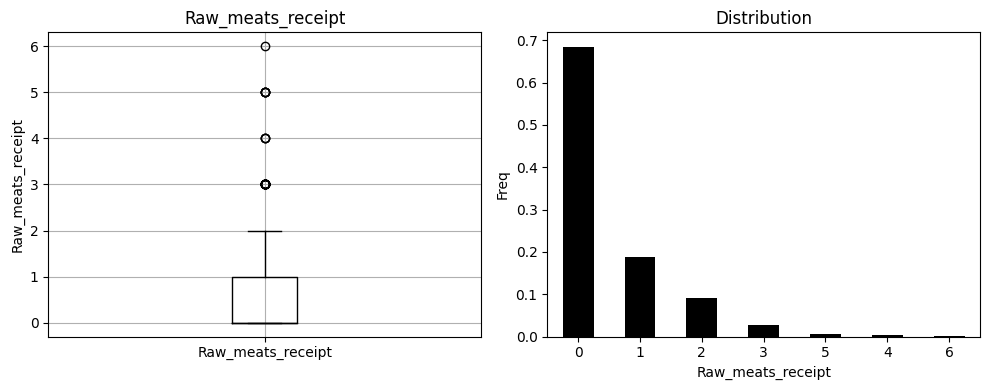

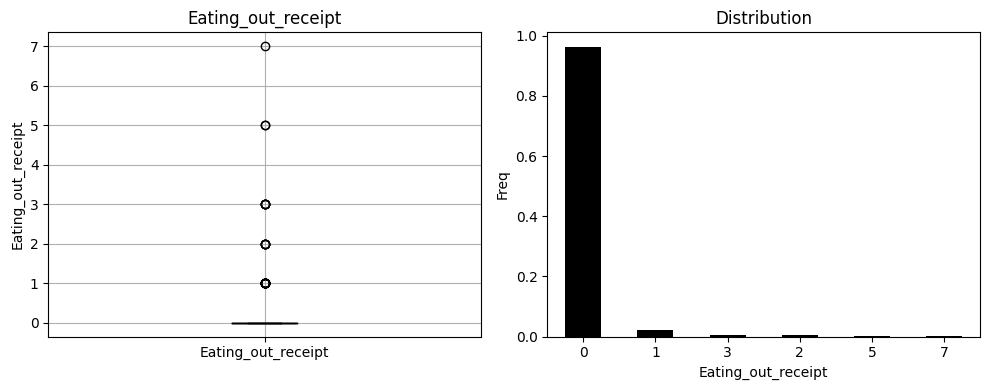

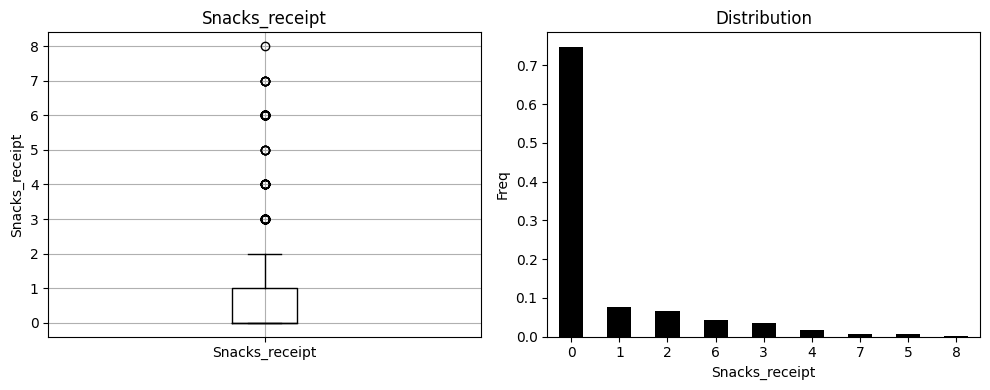

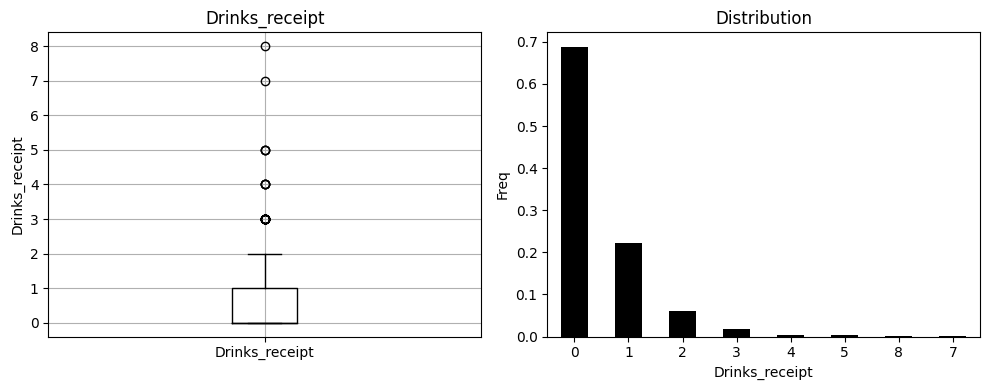

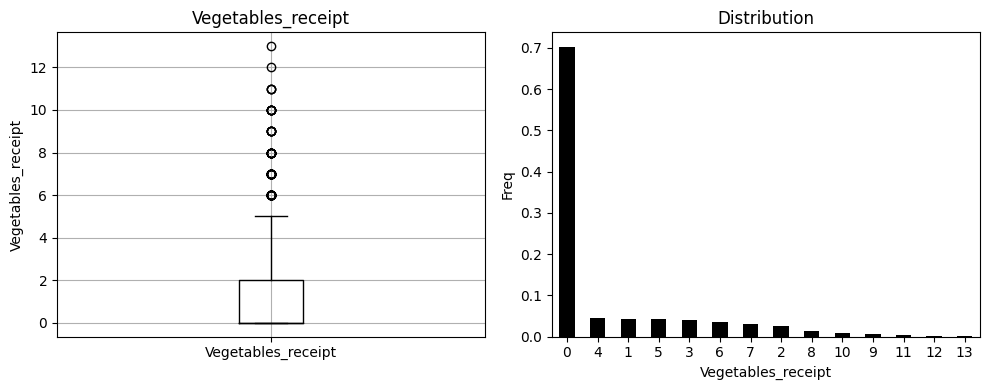

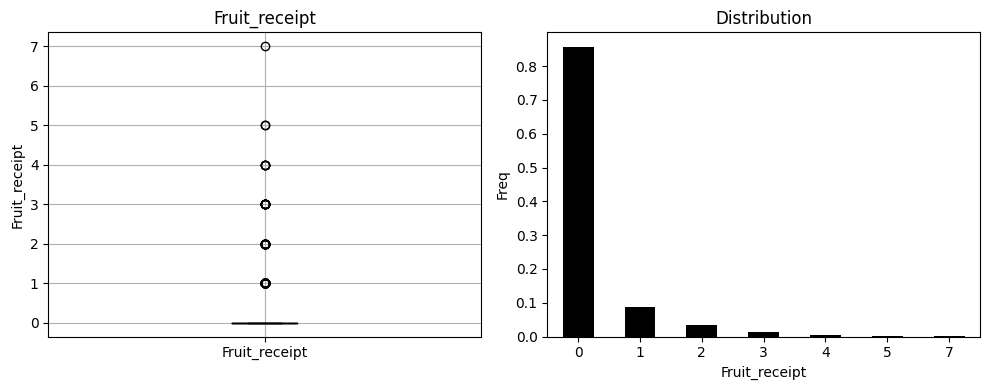

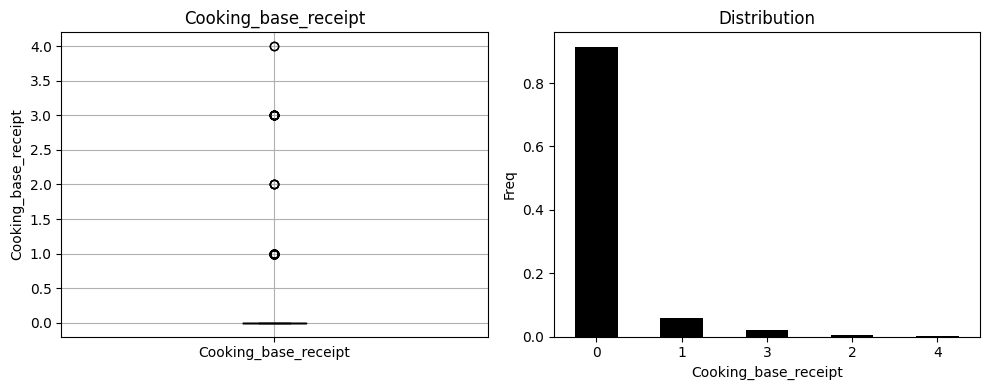

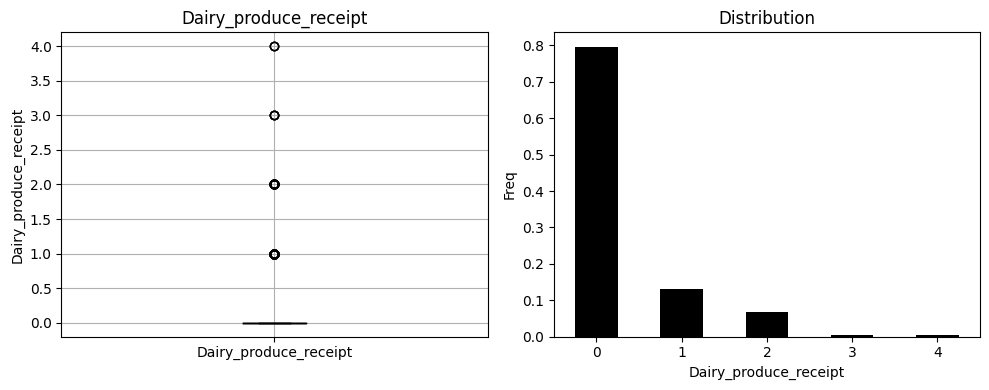

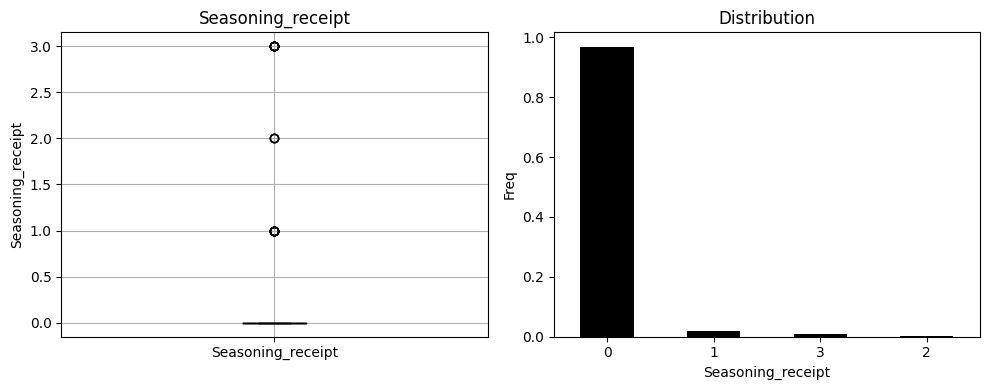

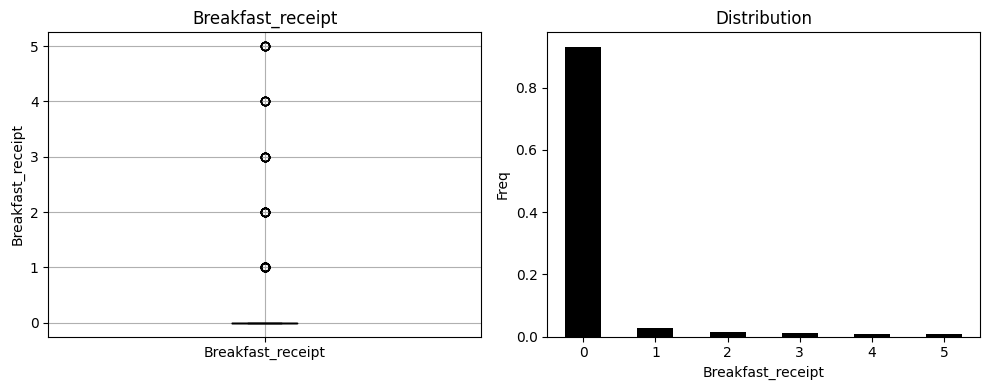

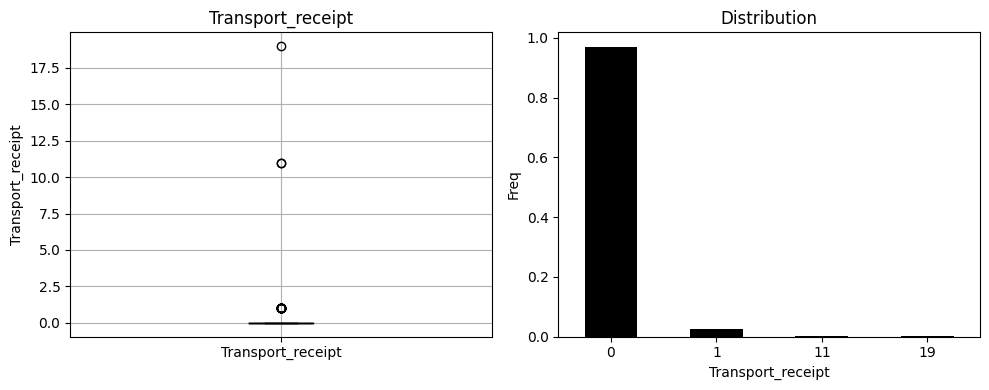

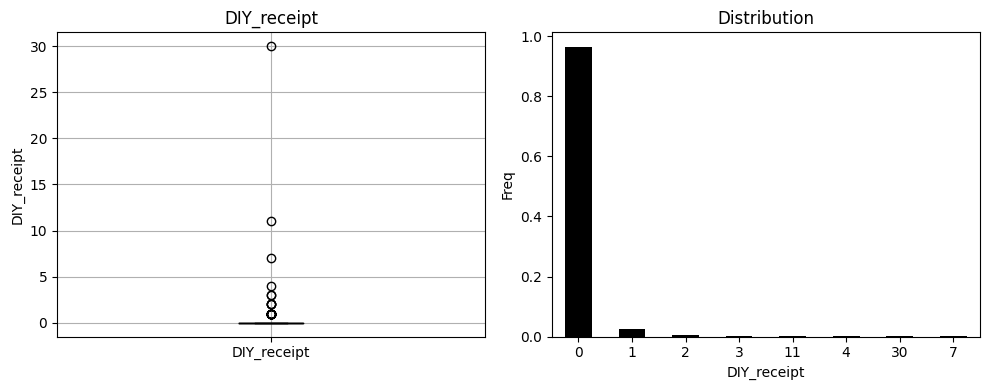

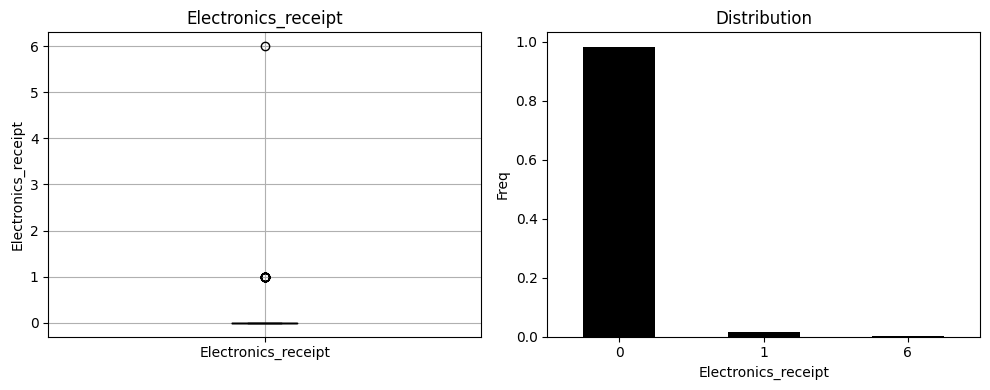

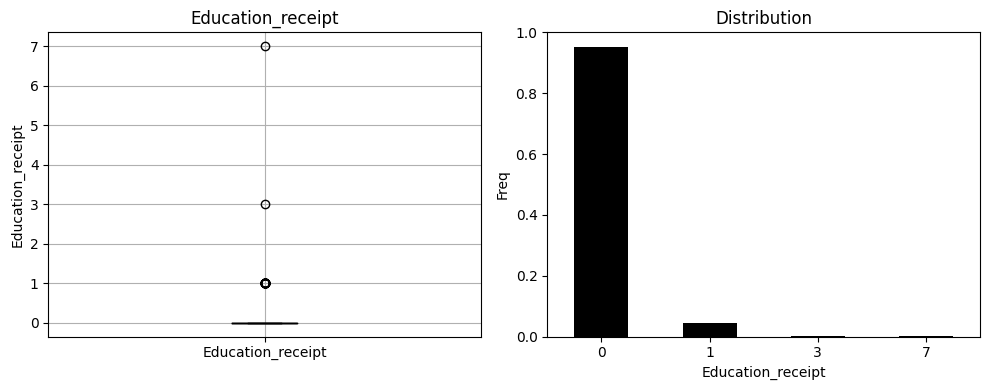

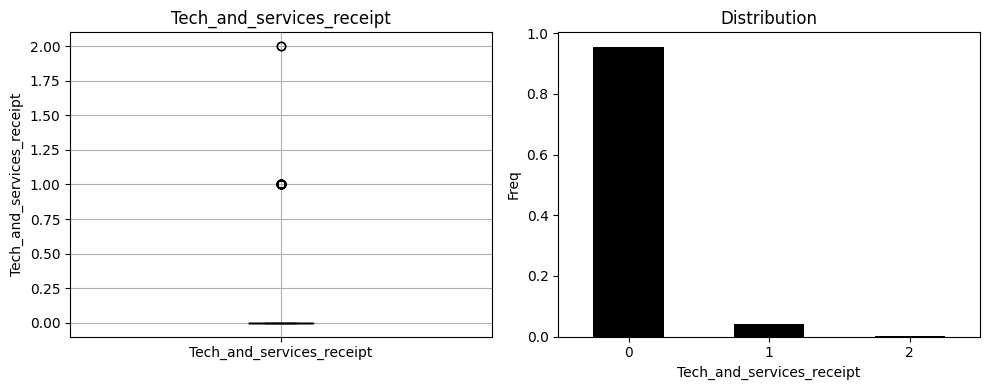

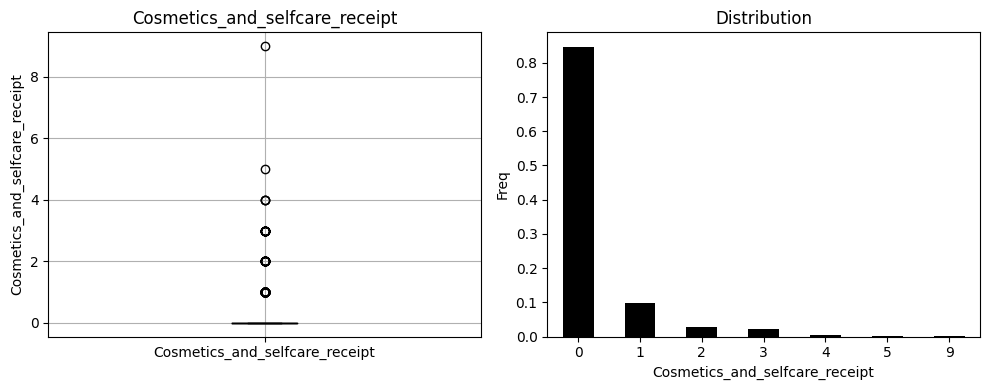

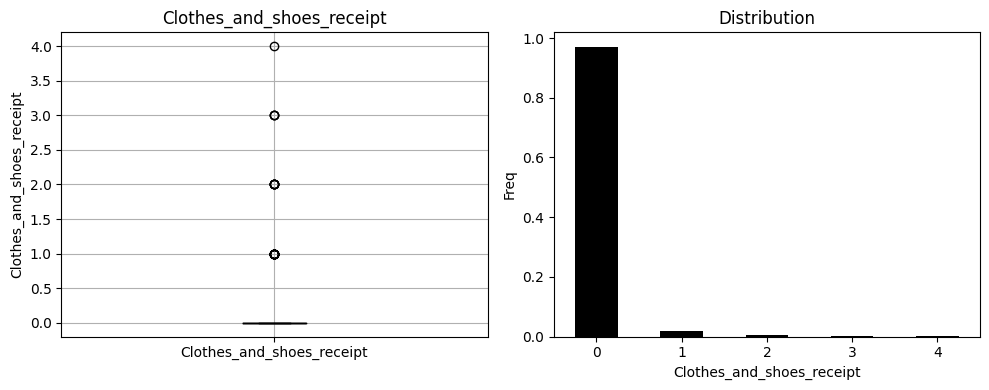

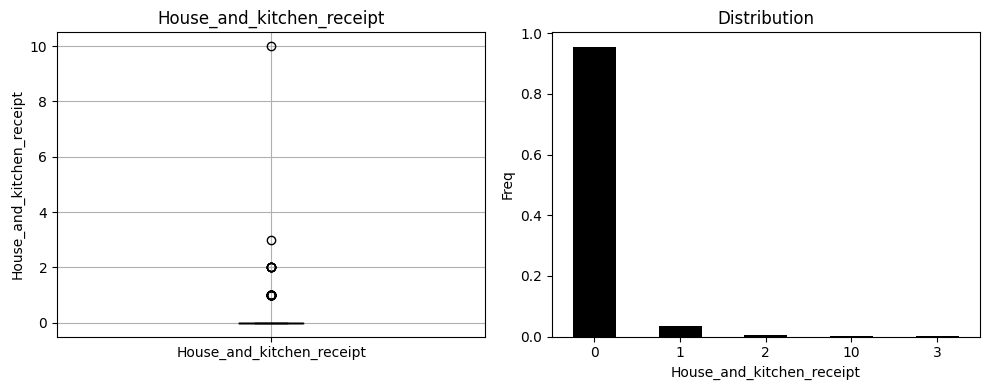

In [15]:
for var in list4:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)
   
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].value_counts(normalize=True).plot(kind='bar',color='black')
    fig.set_ylabel('Freq')
    fig.set_xlabel(var)
    fig.set_title('Distribution')
    plt.xticks(rotation=0)
    plt.tight_layout()

    plt.show()

<p>
The features in this list have a dominant category, 0, representing above 70% of the observations and the remaining infrequent categories share the rest.
</p>

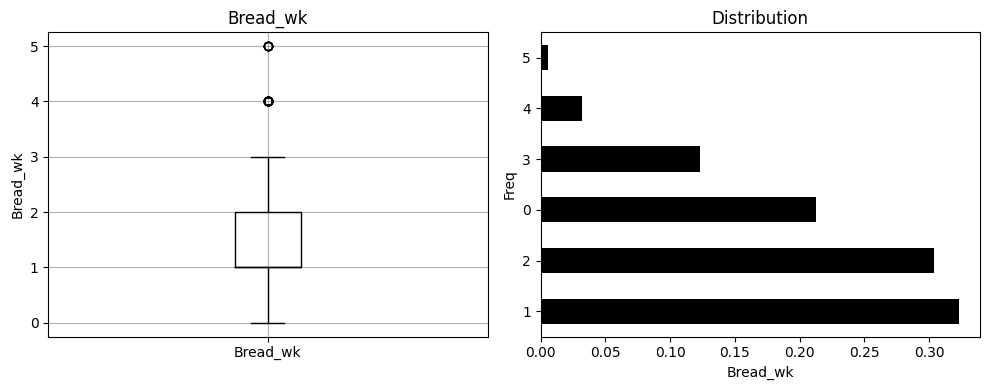

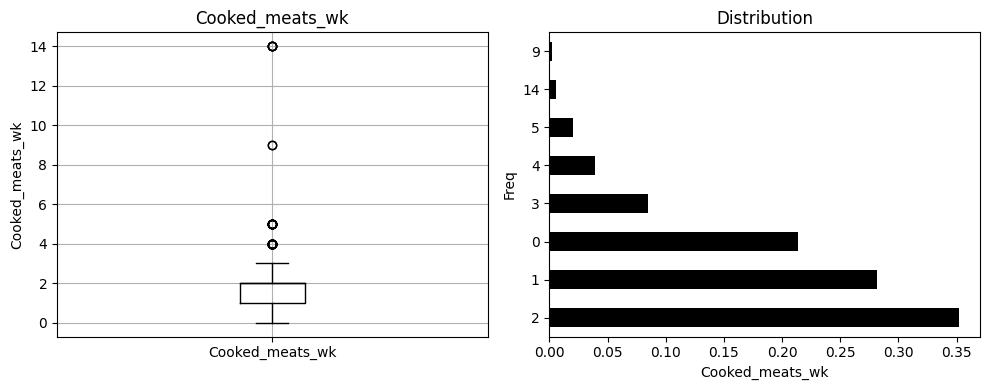

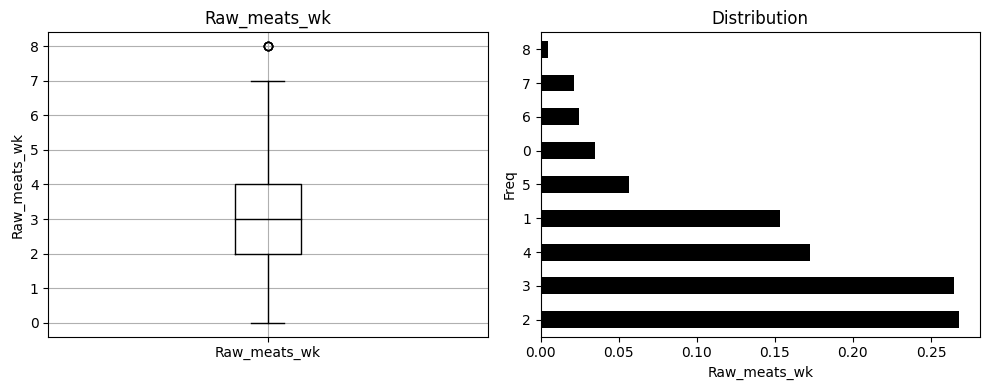

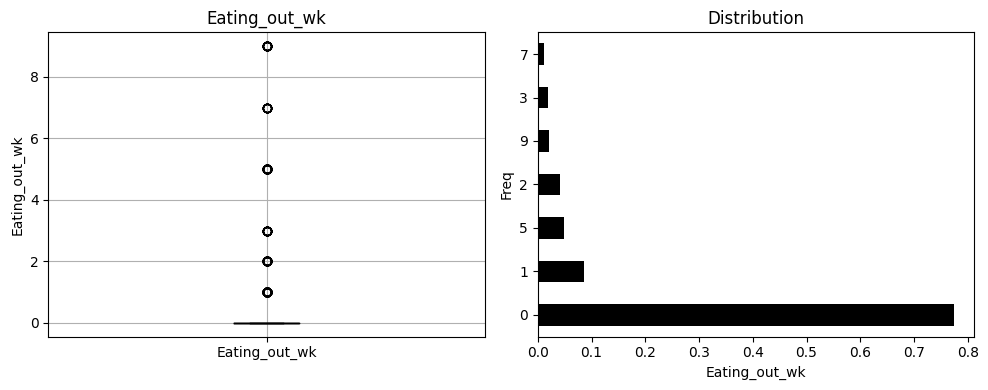

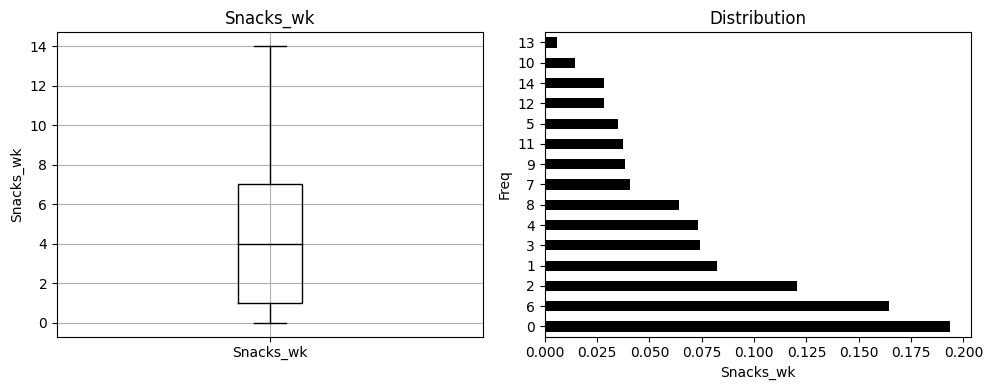

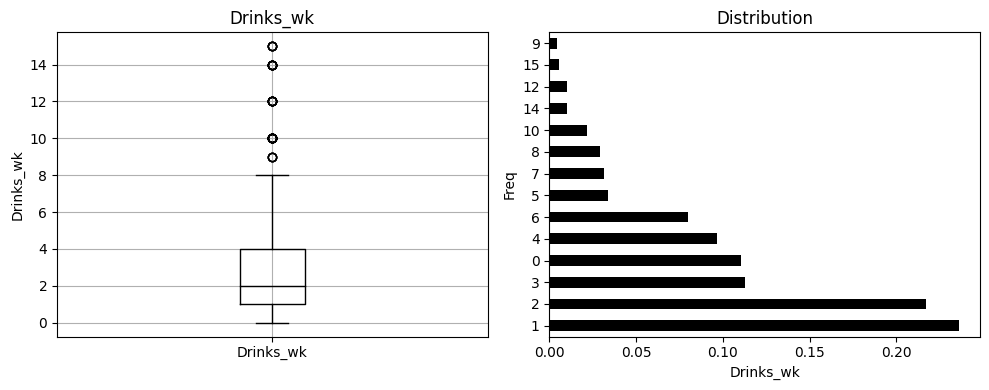

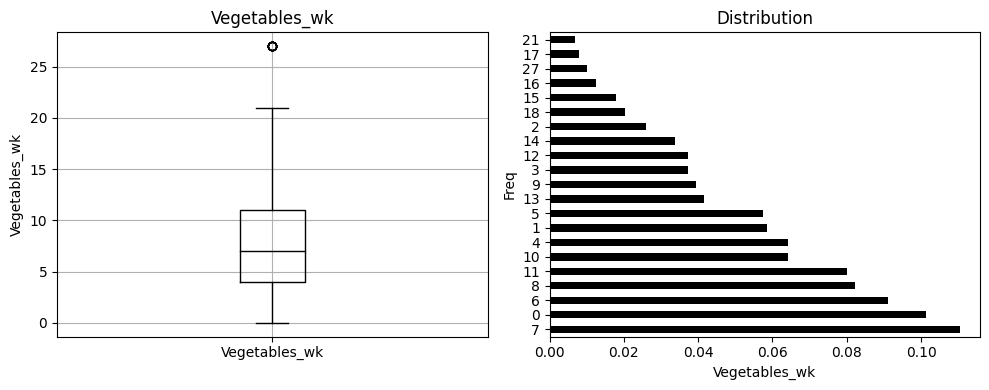

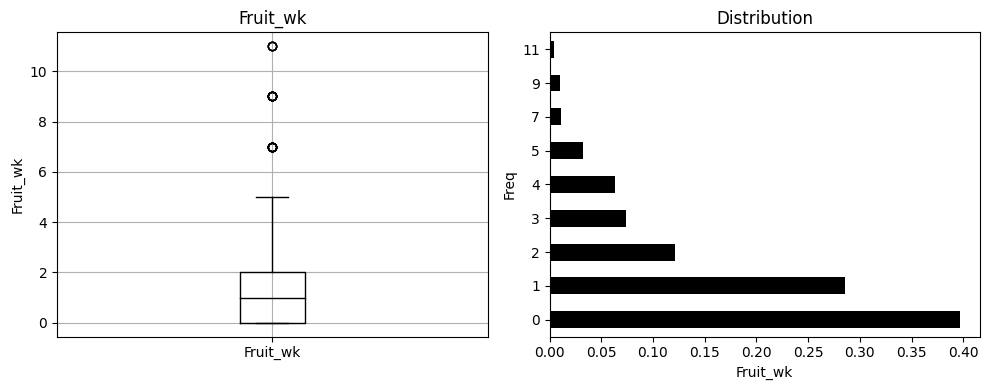

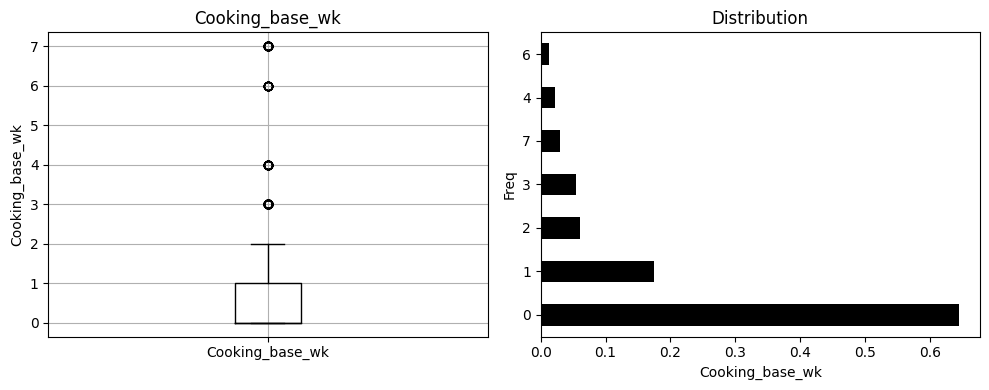

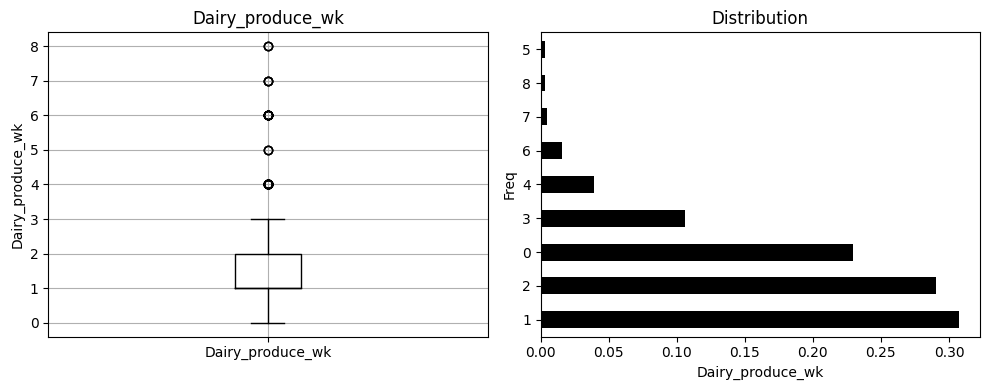

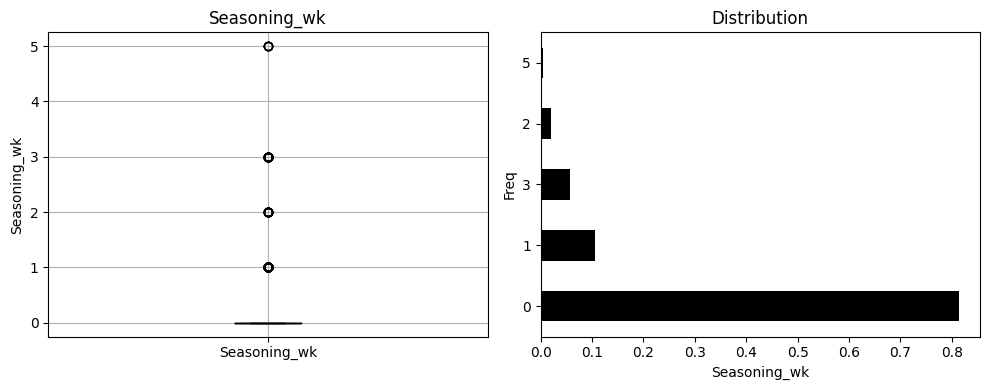

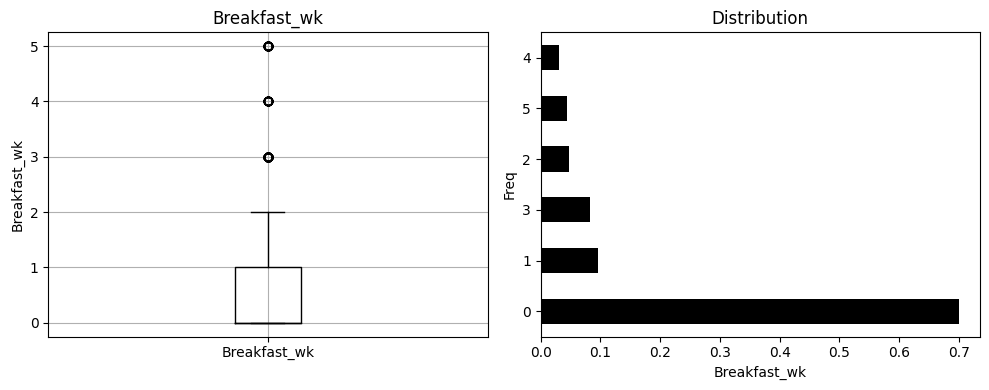

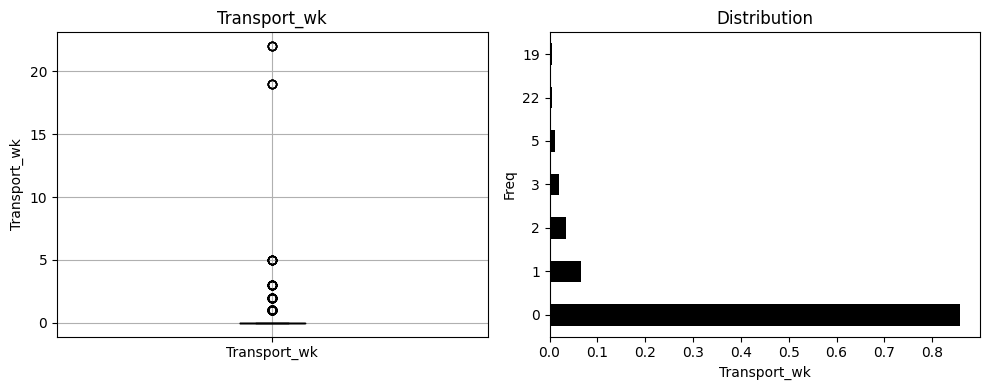

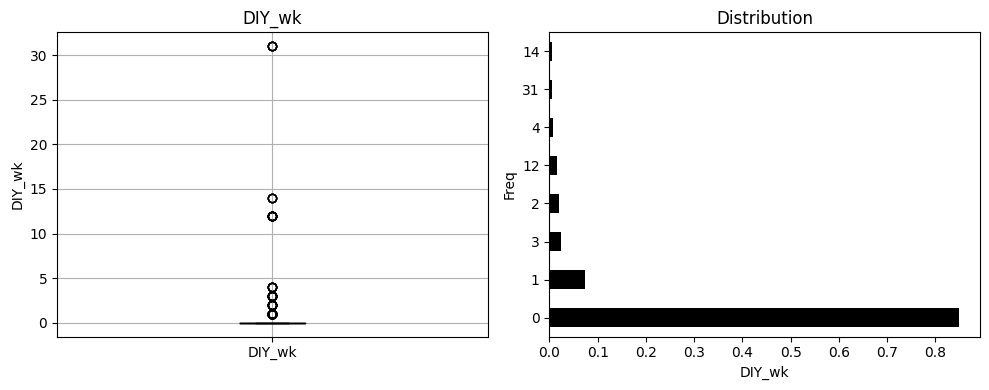

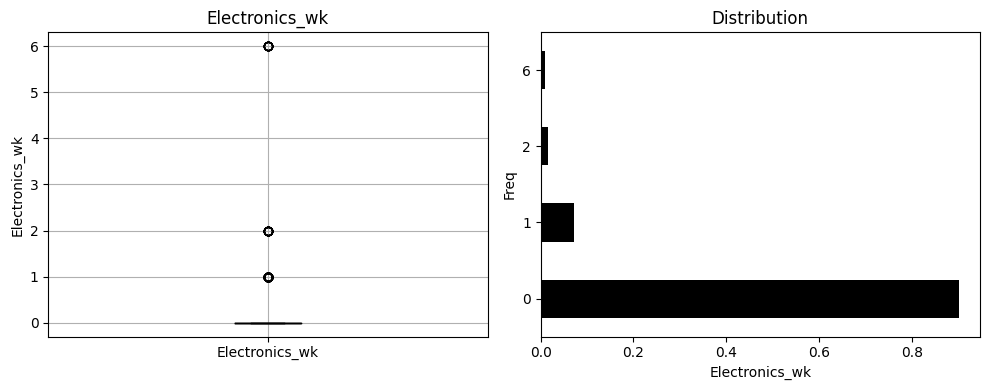

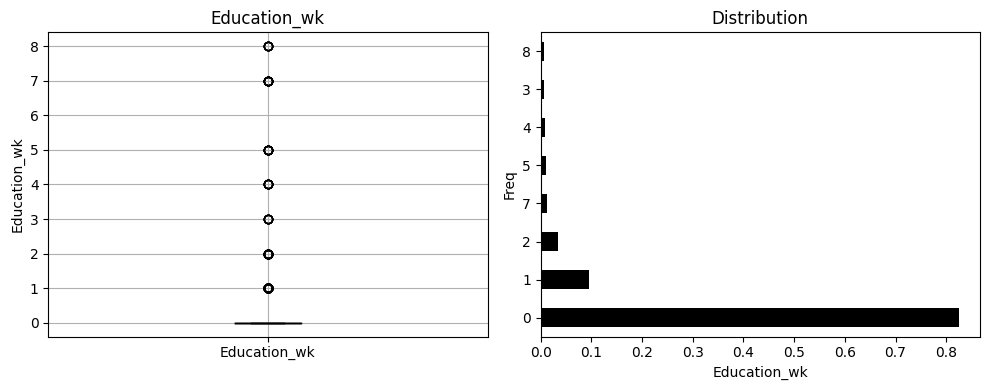

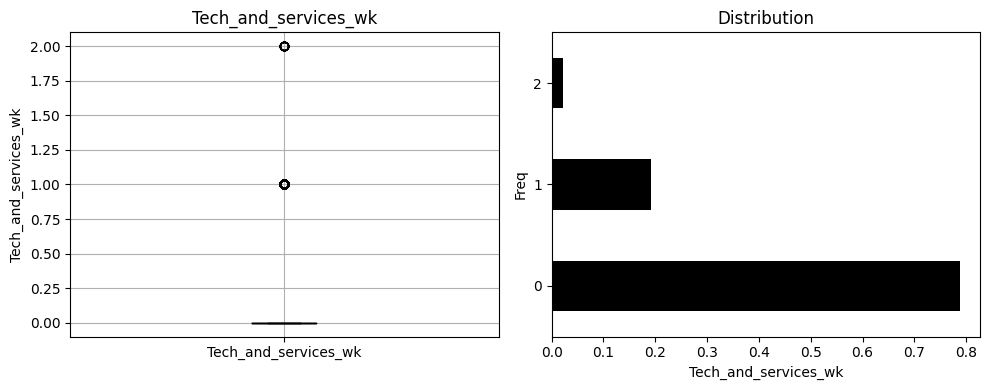

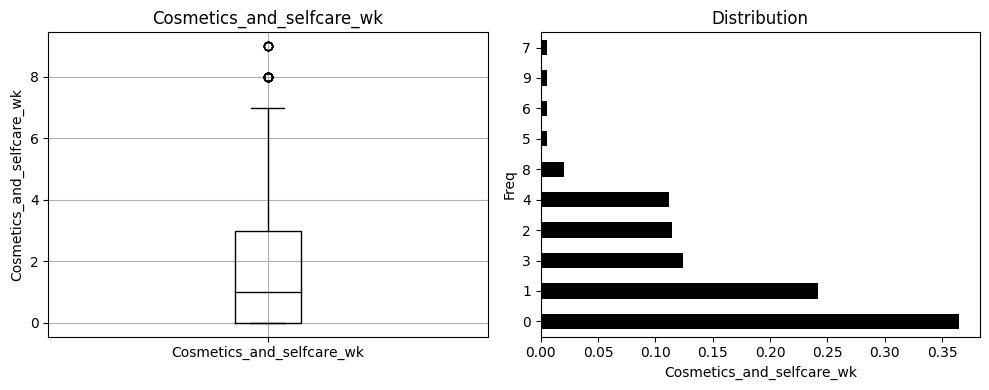

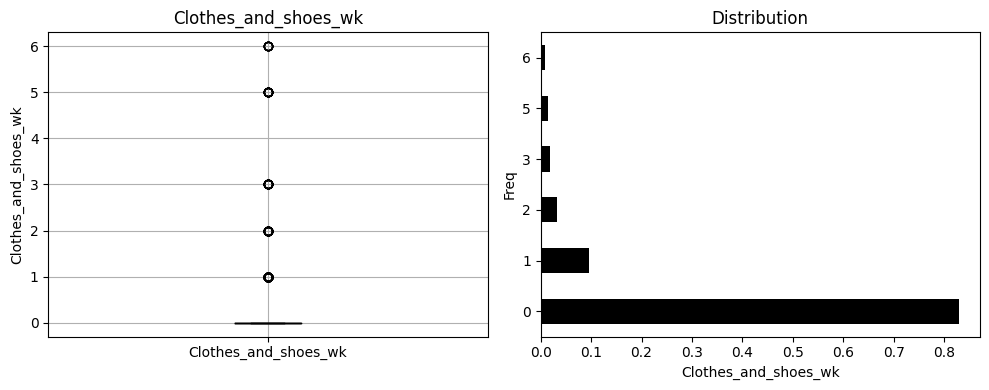

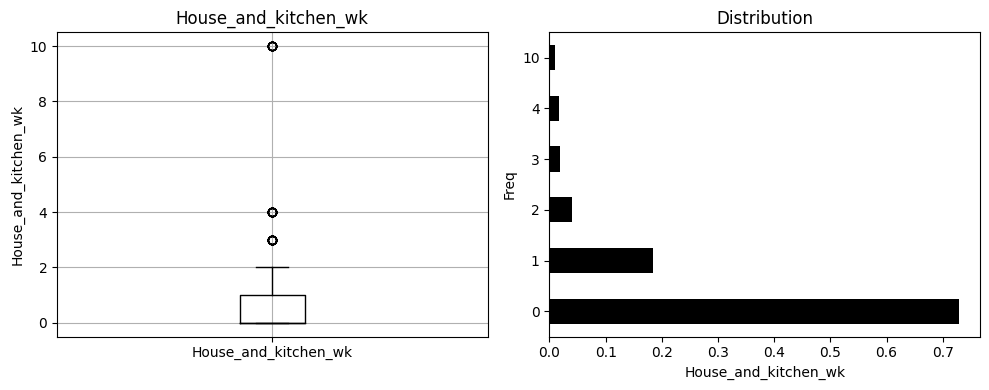

In [16]:
for var in list5:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)
   
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].value_counts(normalize=True).plot(kind='barh',color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)

    plt.tight_layout()

    plt.show()

<p>
The features in this list have a skewed distribution with the majority having a dominant category representing less than 70% of the observations and some exhibiting a clear dominant category with more than 70% of the observations
</p>

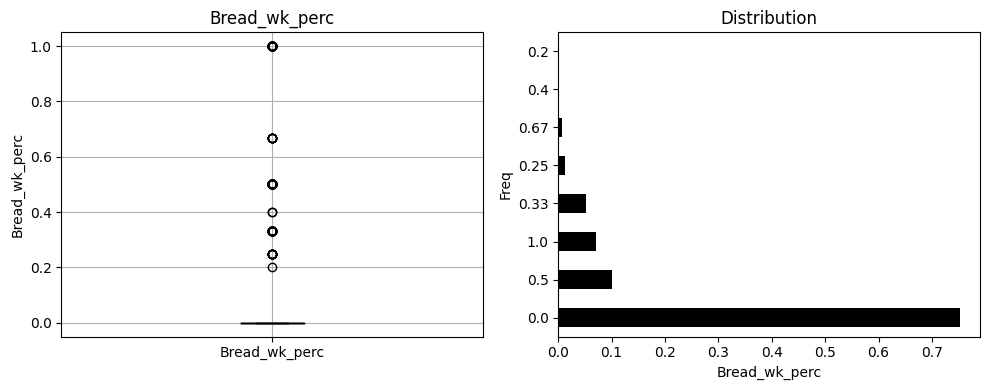

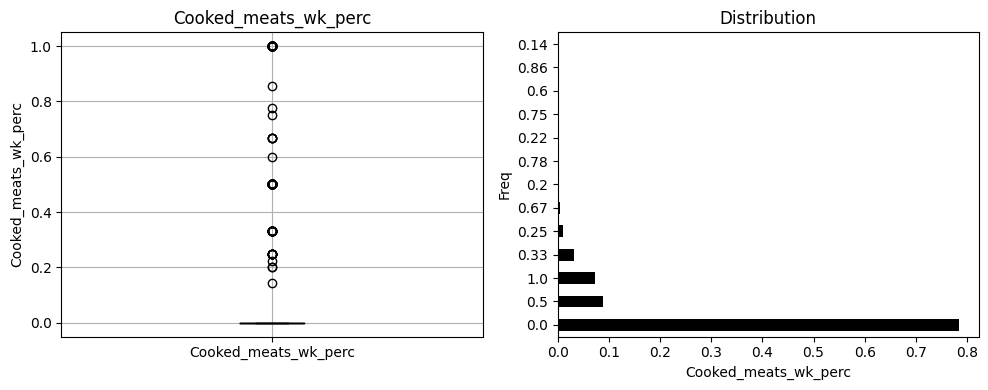

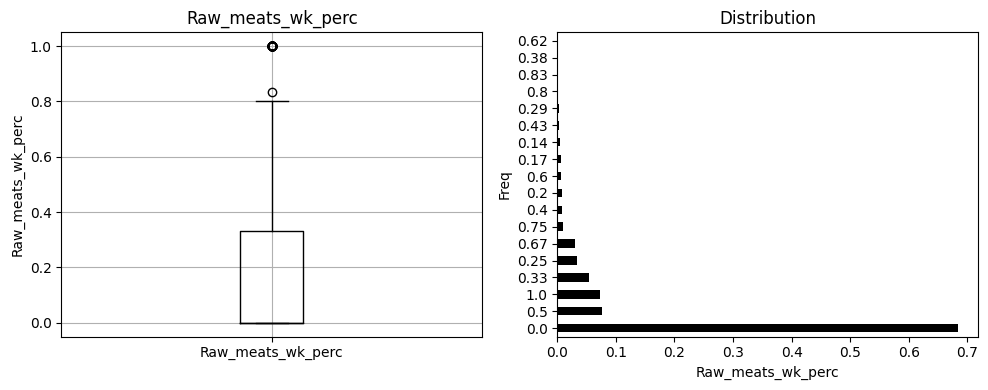

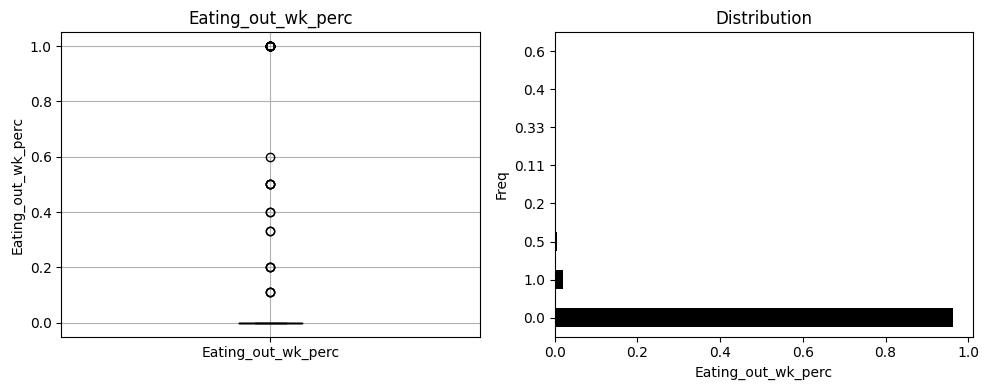

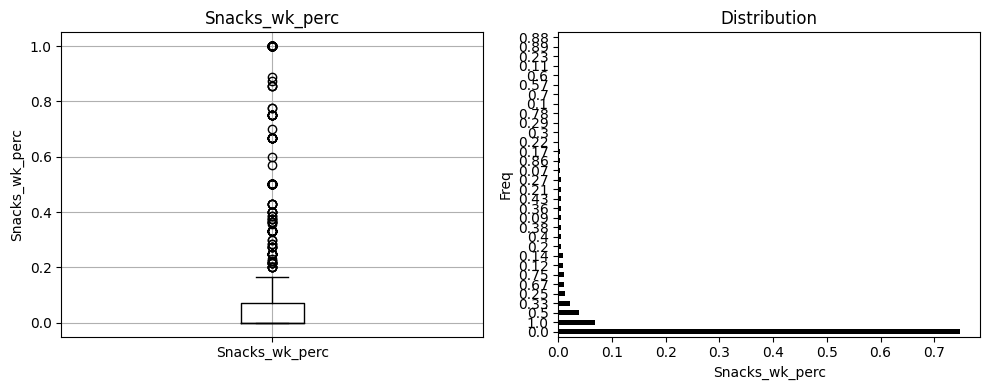

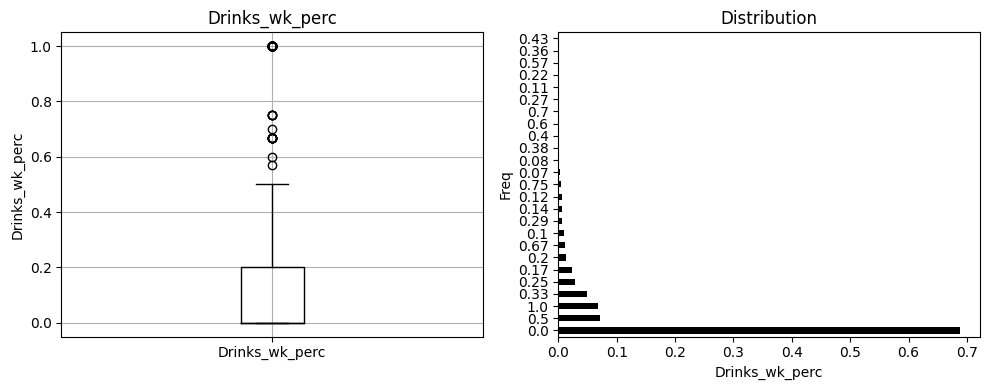

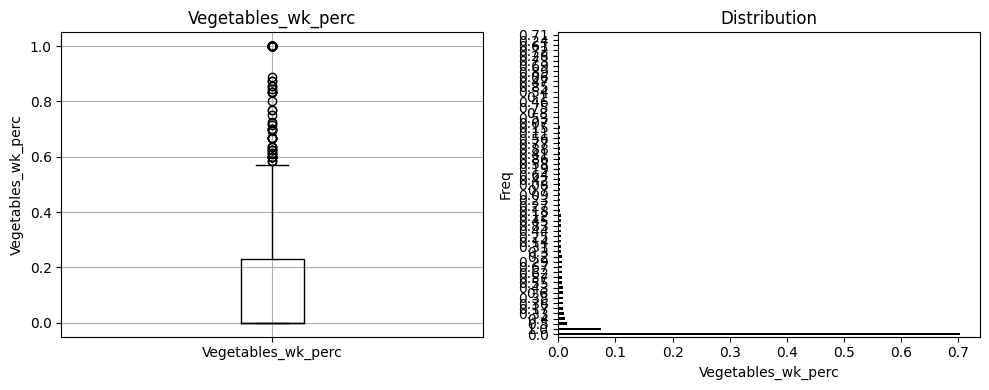

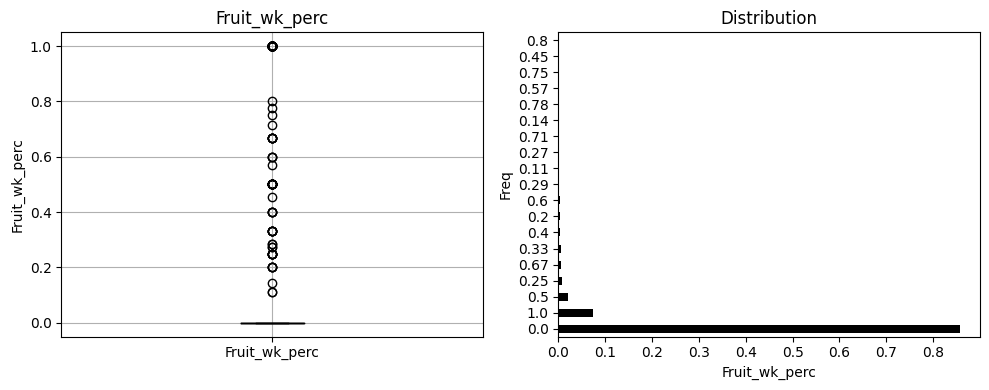

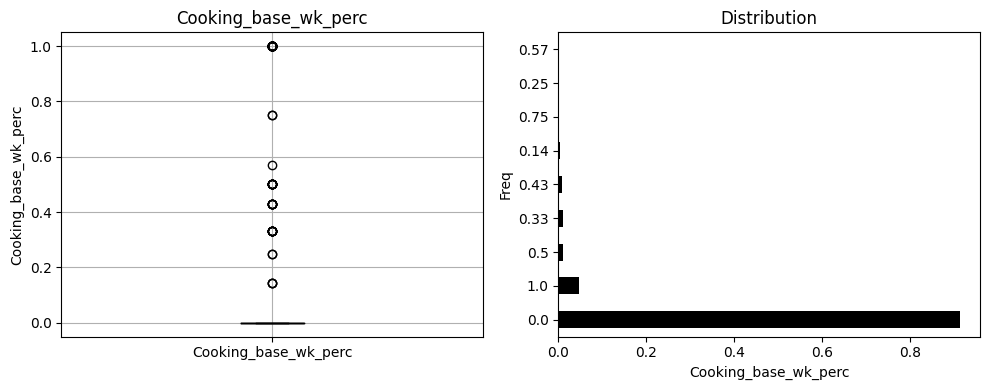

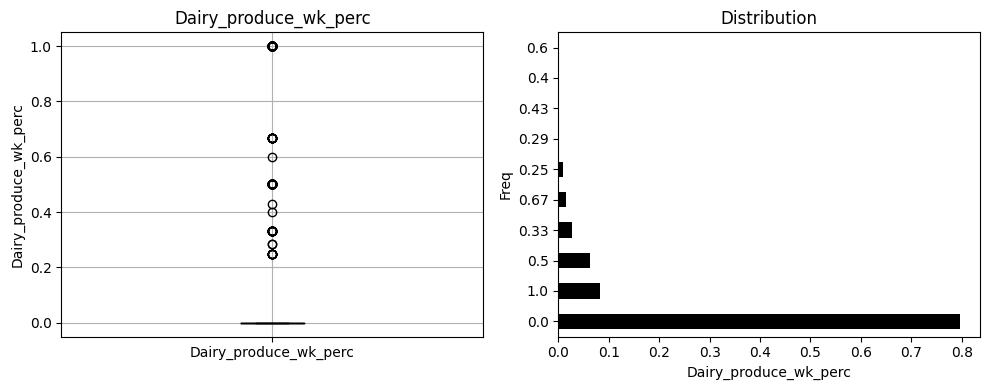

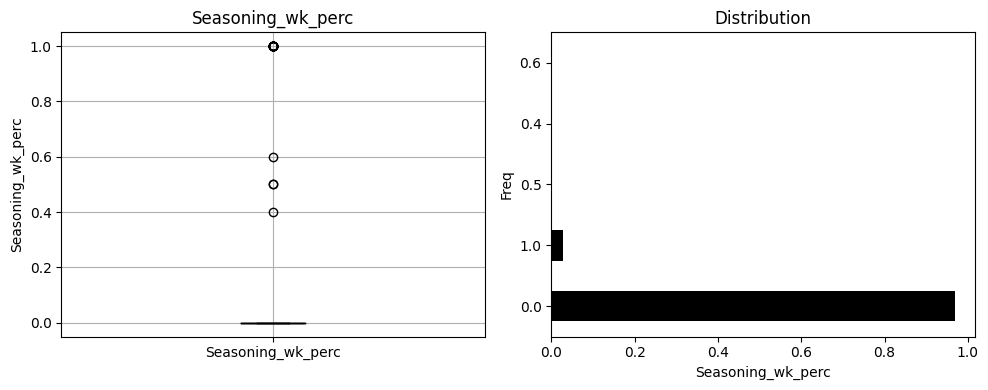

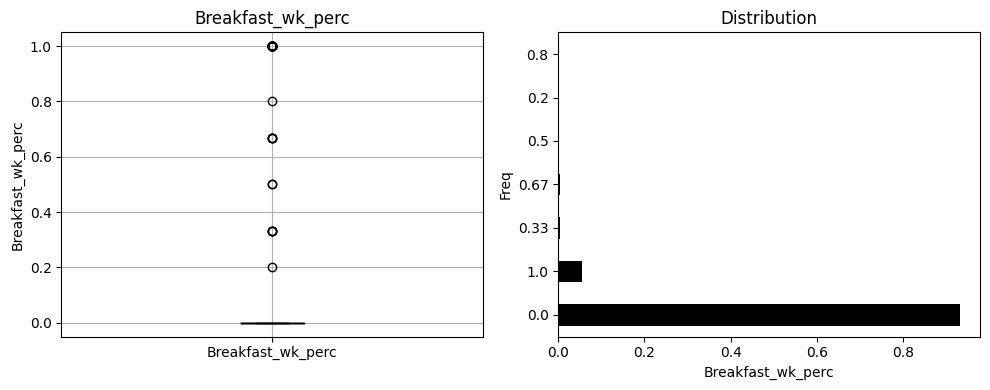

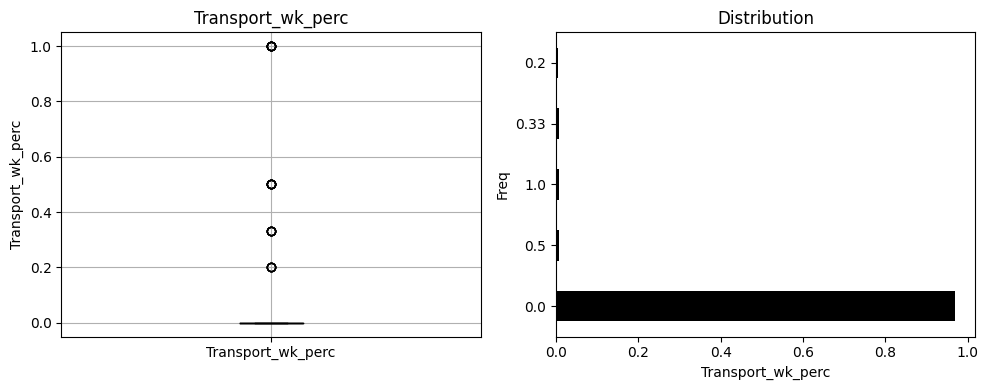

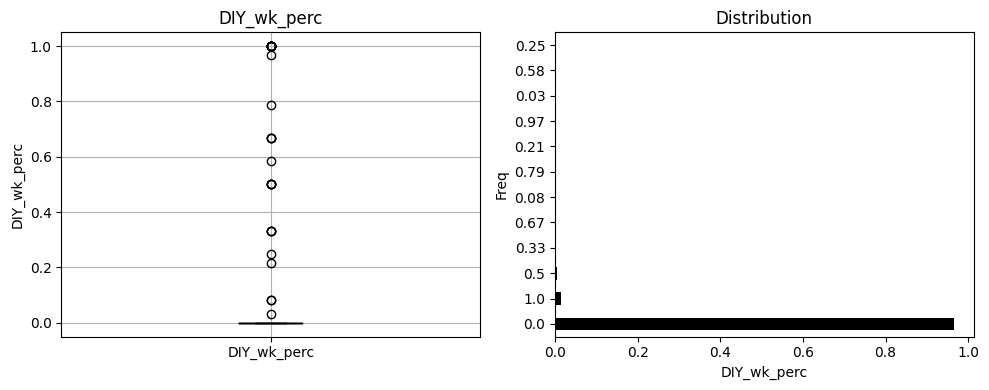

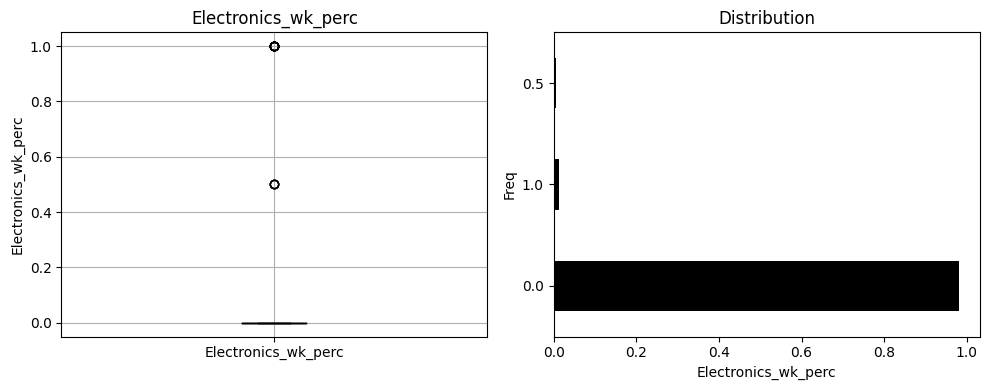

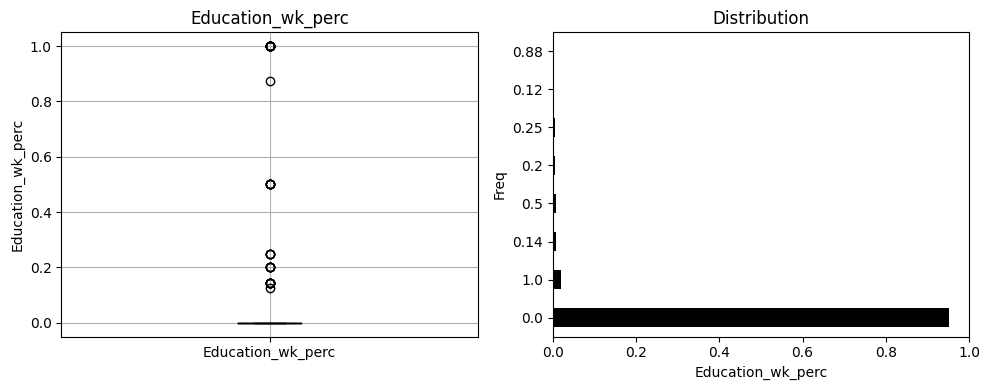

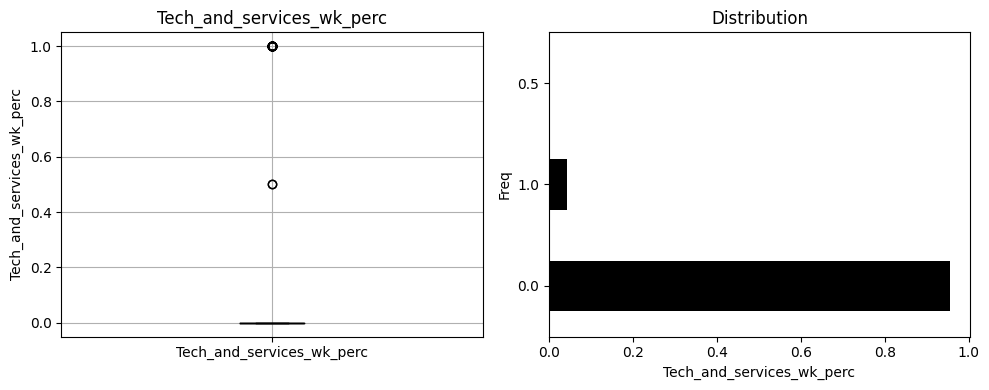

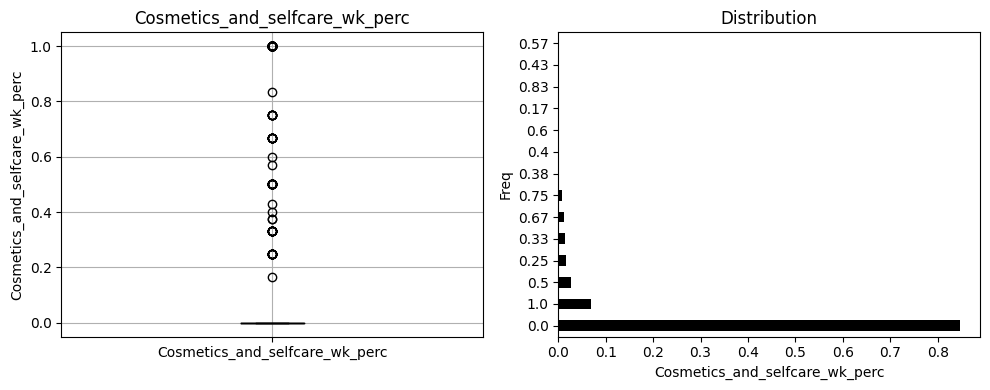

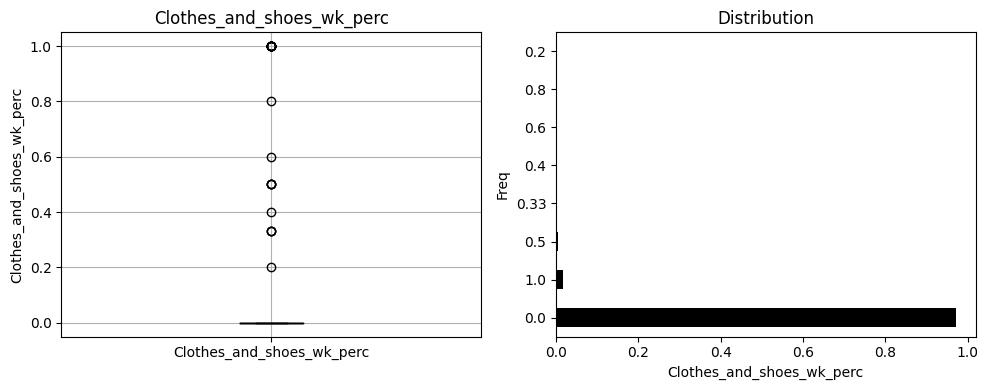

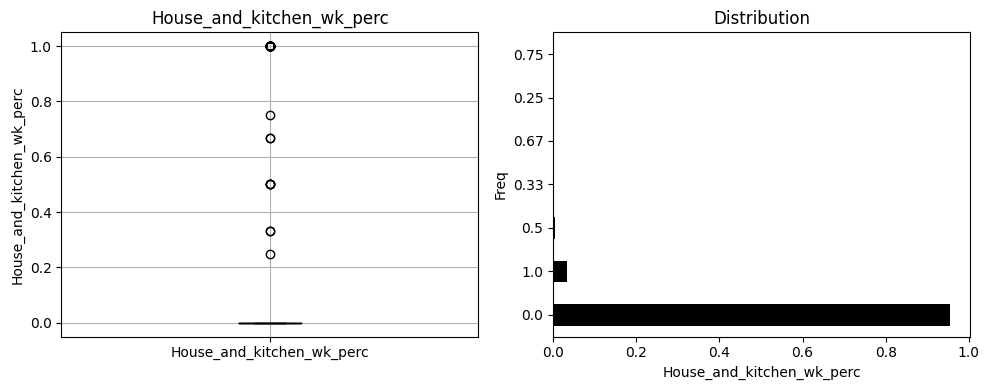

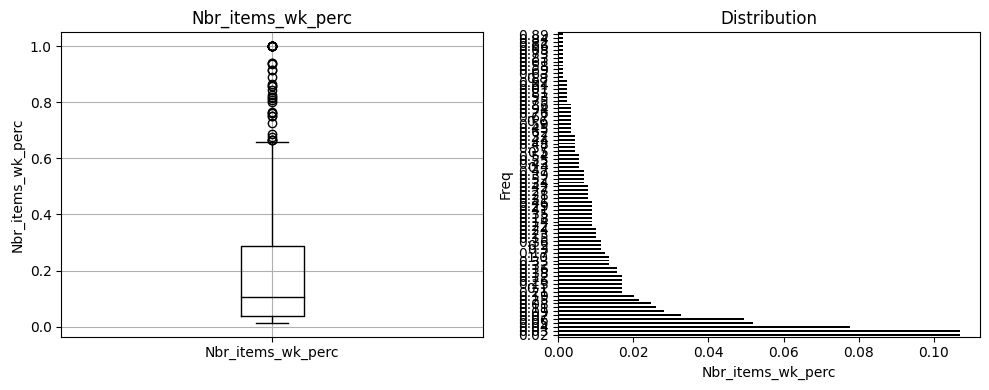

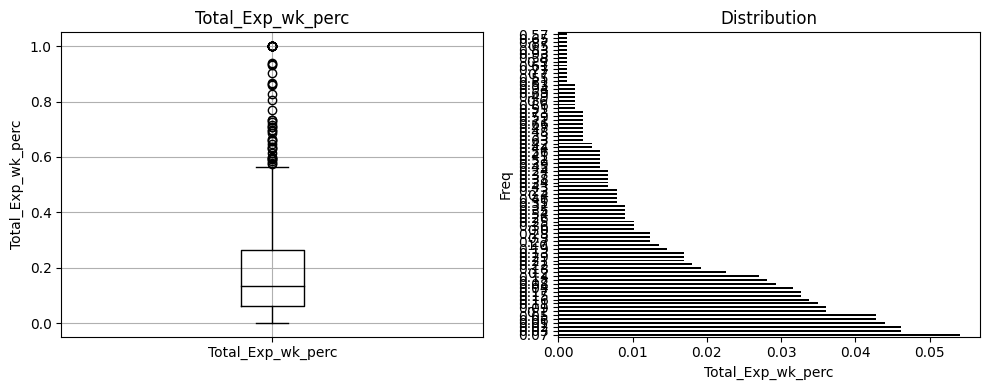

In [17]:
for var in list6:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)   

    plt.subplot(1, 2, 2)
    fig = raw0[var].round(2).value_counts(normalize=True).plot(kind='barh',color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    
    plt.tight_layout()
    plt.show()

<p>
The features in this list have a skewed distribution with varying representation for the dominant categories.
</p>

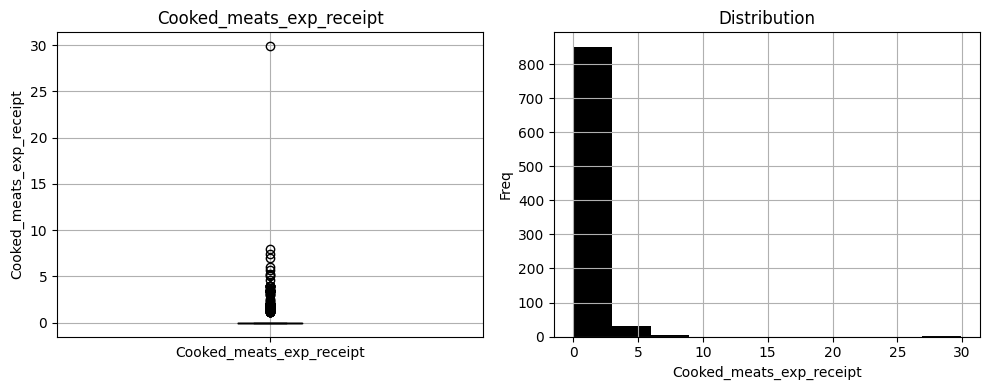

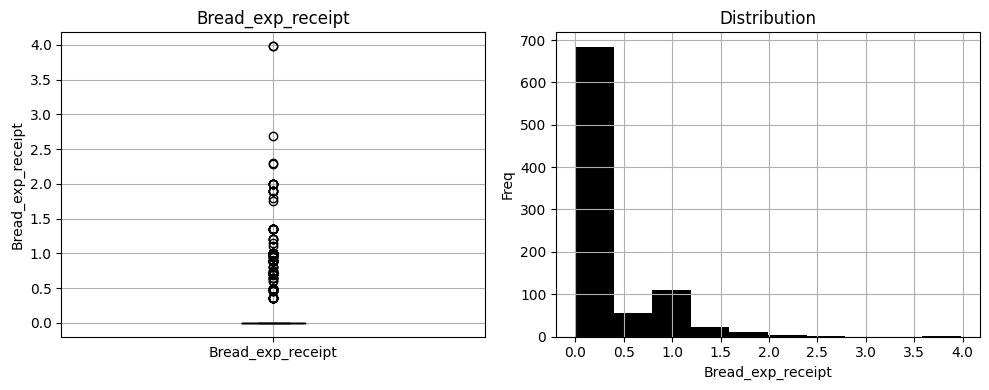

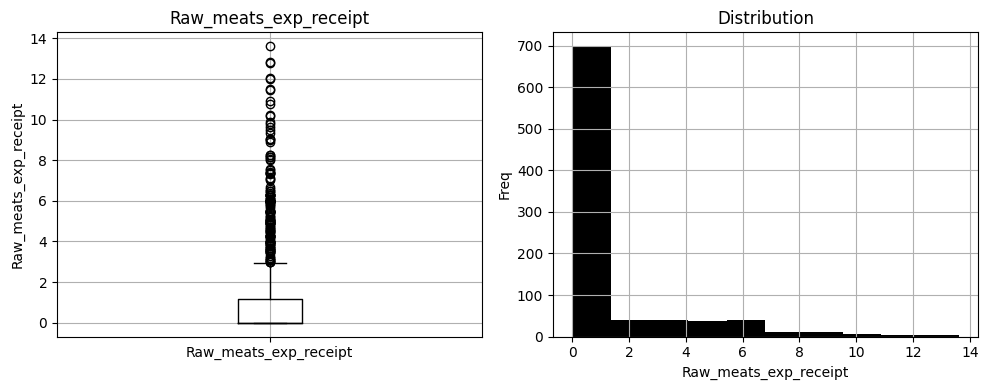

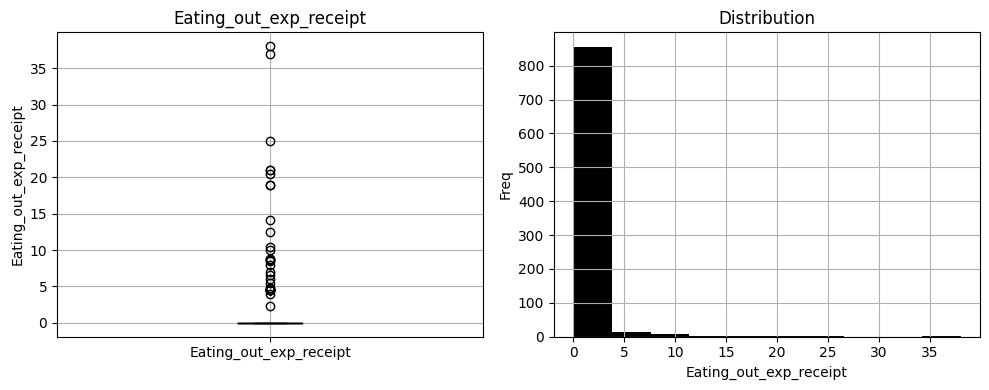

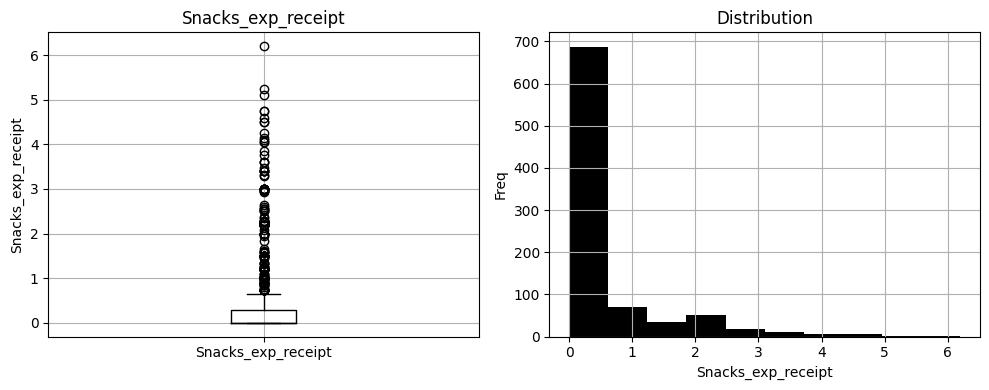

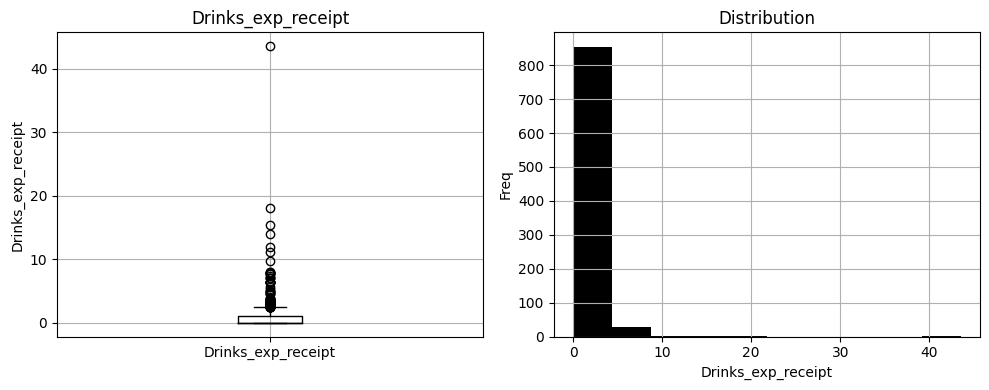

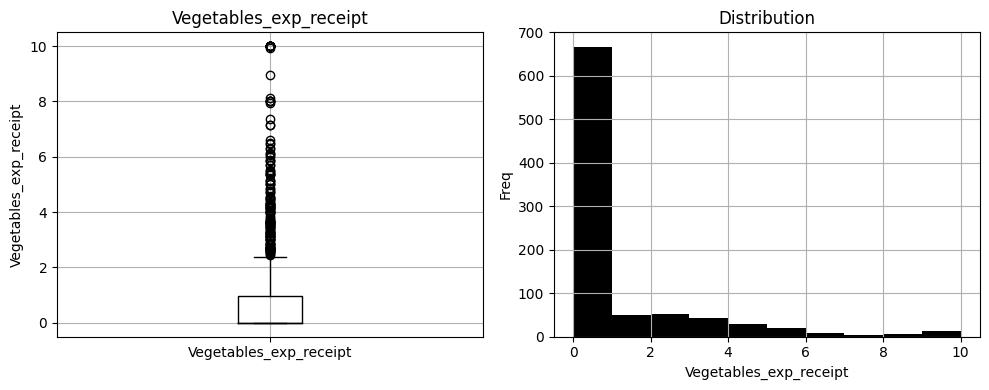

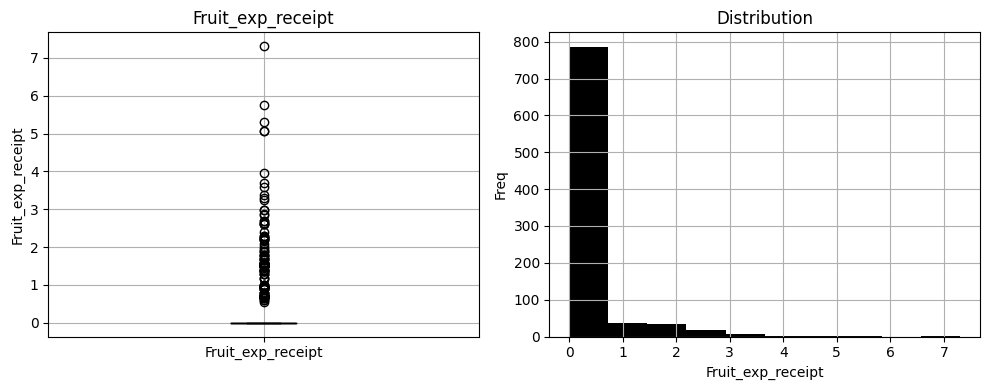

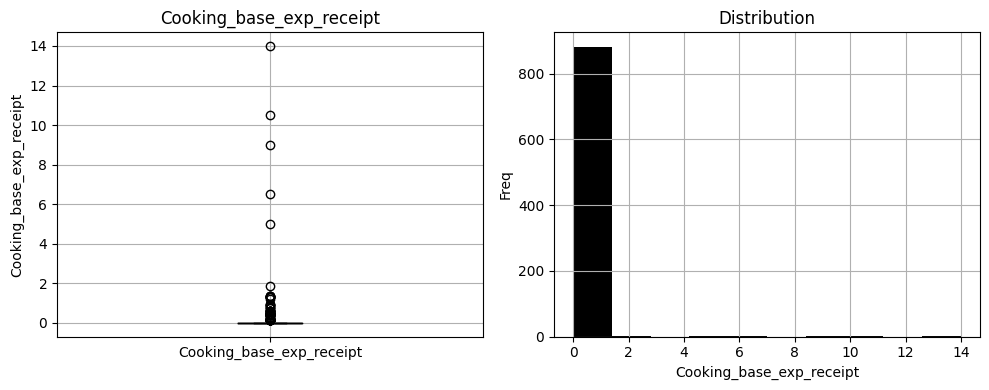

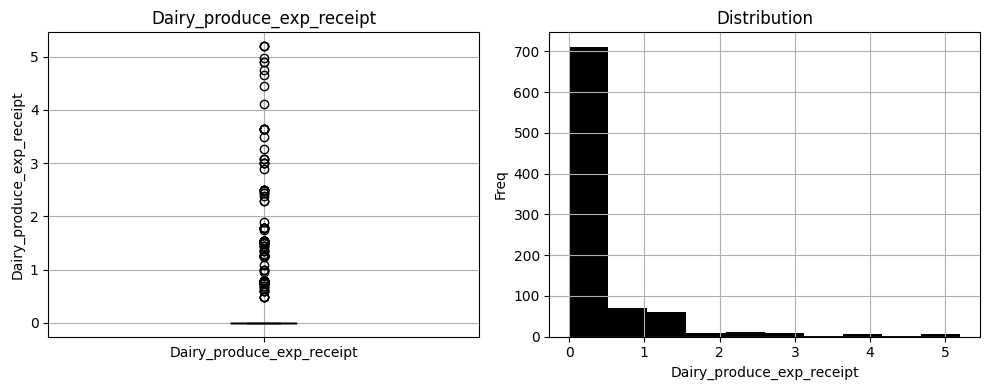

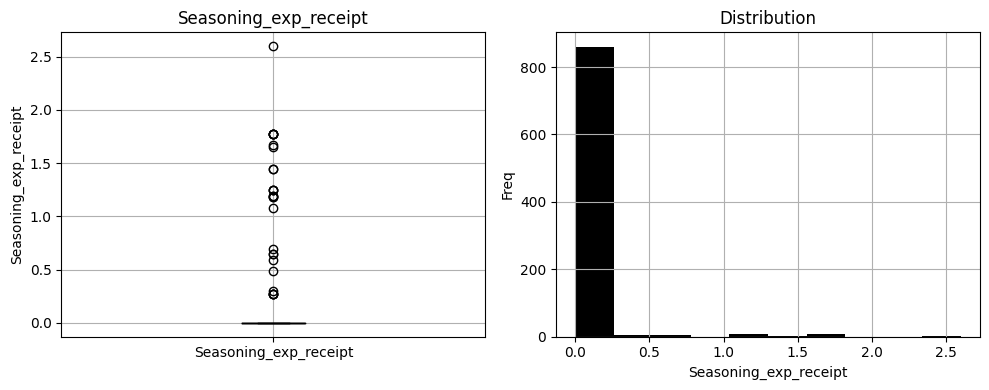

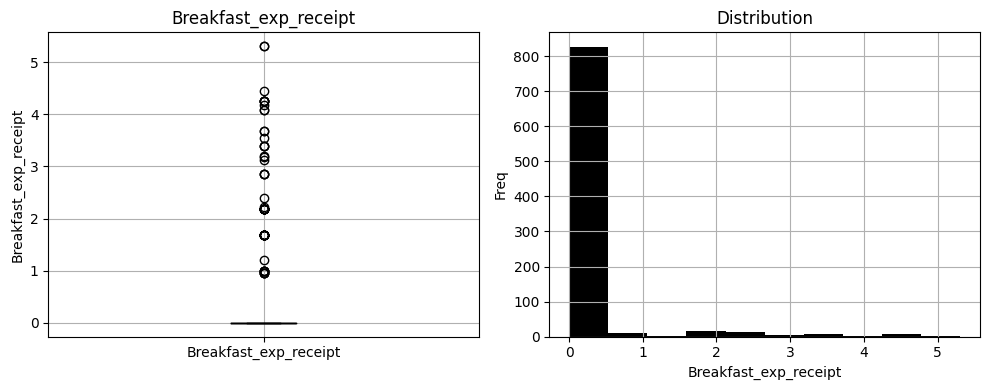

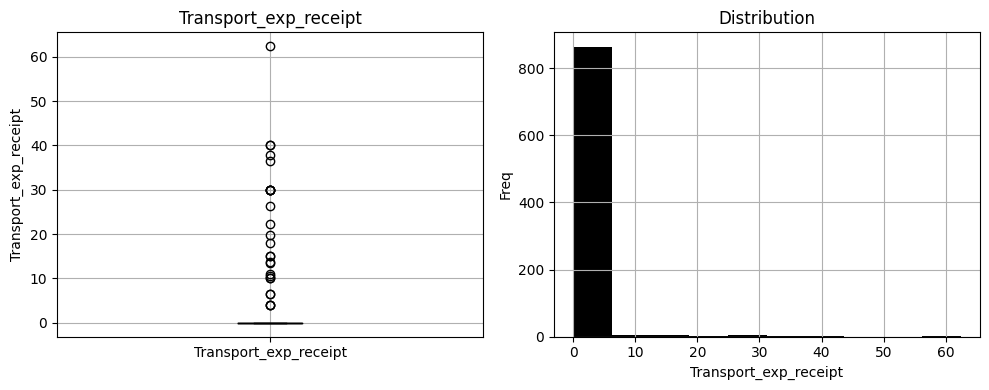

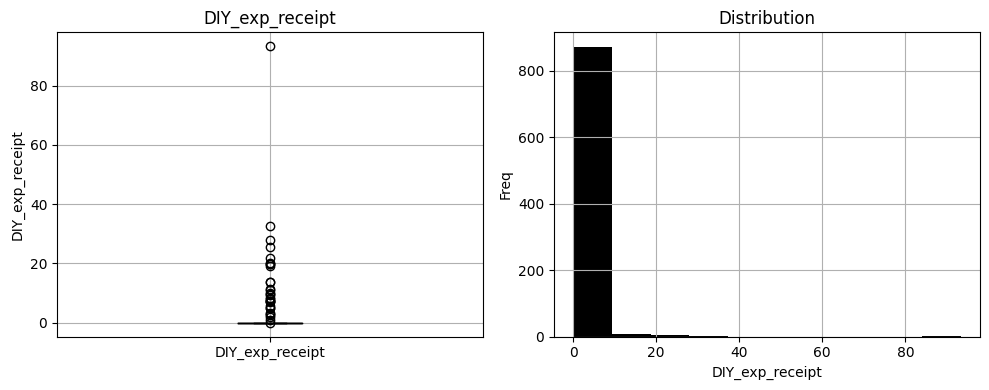

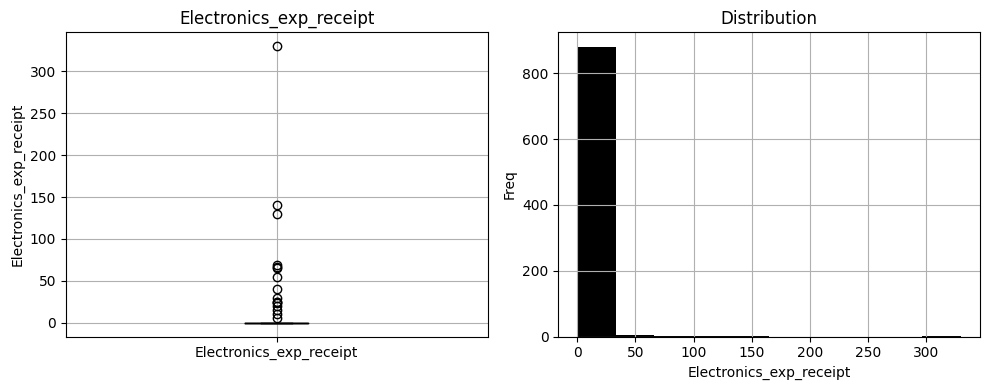

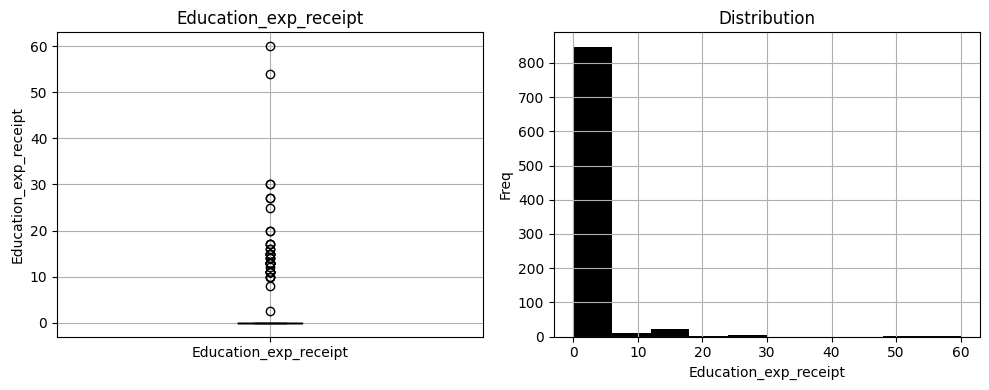

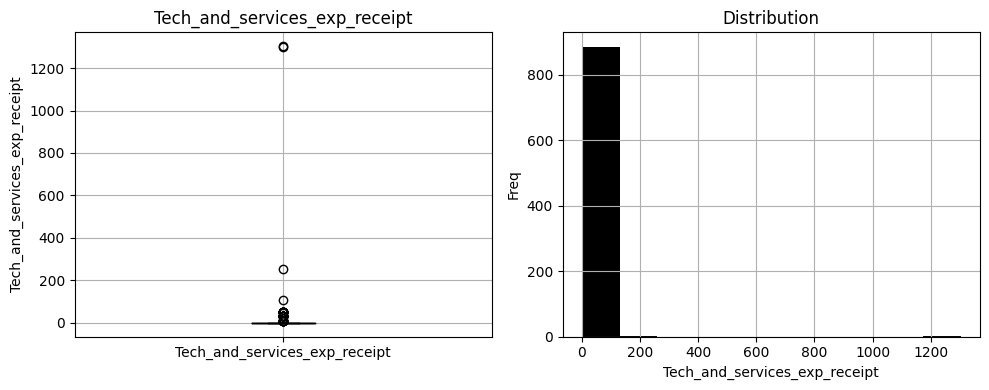

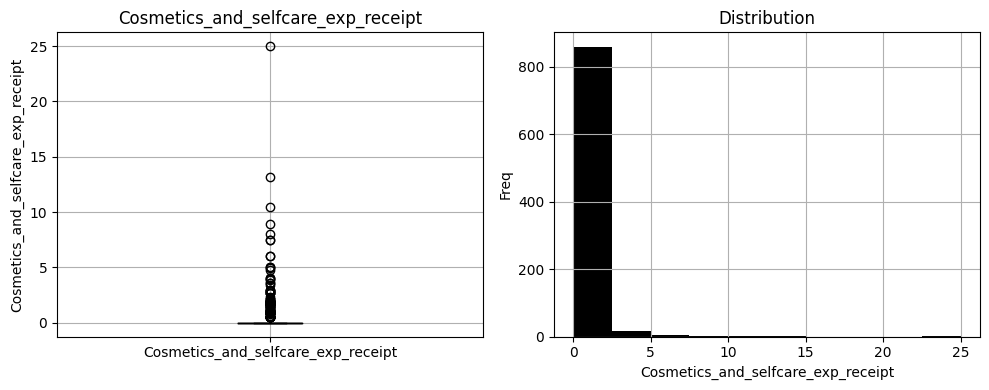

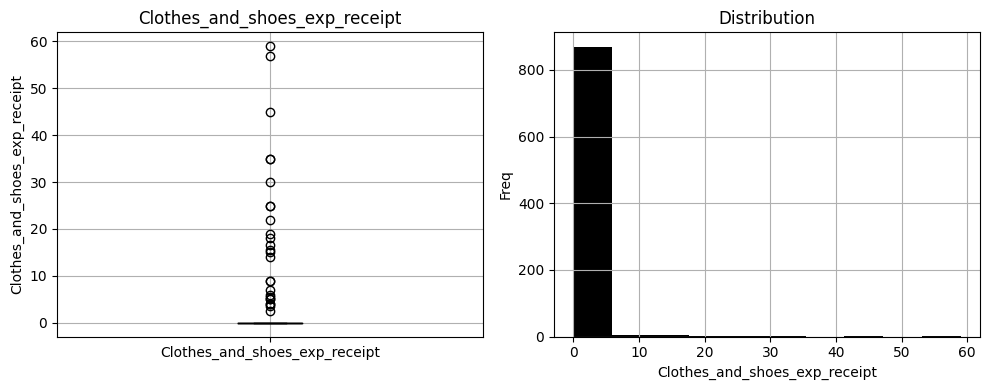

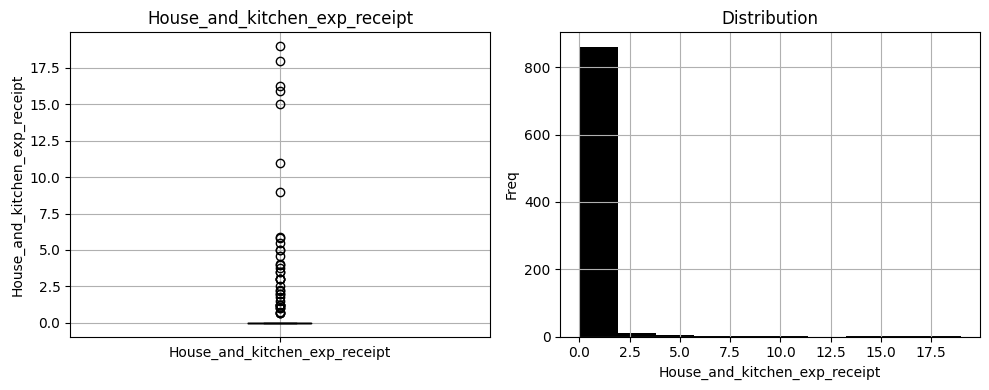

In [18]:
for var in list7:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)    
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    plt.tight_layout()

    plt.show()

<p>
The features in thi list have a skewed distribution with a clear dominant category, 0. Thus the greater the value is, than zero, the more it appears as an outlier.
</p>

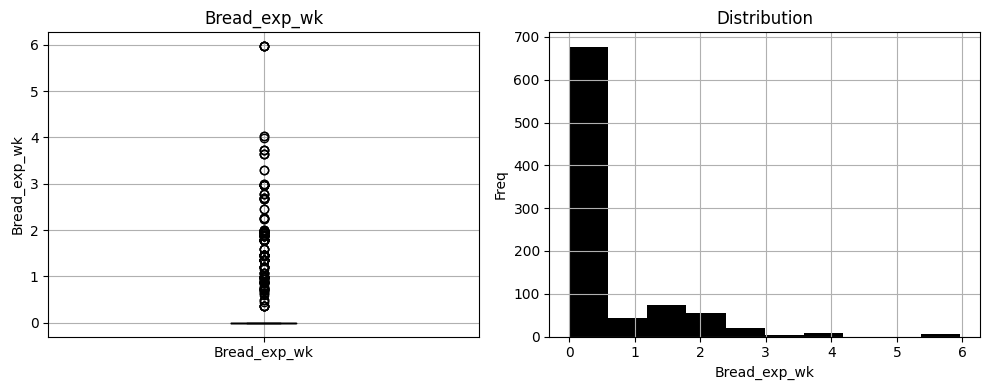

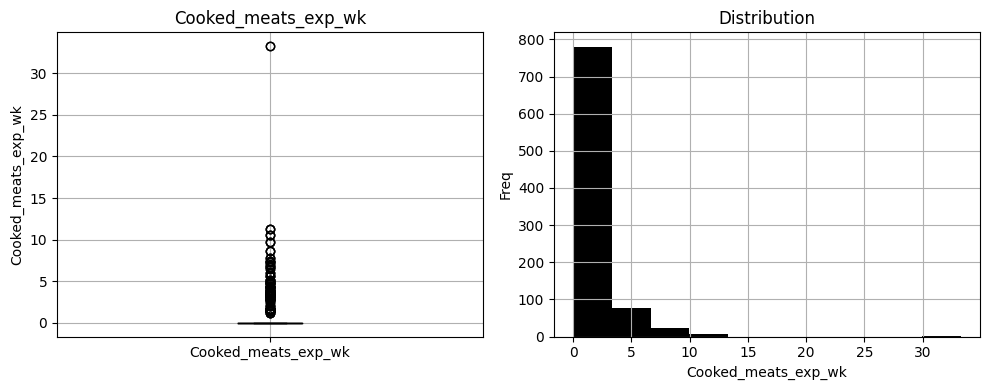

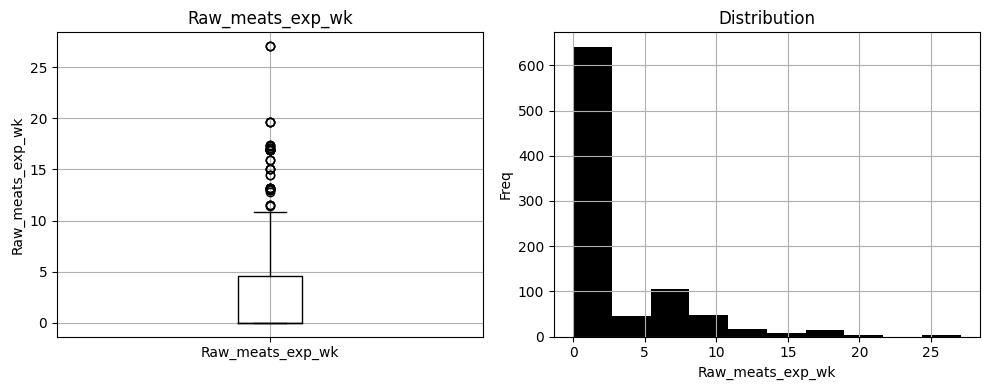

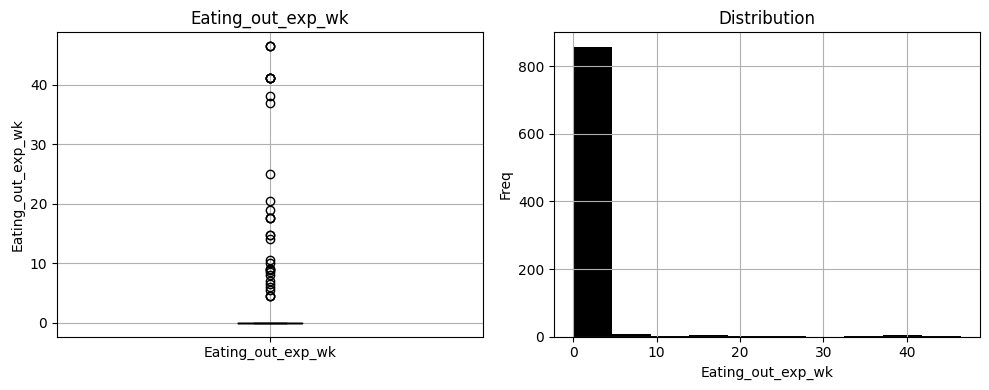

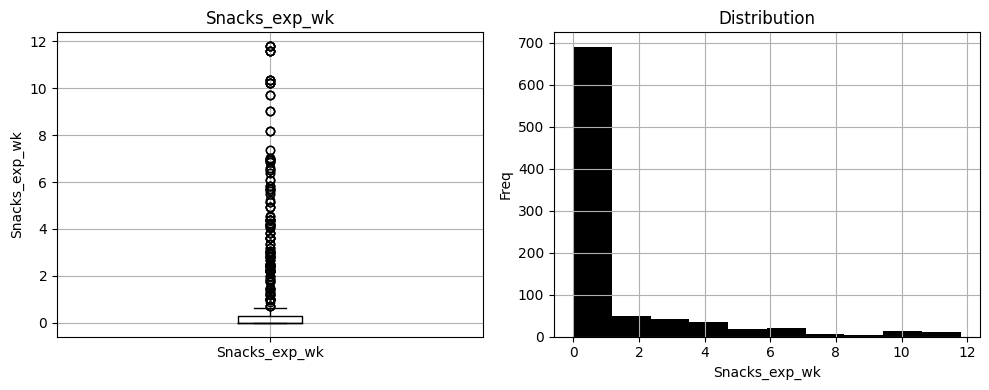

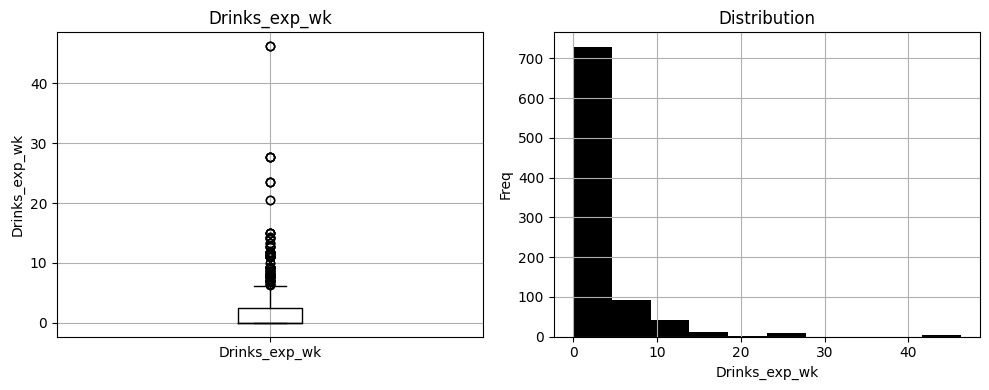

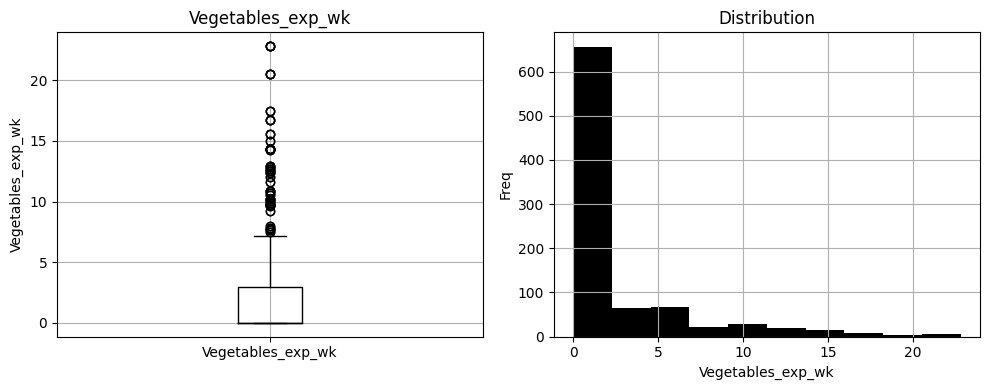

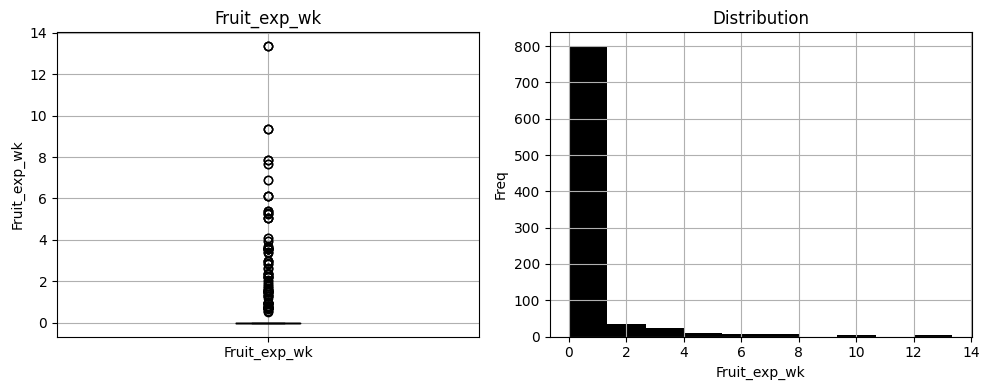

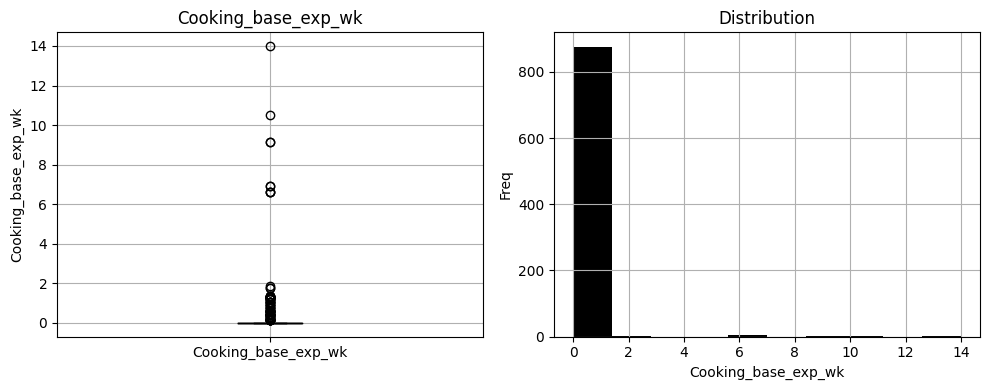

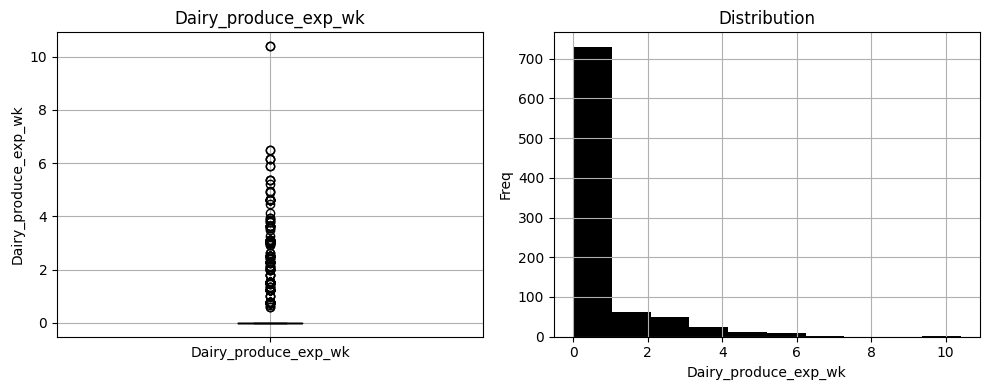

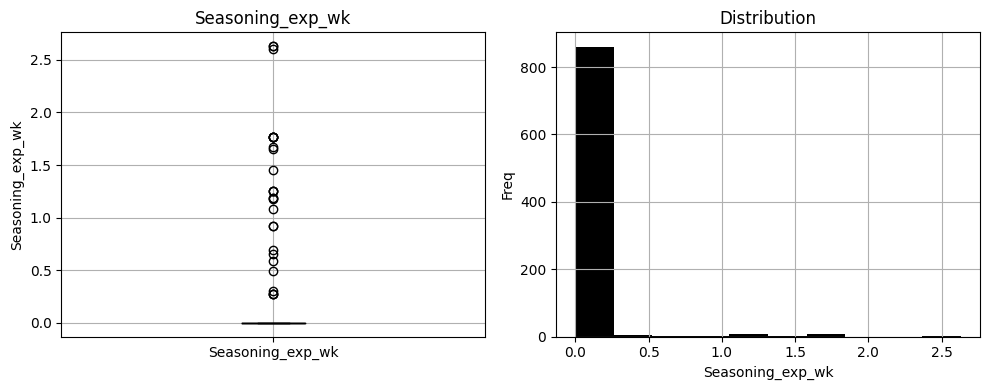

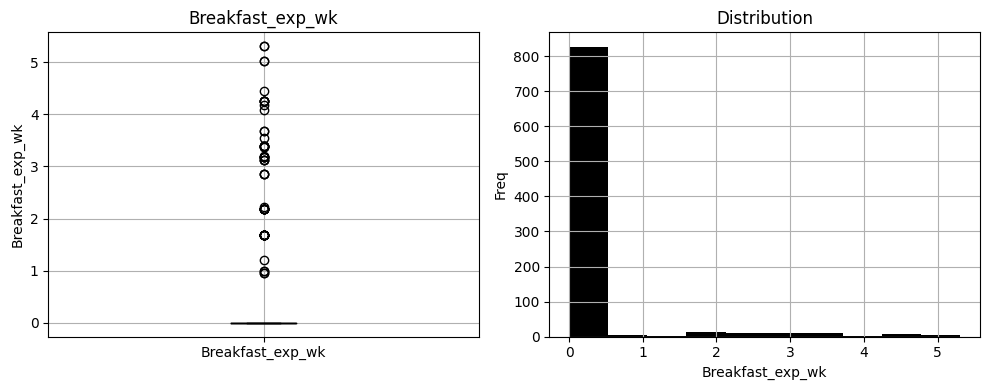

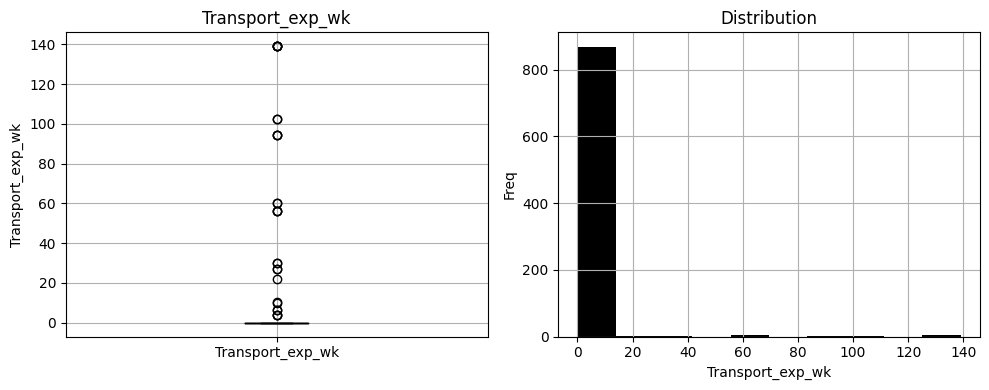

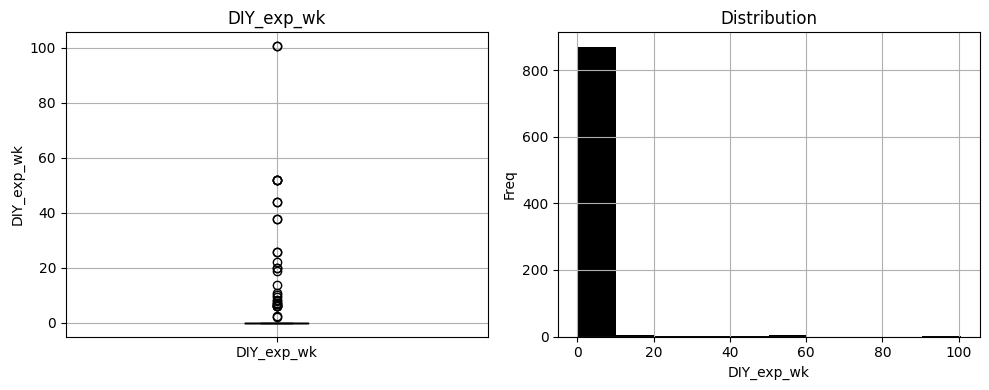

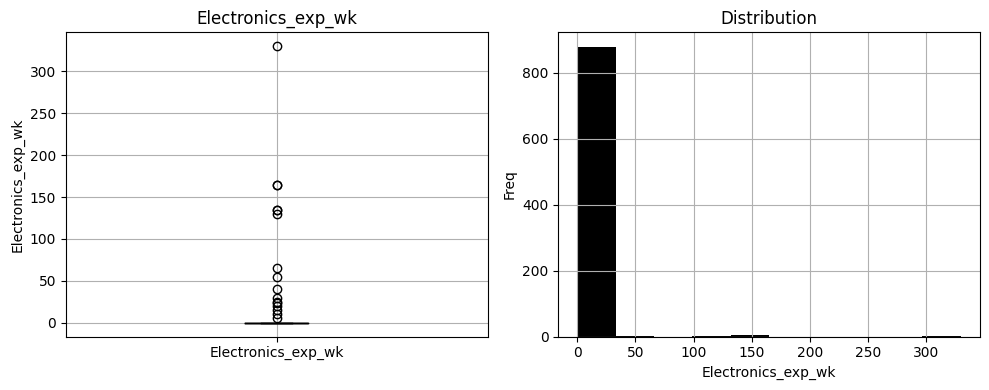

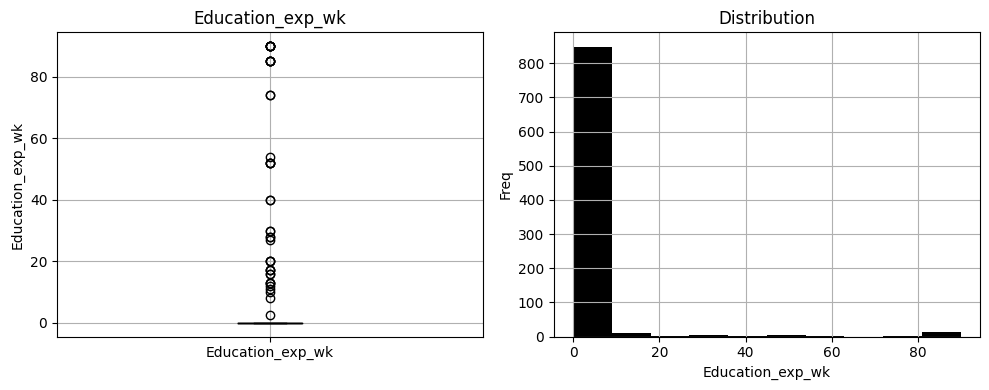

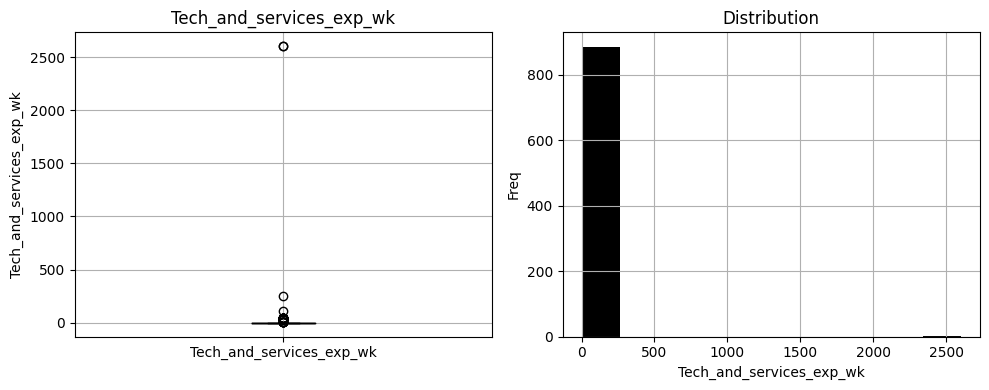

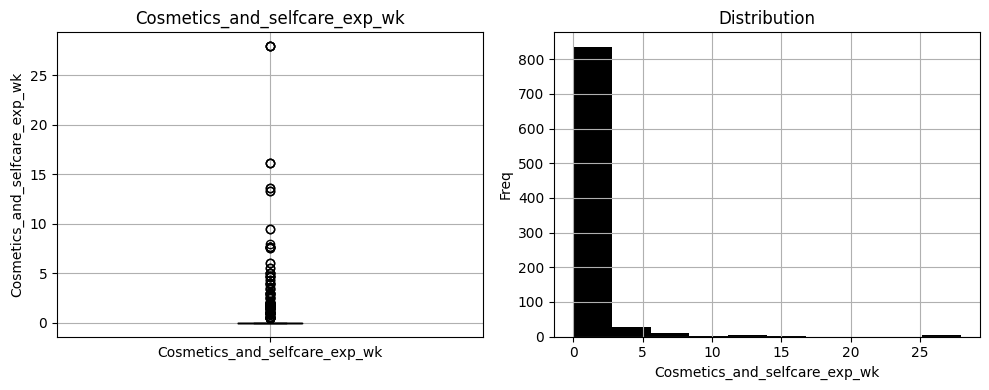

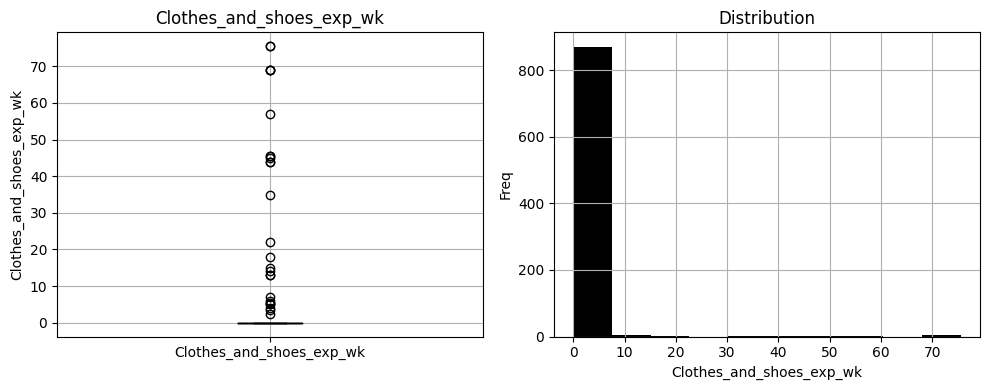

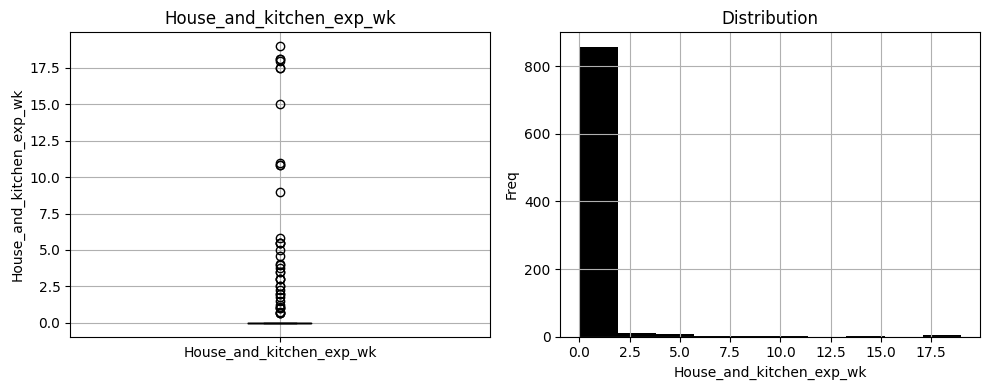

In [19]:
for var in list8:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)
     
    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    plt.tight_layout()

    plt.show()

<p>
The features in thi list have a skewed distribution with a clear dominant category, 0. Thus the greater the value is, than zero, the more it appears as an outlier.
</p>

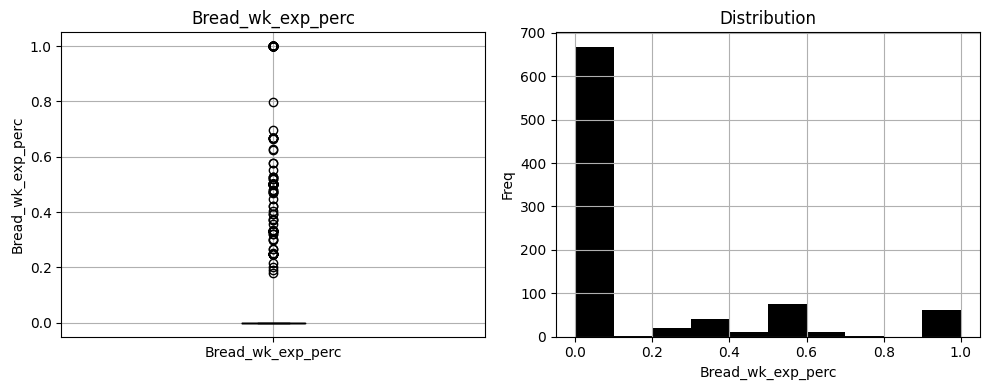

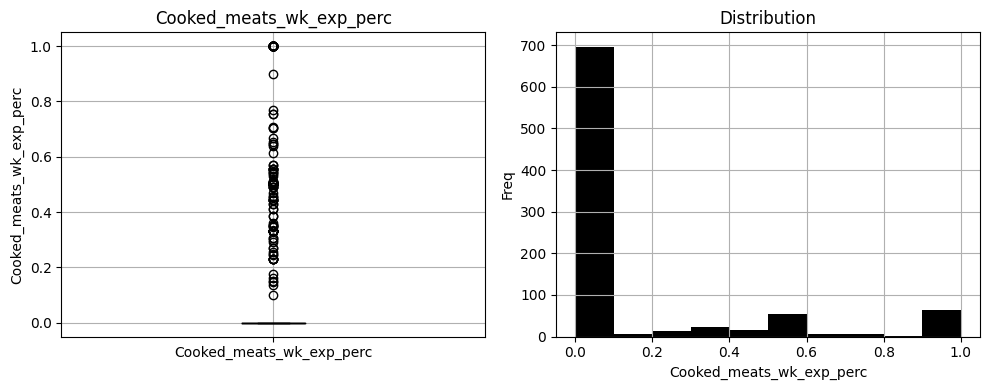

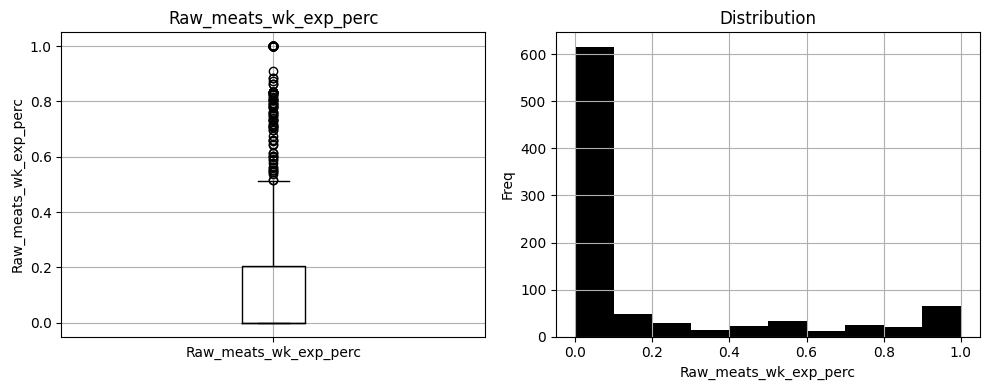

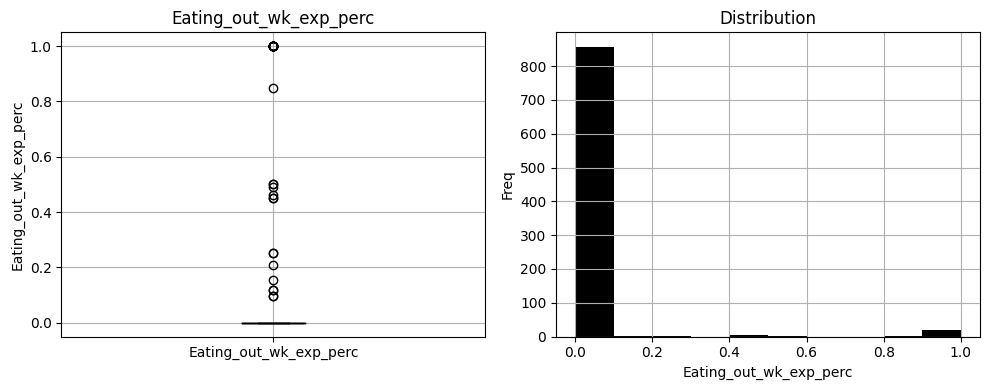

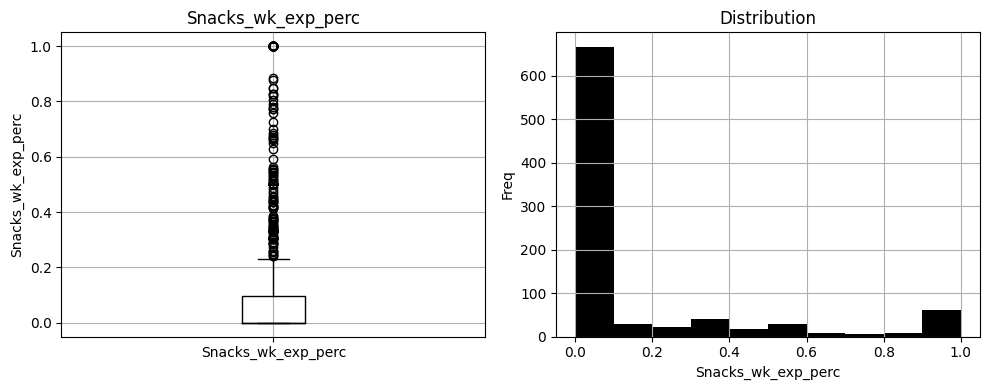

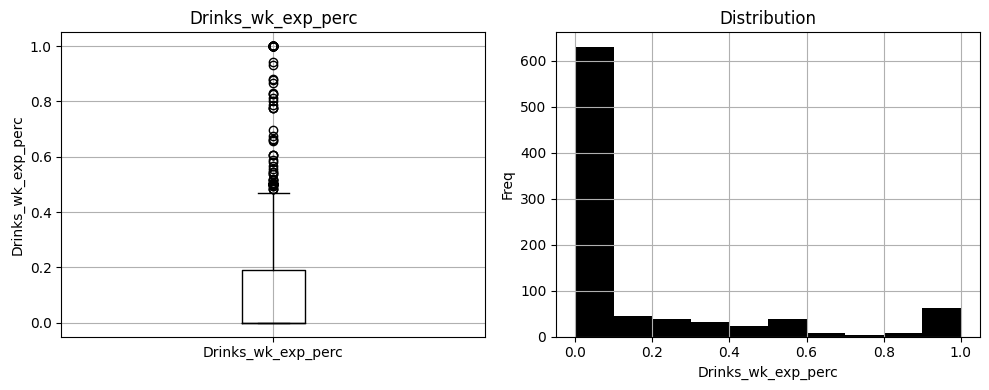

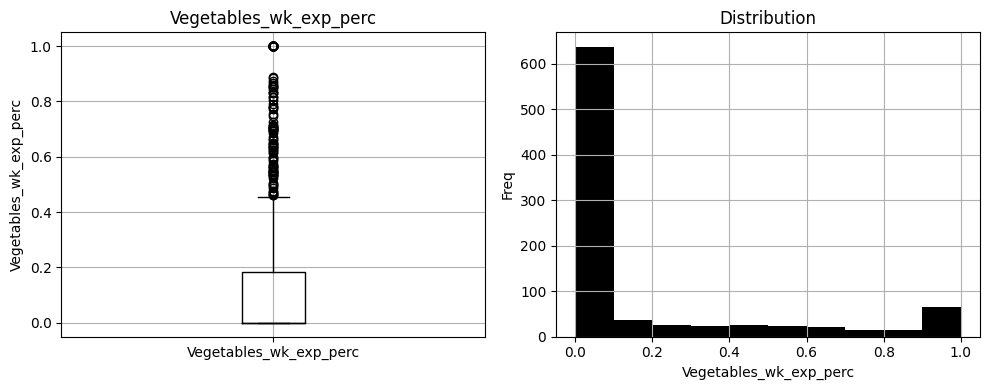

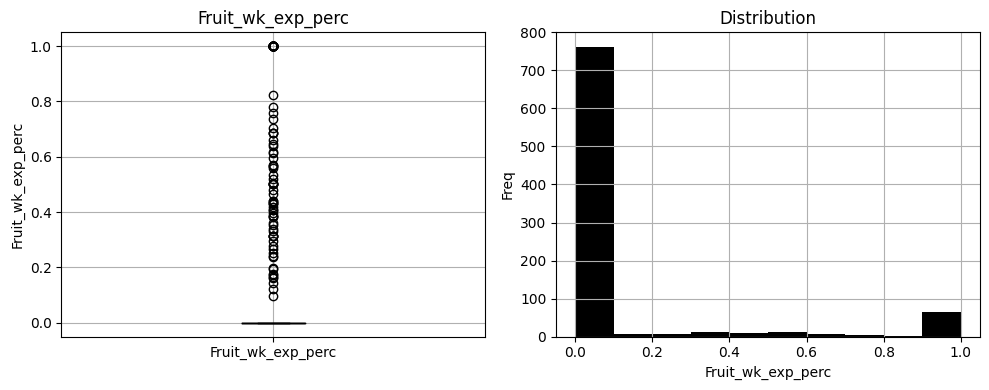

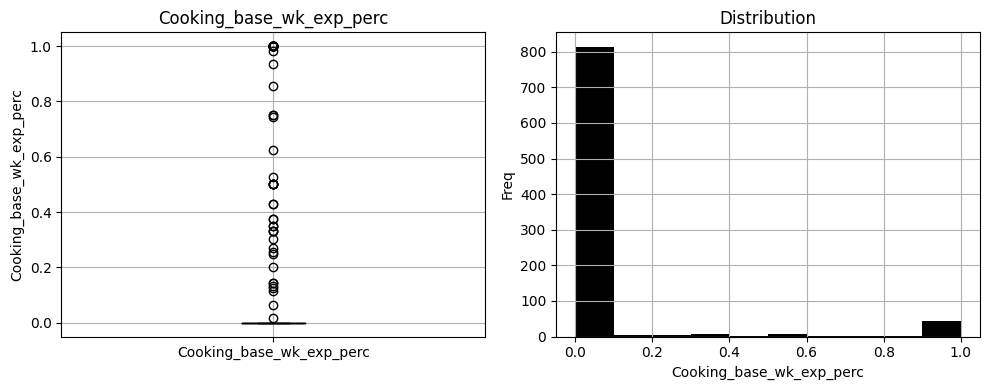

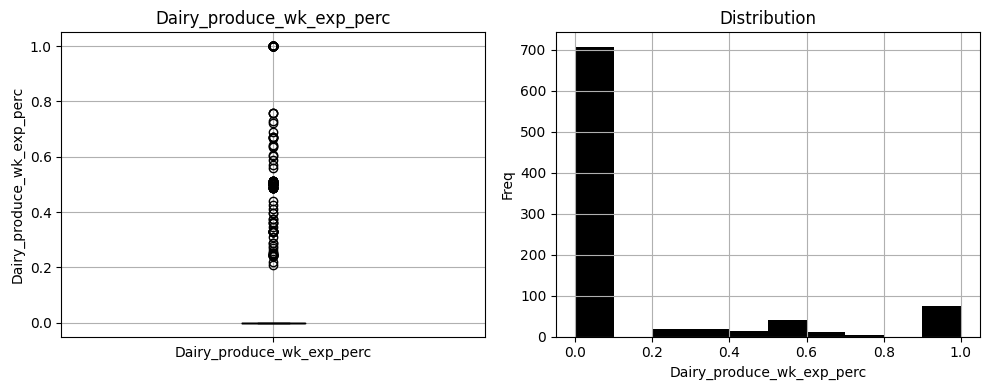

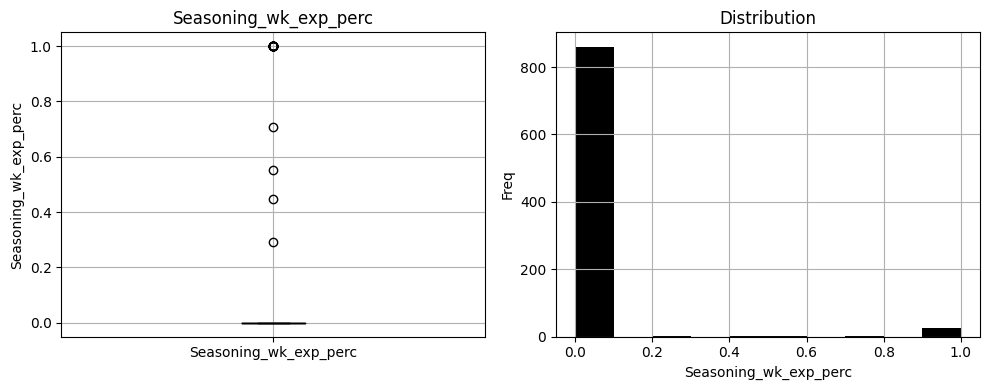

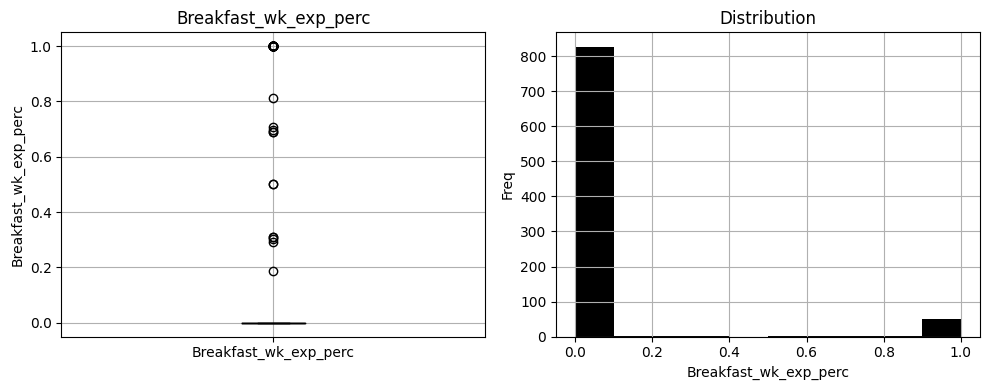

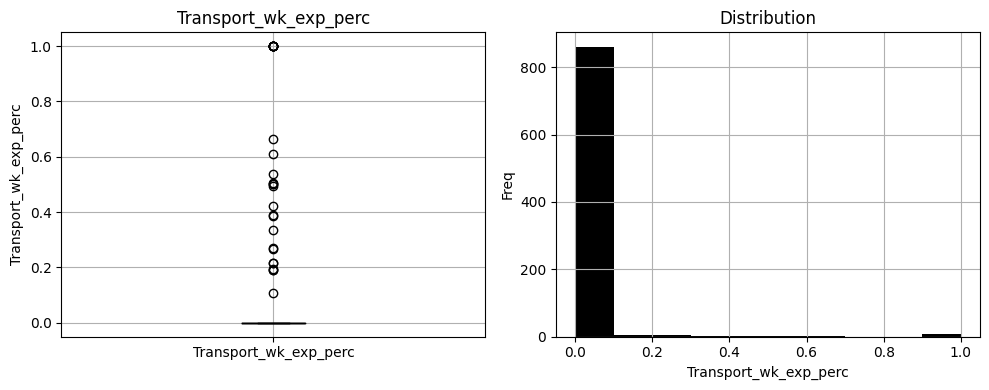

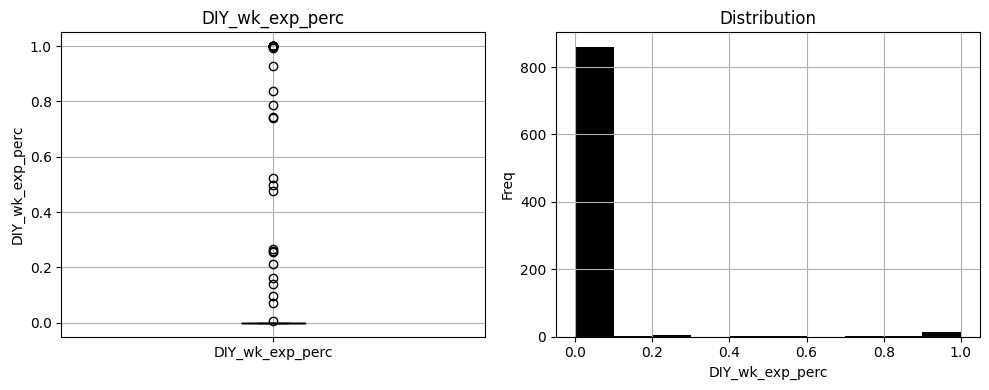

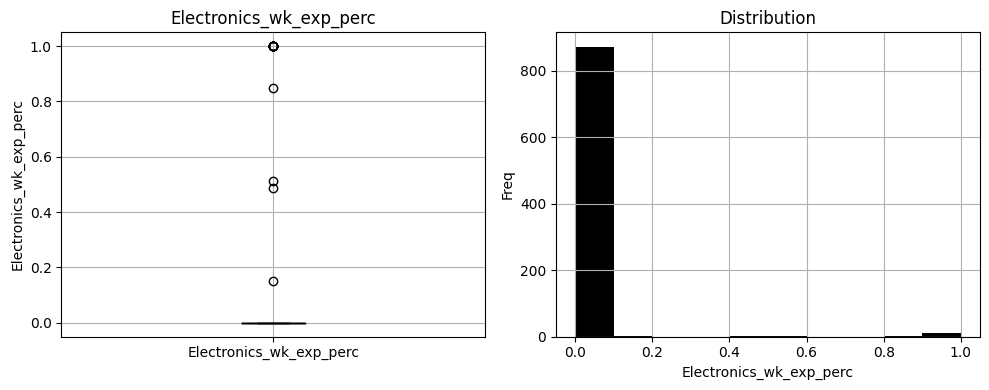

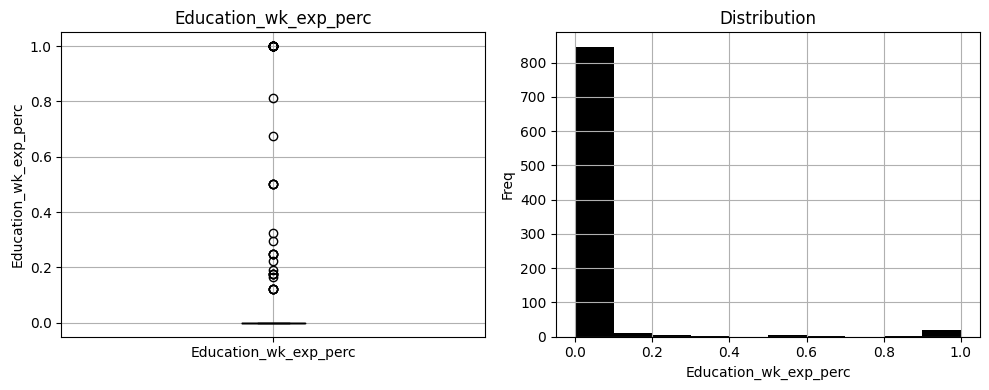

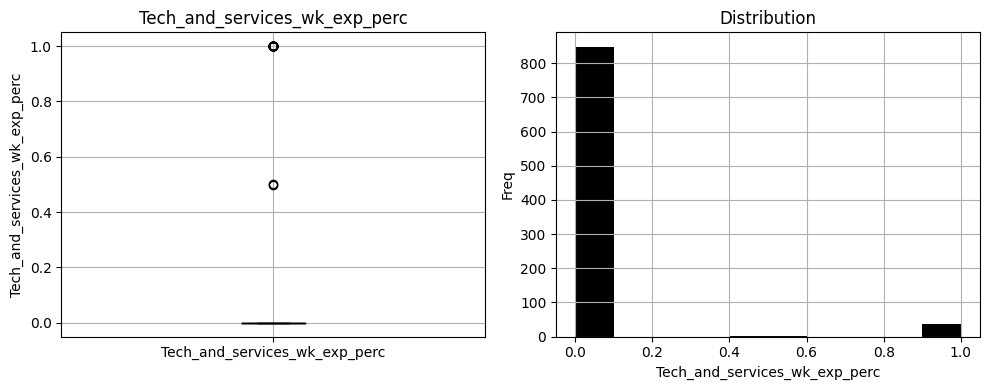

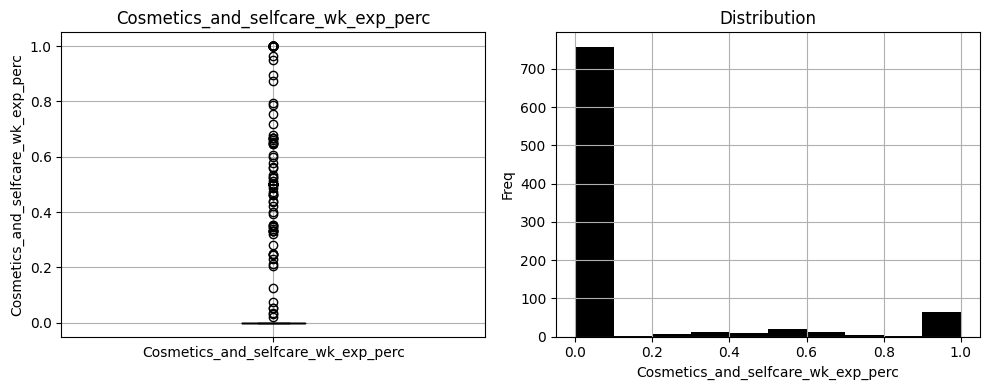

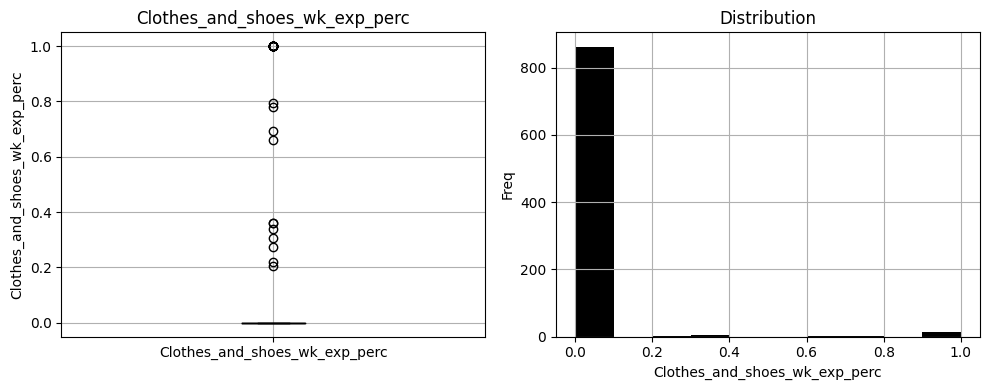

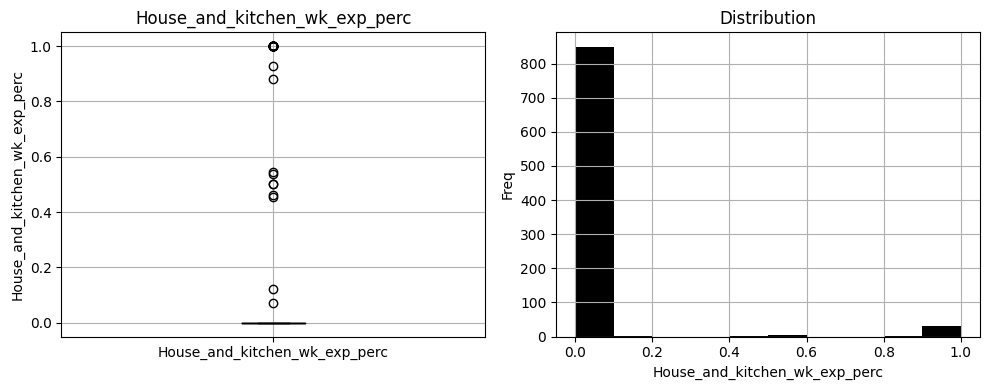

In [20]:
for var in list9:
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    fig = raw0.boxplot(column=var, color='black')
    fig.set_title(f'{var}')
    fig.set_ylabel(var)  
    
    plt.subplot(1, 2, 2)
    fig = raw0[var].hist(color='black')
    fig.set_ylabel('Freq')
    fig.set_title('Distribution')
    fig.set_xlabel(var)
    plt.tight_layout()

    plt.show()

<p>
The features in this list have a skewed distribution with a clear dominant category, 0. Thus the greater the value is, than zero, the more it appears as an outlier.
</p>

<h1 style="color: green;">Exploring Relationships between the target and numerical features</h1>

In [21]:
list3

['Bread',
 'Cooked_meats',
 'Raw_meats',
 'Eating_out',
 'Snacks',
 'Drinks',
 'Vegetables',
 'Fruit',
 'Cooking_base',
 'Dairy_produce',
 'Seasoning',
 'Breakfast',
 'Transport',
 'DIY',
 'Electronics',
 'Education',
 'Tech_and_services',
 'Cosmetics_and_selfcare',
 'Clothes_and_shoes',
 'House_and_kitchen']

In [22]:
Bread_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Bread',
    values='Total_Price',
    aggfunc='count'
)
Bread_vs_target

Bread                  0    1   2
Trips_response_lt_5              
0                    533  124  13
1                    135   72  11

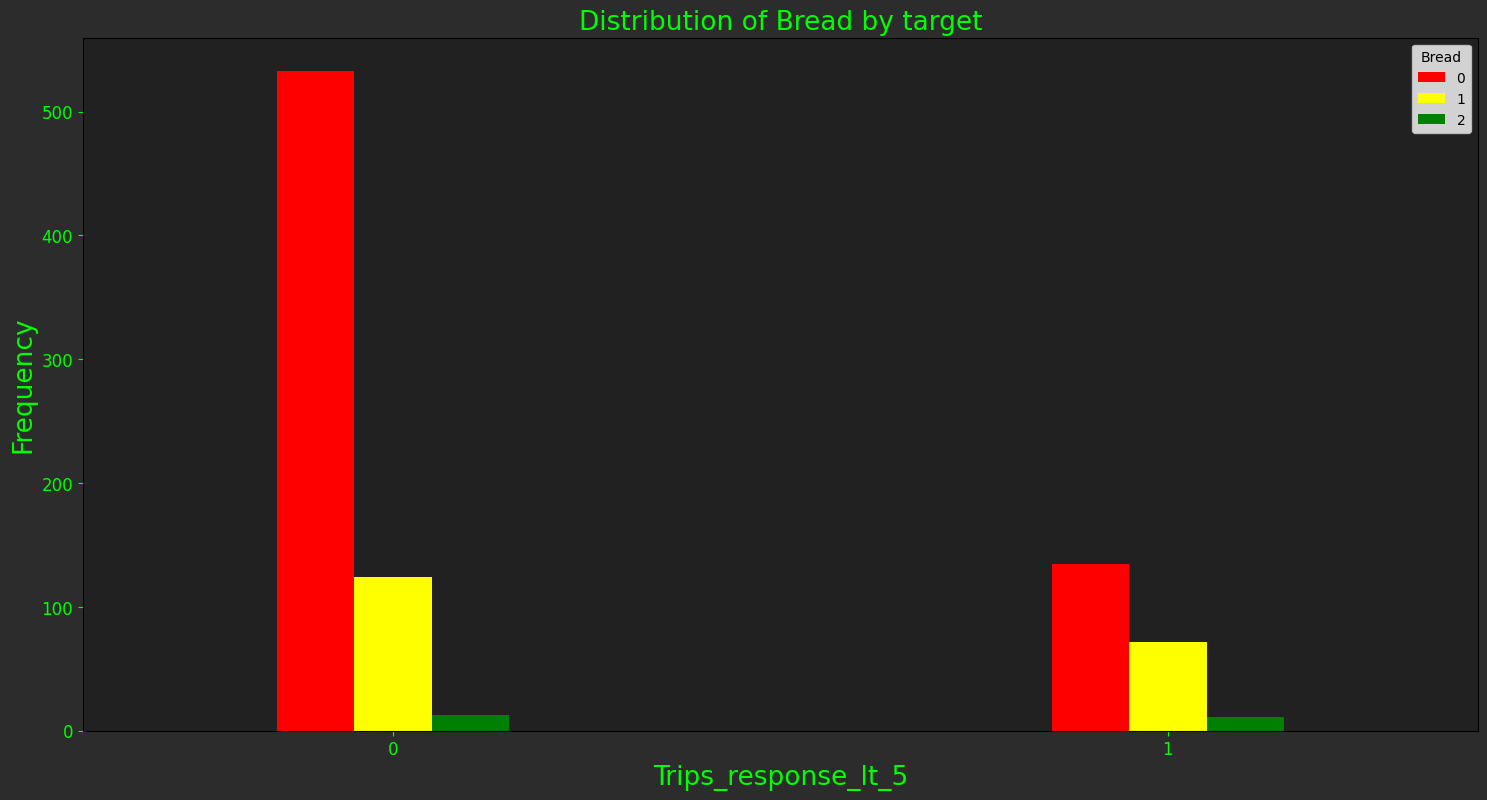

In [23]:
width_=0.3
# Plotting Bread_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Bread_vs_target.plot(ax=ax,
                        kind='bar',
                        color=['red','yellow','green'],
                        ylabel='Frequency',
                        width=width_
                    )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of Bread by target", fontsize=19)
plt.show()

In [24]:
Cooked_meats_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Cooked_meats',
    values='Total_Price',
    aggfunc='count'
)
Cooked_meats_vs_target.fillna(0)

Cooked_meats            0      1     2    3    4    7    12
Trips_response_lt_5                                        
0                    537.0  116.0  15.0  1.0  0.0  0.0  1.0
1                    159.0   47.0   9.0  1.0  1.0  1.0  0.0

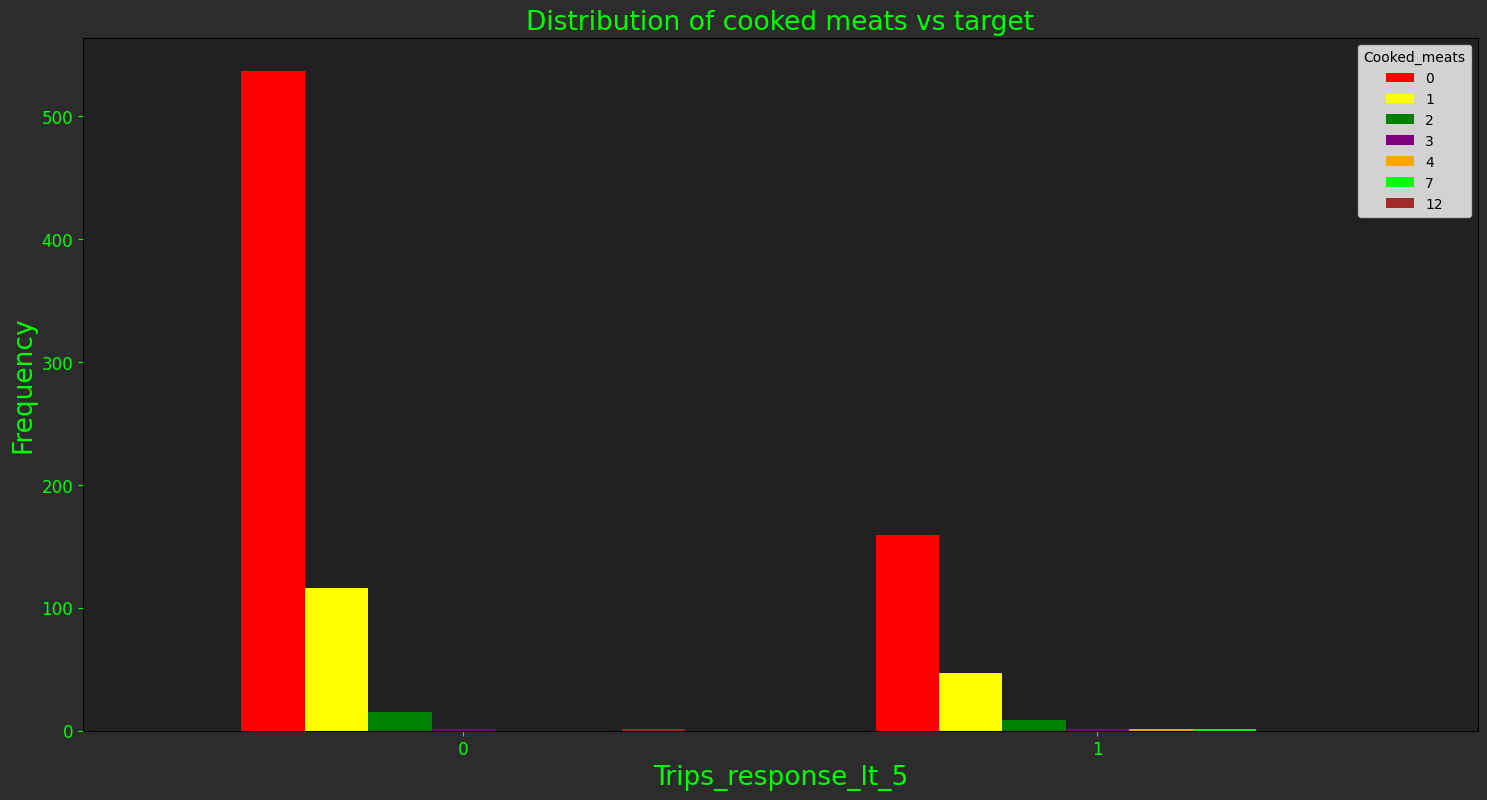

In [25]:
width_=0.7
# Plotting Cooked_meats_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Cooked_meats_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown'],
                           ylabel='Frequency',
                           width=width_
                           )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of cooked meats vs target", fontsize=19)
plt.show()

In [26]:
Raw_meats_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Raw_meats',
    values='Total_Price',
    aggfunc='count'
)
Raw_meats_vs_target.fillna(0)

Raw_meats                0      1     2     3    4    5    6
Trips_response_lt_5                                         
0                    490.0  115.0  46.0  16.0  2.0  1.0  0.0
1                    118.0   52.0  34.0   8.0  1.0  4.0  1.0

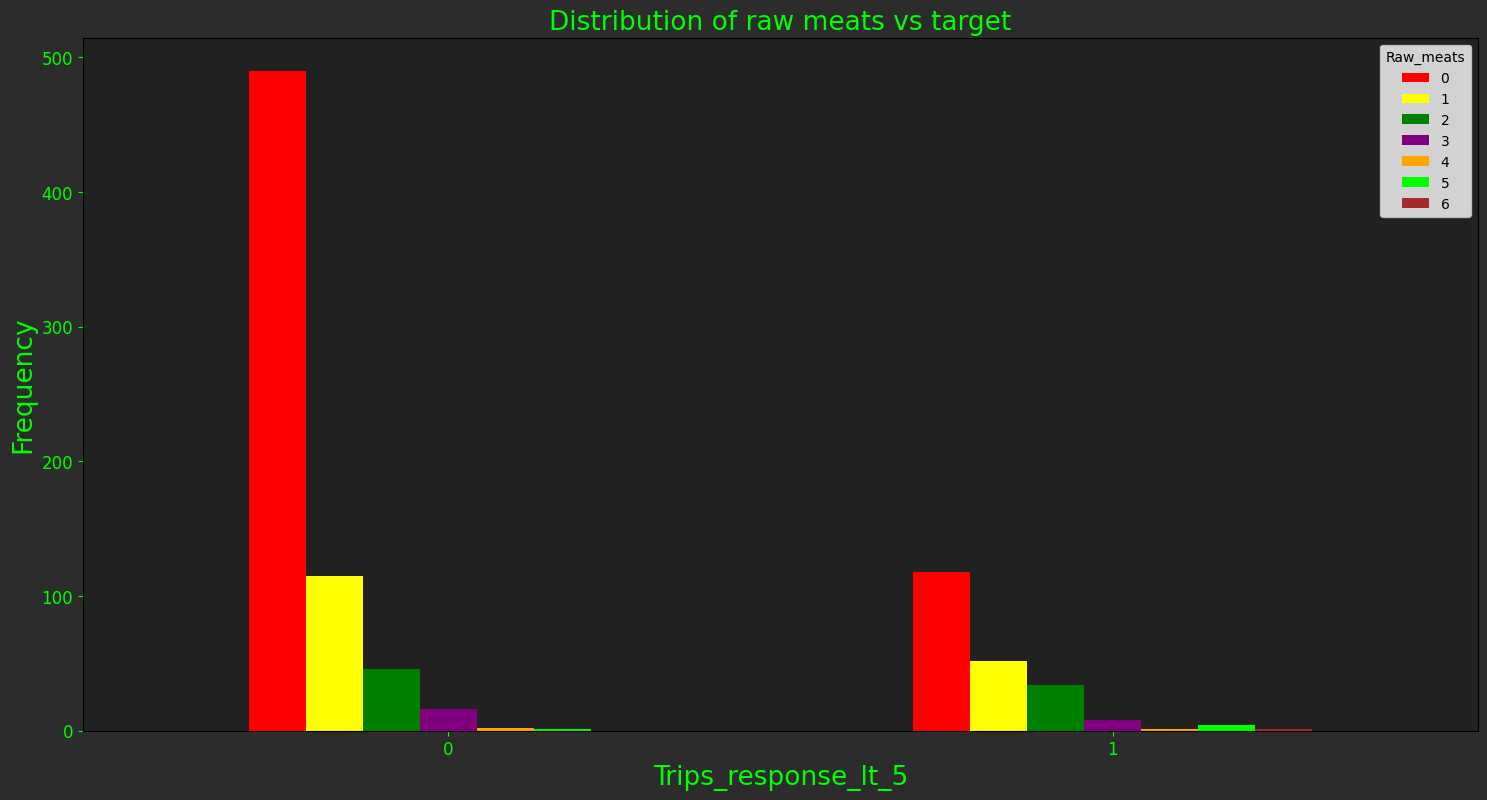

In [27]:
width_=0.6
# Plotting Raw_meats_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Raw_meats_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown'],
                           ylabel='Frequency',
                           width=width_
                        )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of raw meats vs target", fontsize=19)
plt.show()

In [28]:
Eating_out_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Eating_out',
    values='Total_Price',
    aggfunc='count'
)
Eating_out_vs_target.fillna(0)

Eating_out               0     1    2    3    5    7
Trips_response_lt_5                                 
0                    640.0  19.0  4.0  4.0  2.0  1.0
1                    215.0   1.0  1.0  1.0  0.0  0.0

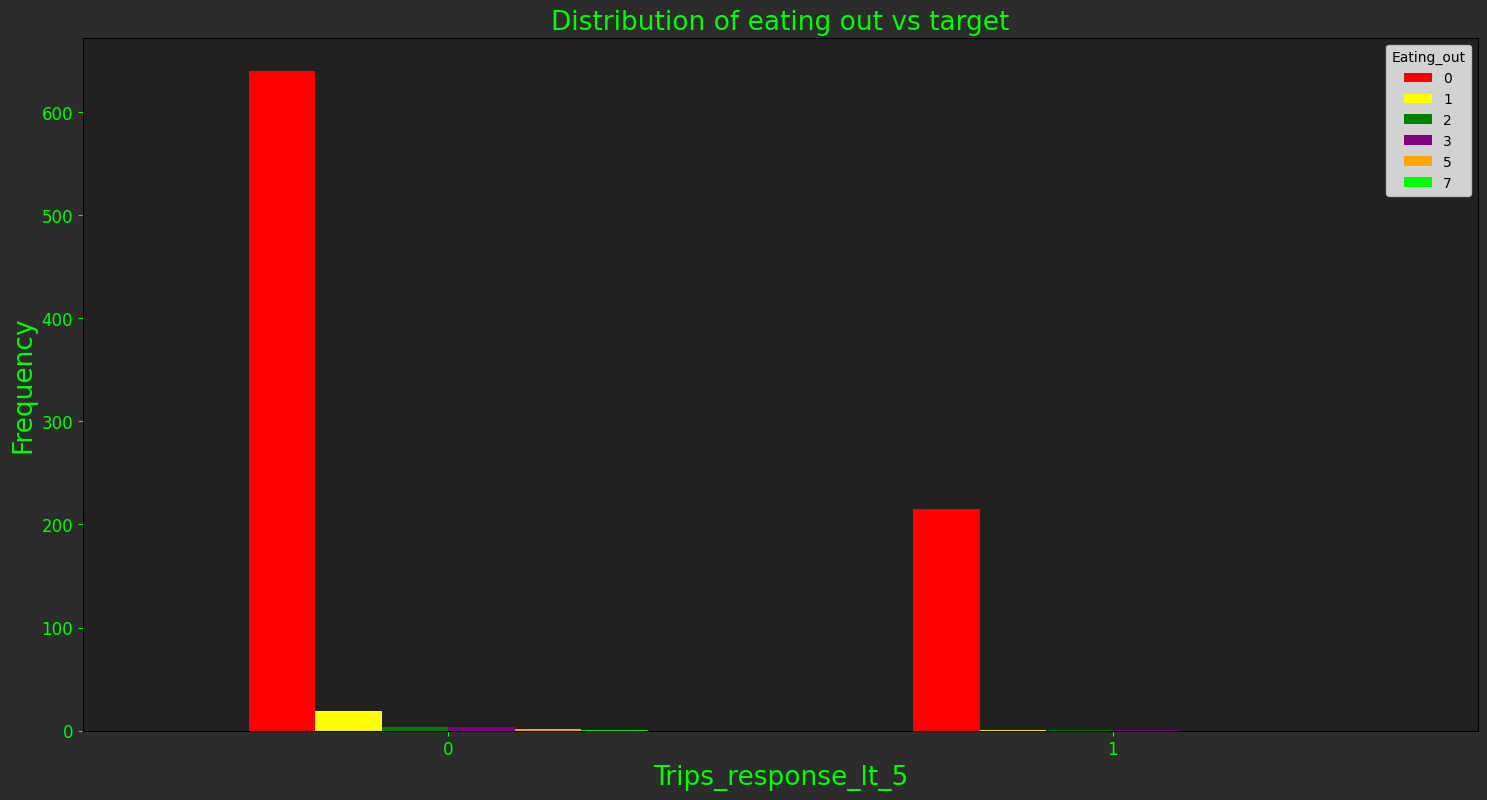

In [29]:
width_=0.6
# Plotting Eating_out_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Eating_out_vs_target.plot(ax=ax,
               kind='bar',
               color=['red','yellow','green','purple','orange','lime','brown'],
               ylabel='Frequency',
                          width=width_
                         )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of eating out vs target", fontsize=19)
plt.show()

In [30]:
Snacks_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Snacks',
    values='Total_Price',
    aggfunc='count'
)
Snacks_vs_target.fillna(0)

Snacks                   0     1     2     3     4    5     6    7    8
Trips_response_lt_5                                                    
0                    512.0  52.0  36.0  26.0  14.0  4.0  21.0  4.0  1.0
1                    152.0  16.0  22.0   5.0   2.0  1.0  18.0  2.0  0.0

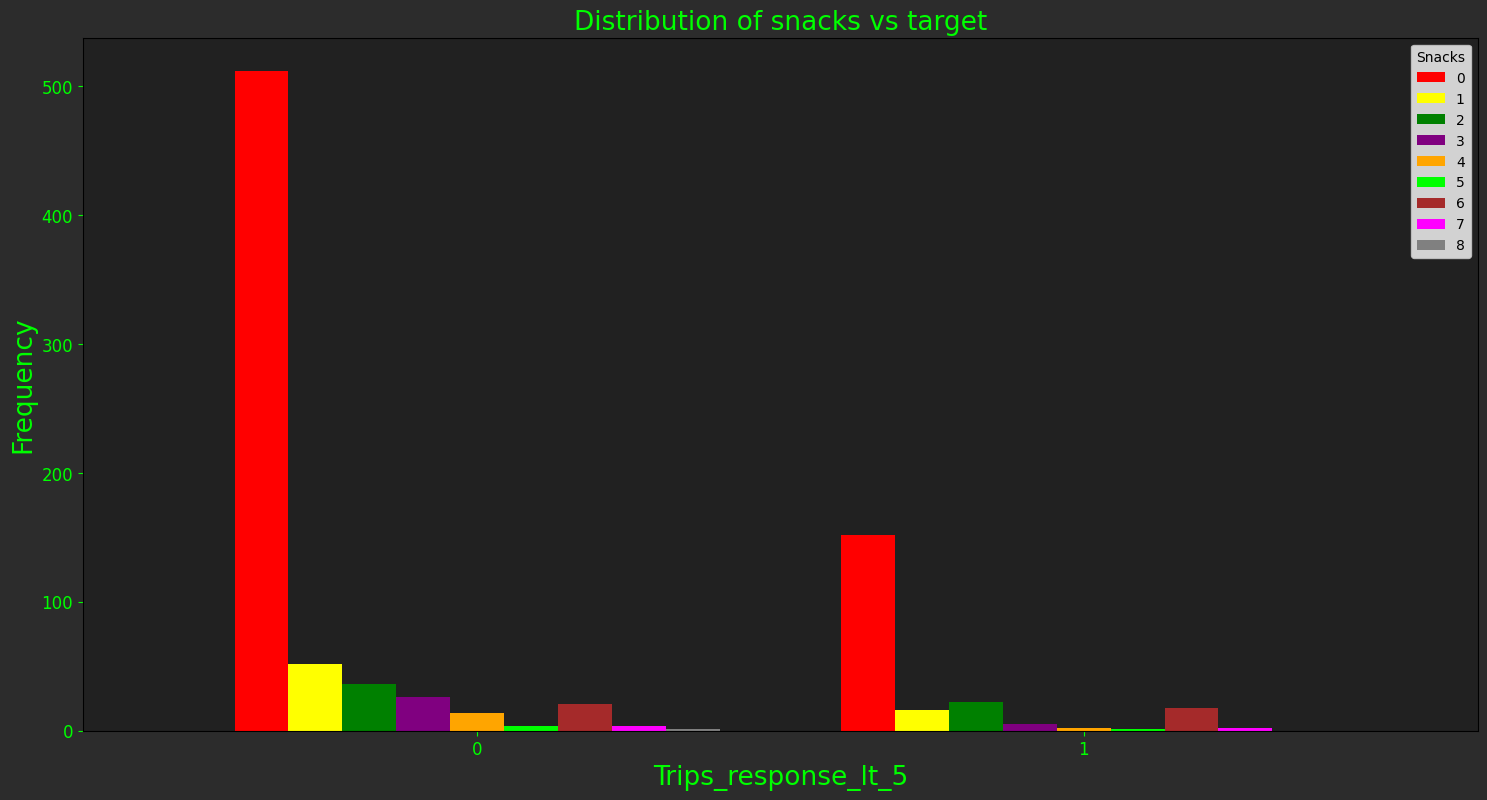

In [31]:
width_=0.8
# Plotting Snacks_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Snacks_vs_target.plot(ax=ax,
                       kind='bar',
                       color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                       ylabel='Frequency',
                       width=width_
                     )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of snacks vs target", fontsize=19)
plt.show()

In [32]:
Drinks_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Drinks',
    values='Total_Price',
    aggfunc='count'
)
Drinks_vs_target.fillna(0)

Drinks                   0      1     2     3    4    5    7    8
Trips_response_lt_5                                              
0                    452.0  154.0  44.0  11.0  4.0  3.0  1.0  1.0
1                    159.0   44.0  10.0   5.0  0.0  0.0  0.0  0.0

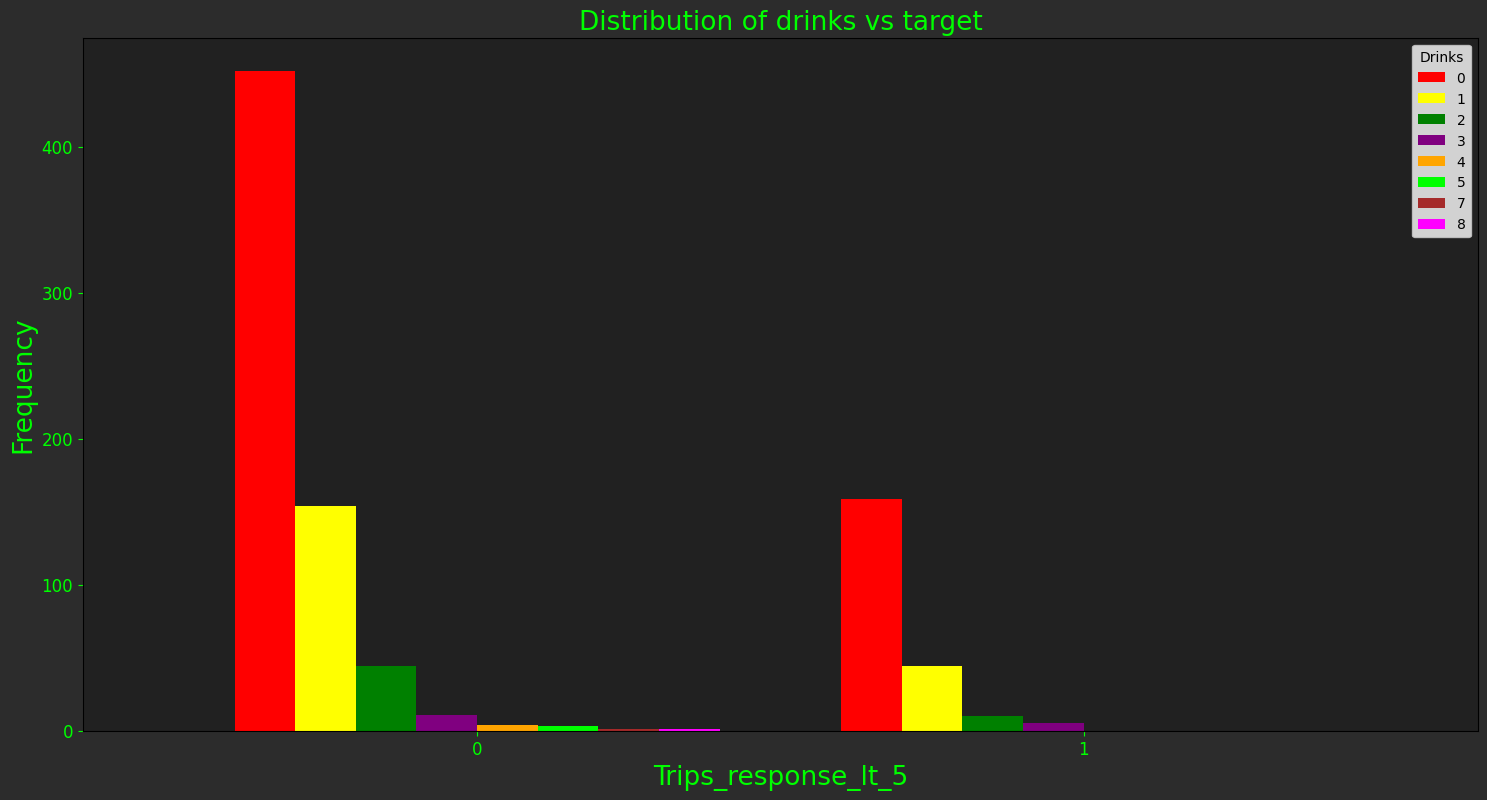

In [33]:
width_=0.8
# Plotting Drinks_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Drinks_vs_target.plot(ax=ax,
                       kind='bar',
                       color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                       ylabel='Frequency',
                       width=width_
                     )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of drinks vs target", fontsize=19)
plt.show()

In [34]:
Vegetables_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Vegetables',
    values='Total_Price',
    aggfunc='count'
)
Vegetables_vs_target.fillna(0)

Vegetables              0     1     2     3     4     5     6     7    8   \
Trips_response_lt_5                                                         
0                    494.0  28.0  18.0  29.0  26.0  25.0  21.0  14.0  5.0   
1                    130.0  10.0   4.0   7.0  15.0  12.0  11.0  13.0  8.0   

Vegetables            9    10   11   12   13  
Trips_response_lt_5                           
0                    4.0  1.0  3.0  1.0  1.0  
1                    2.0  6.0  0.0  0.0  0.0

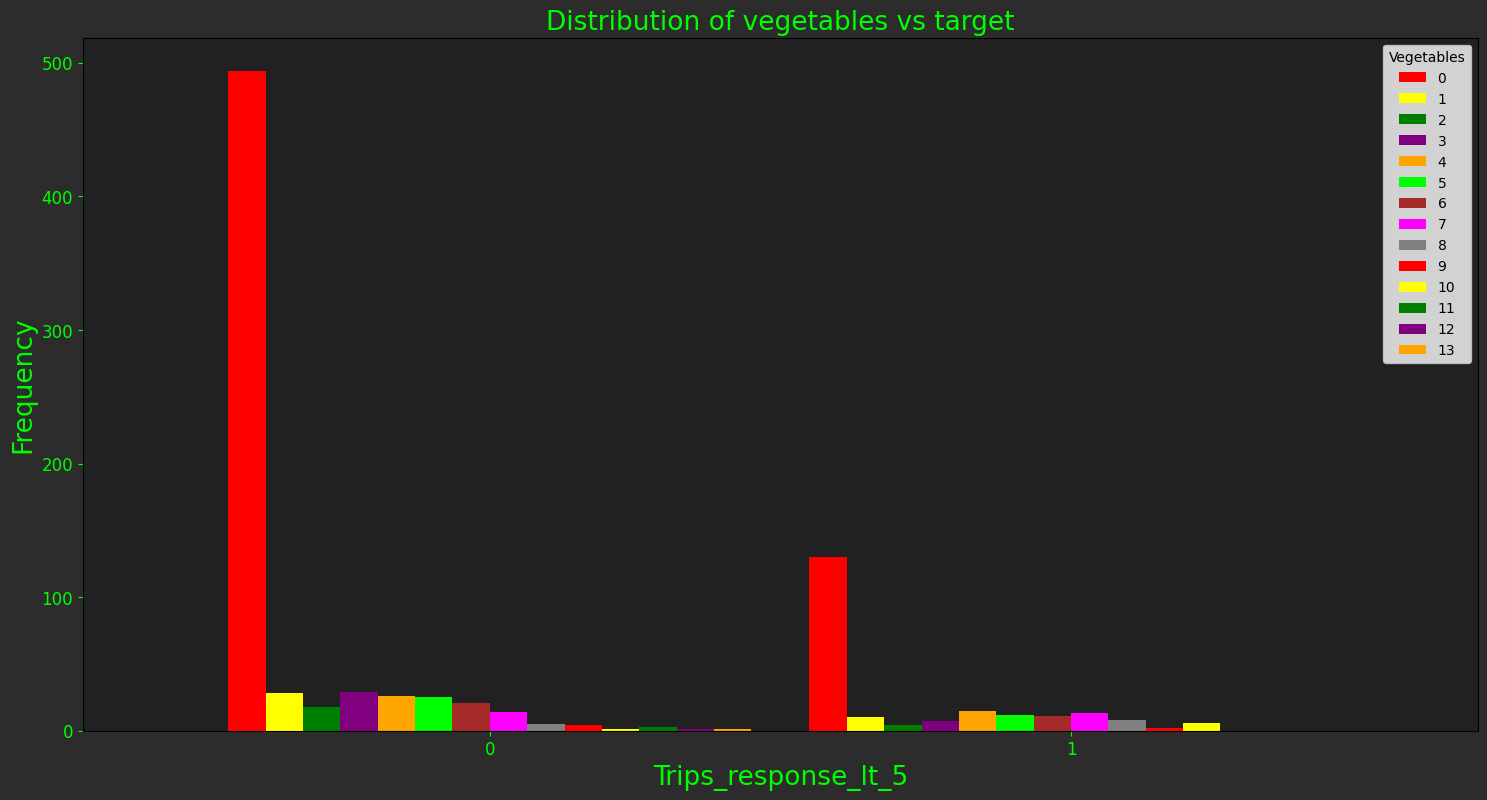

In [35]:
width_=0.9
# Plotting Drinks_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Vegetables_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                           ylabel='Frequency',
                           width=width_
                         )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of vegetables vs target", fontsize=19)
plt.show()

In [36]:
Fruit_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Fruit',
    values='Total_Price',
    aggfunc='count'
)
Fruit_vs_target.fillna(0)

Fruit                    0     1     2    3    4    5    7
Trips_response_lt_5                                       
0                    582.0  57.0  21.0  5.0  3.0  1.0  1.0
1                    179.0  20.0   9.0  8.0  1.0  1.0  0.0

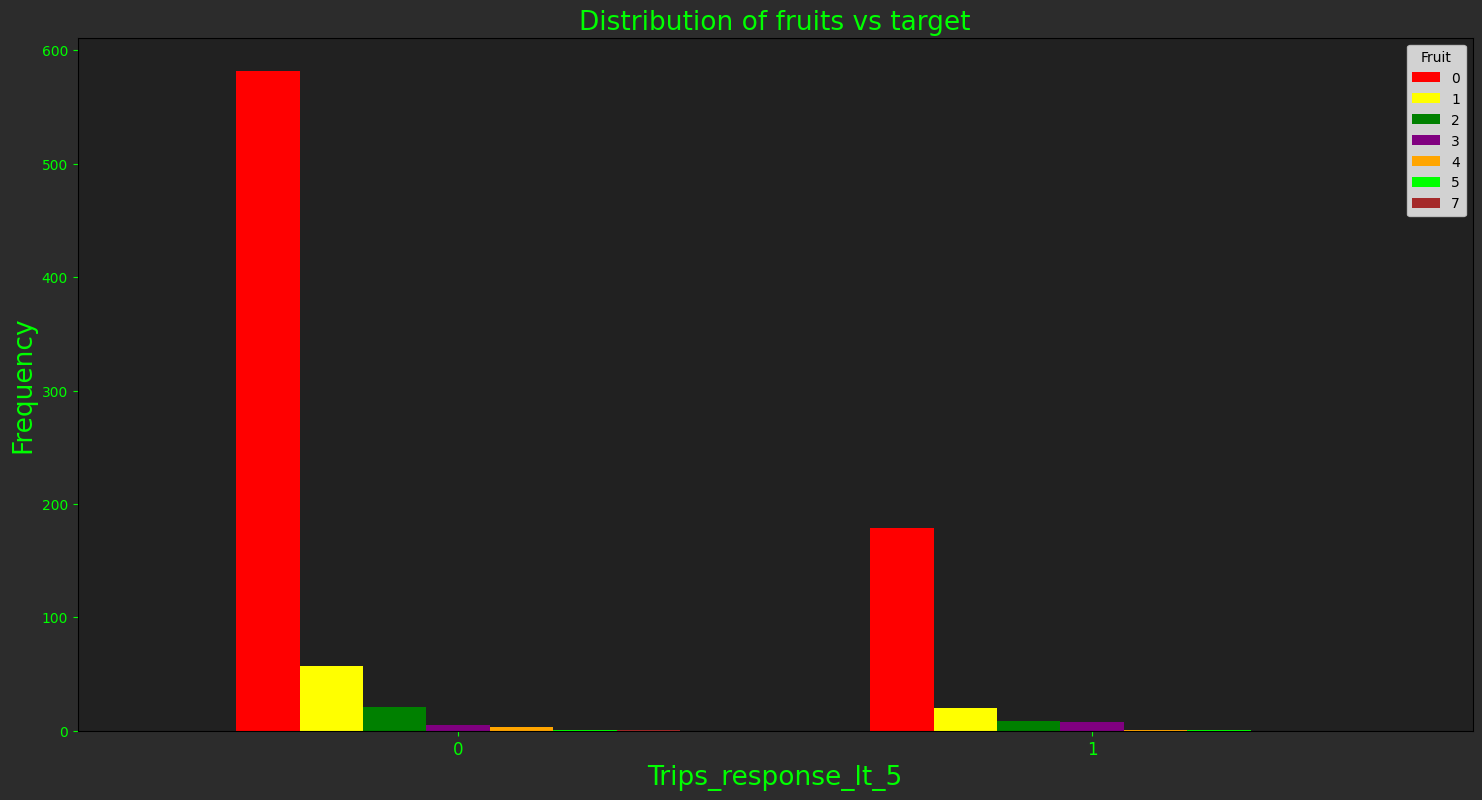

In [37]:
width_=0.7
# Plotting Fruit_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Fruit_vs_target.plot(ax=ax,
                       kind='bar',
                       color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                       ylabel='Frequency',
                       width=width_
                    )

plt.xticks(rotation=0, fontsize=12)
plt.xticks(fontsize=12)
plt.title("Distribution of fruits vs target", fontsize=19)
plt.show()

In [38]:
Cooking_base_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Cooking_base',
    values='Total_Price',
    aggfunc='count'
)
Cooking_base_vs_target.fillna(0)

Cooking_base             0     1    2     3    4
Trips_response_lt_5                             
0                    617.0  35.0  2.0  14.0  2.0
1                    195.0  16.0  2.0   5.0  0.0

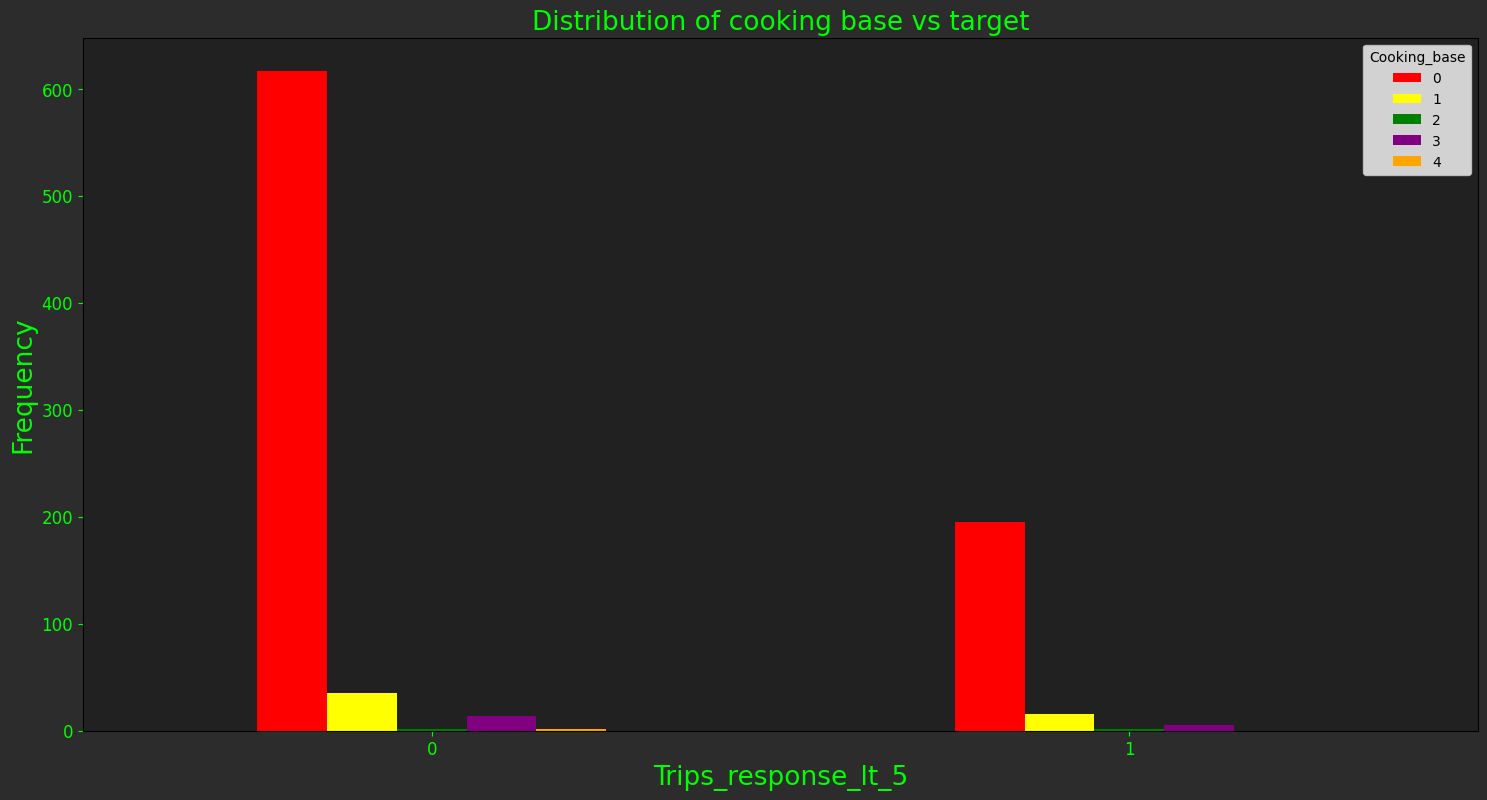

In [39]:
width_=0.5
# Plotting Cooking_base_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Cooking_base_vs_target.plot(ax=ax,
                               kind='bar',
                               color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                               ylabel='Frequency',
                               width=width_
                           )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of cooking base vs target", fontsize=19)
plt.show()

In [40]:
Dairy_produce_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Dairy_produce',
    values='Total_Price',
    aggfunc='count'
)
Dairy_produce_vs_target

Dairy_produce          0   1   2  3  4
Trips_response_lt_5                   
0                    559  78  31  1  1
1                    148  37  28  3  2

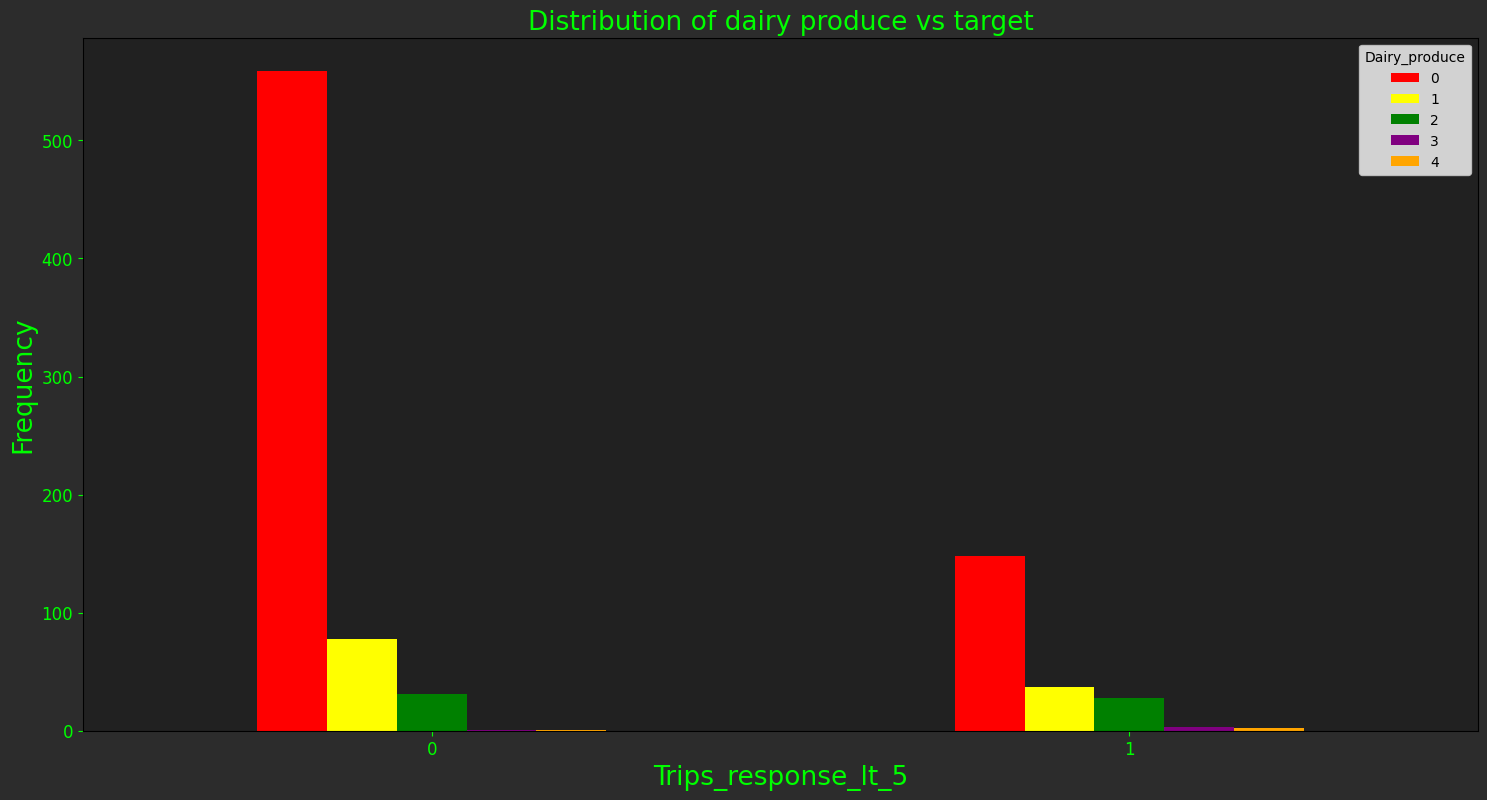

In [41]:
width_=0.5
# Plotting Dairy_produce_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Dairy_produce_vs_target.plot(ax=ax,
               kind='bar',
               color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
               ylabel='Frequency',
                             width=width_
               )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of dairy produce vs target", fontsize=19)
plt.show()

In [42]:
Seasoning_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Seasoning',
    values='Total_Price',
    aggfunc='count'
)
Seasoning_vs_target

Seasoning              0  1  2  3
Trips_response_lt_5              
0                    653  9  1  7
1                    207  7  2  2

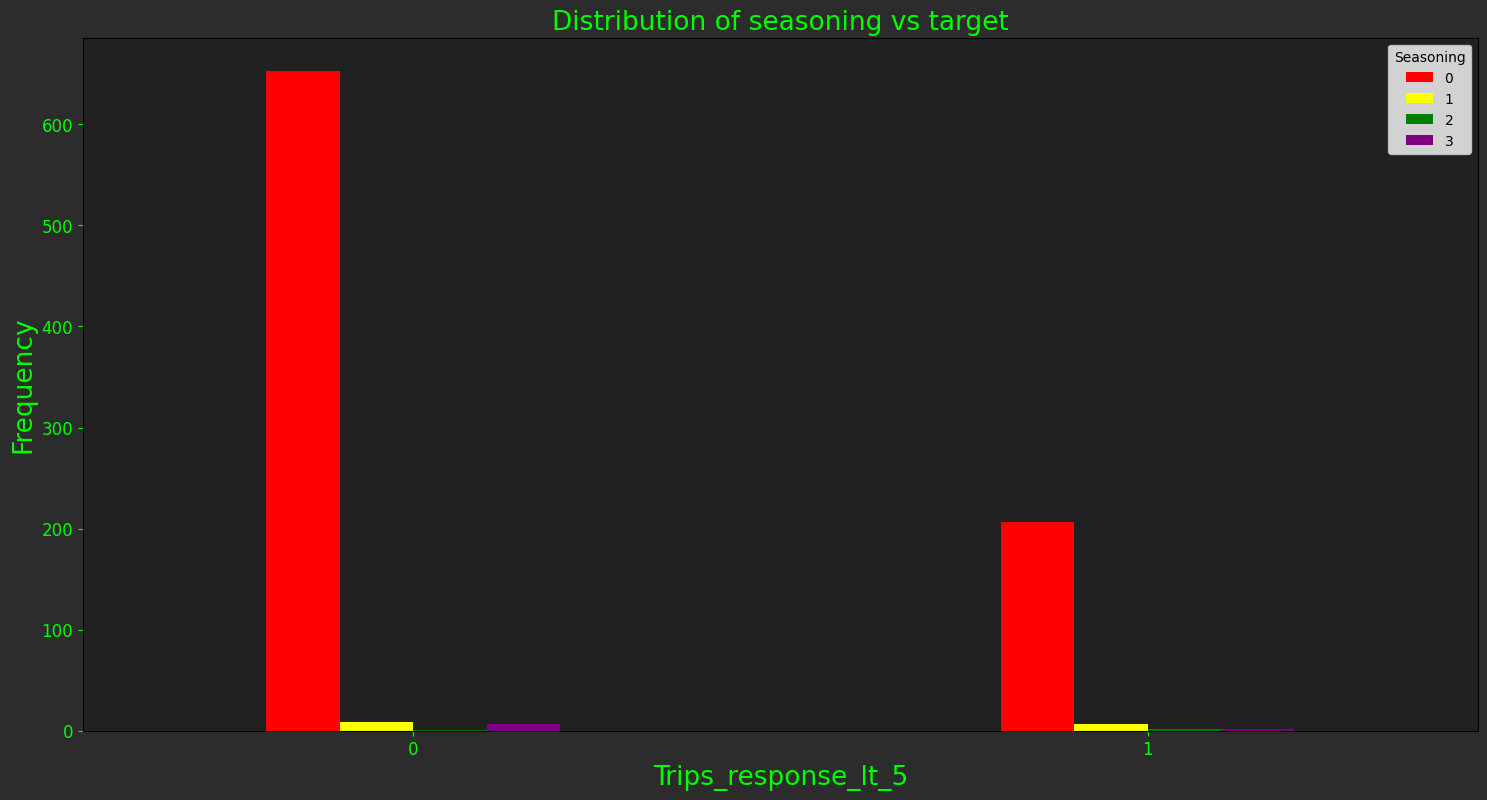

In [43]:
width_=0.4
# Plotting Seasoning_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Seasoning_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                           ylabel='Frequency',
                           width=width_
                        )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of seasoning vs target", fontsize=19)
plt.show()

In [44]:
Breakfast_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Breakfast',
    values='Total_Price',
    aggfunc='count'
)
Breakfast_vs_target

Breakfast              0   1  2  3  4  5
Trips_response_lt_5                     
0                    642  10  6  7  3  2
1                    185  15  7  2  4  5

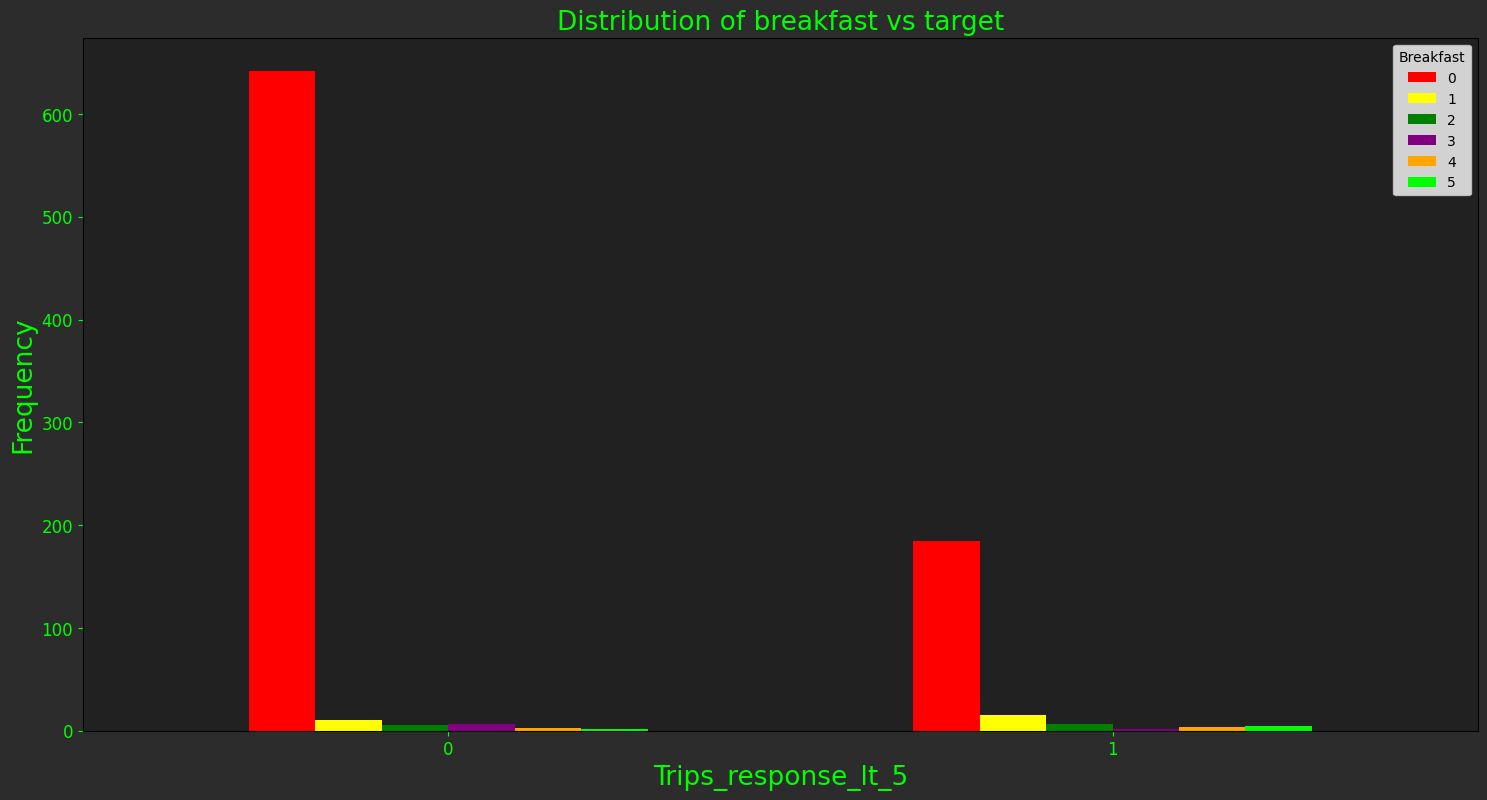

In [45]:
width_=0.6
# Plotting Breakfast_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Breakfast_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                           ylabel='Frequency',
                           width=width_
                        )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of breakfast vs target", fontsize=19)
plt.show()

In [46]:
Transport_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Transport',
    values='Total_Price',
    aggfunc='count'
)
Transport_vs_target.fillna(0)

Transport               0     1    11   19
Trips_response_lt_5                       
0                    643.0  24.0  2.0  1.0
1                    218.0   0.0  0.0  0.0

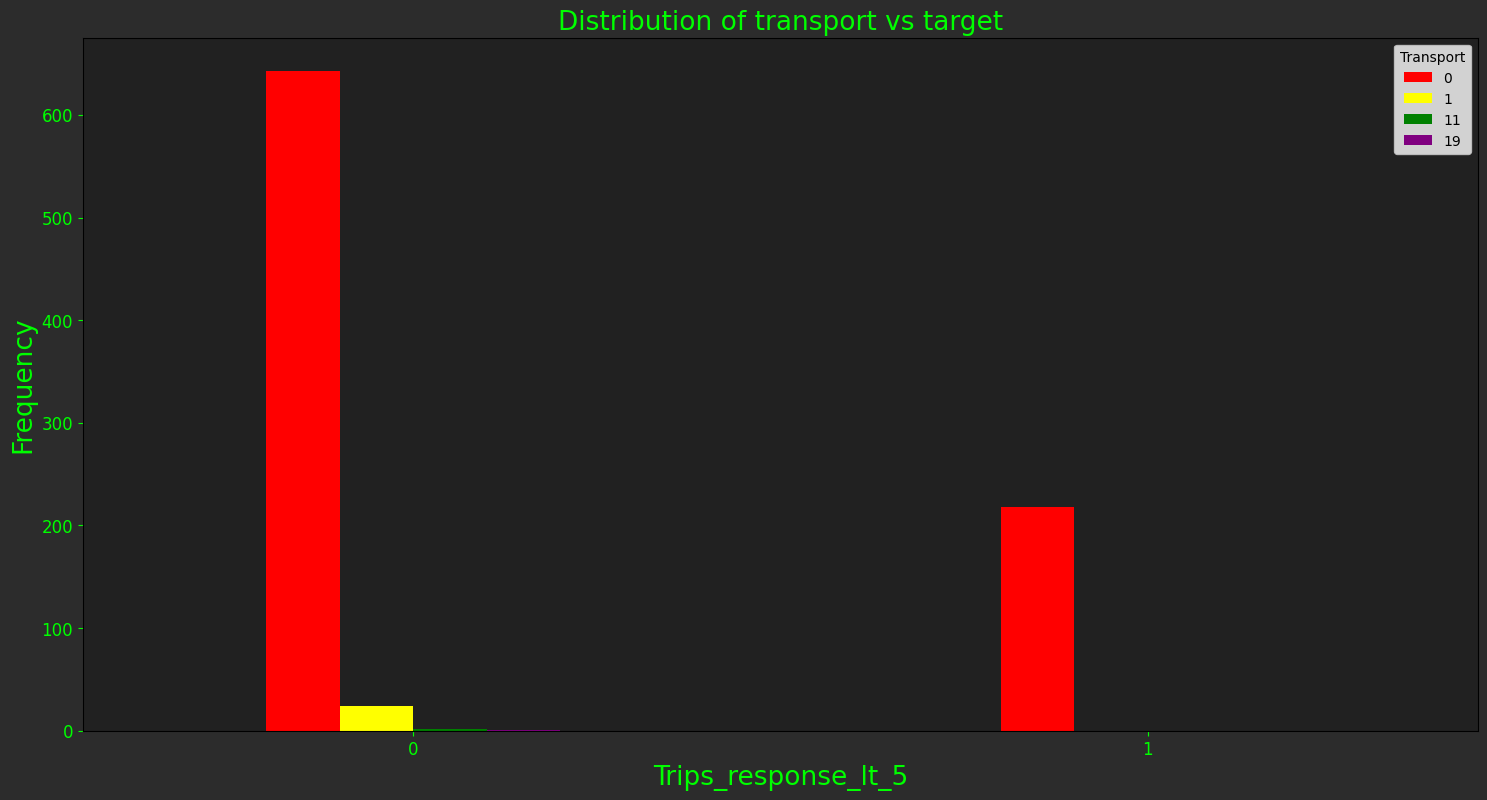

In [47]:
width_=0.4
# Plotting Transport_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Transport_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                           ylabel='Frequency',
                           width=width_
                        )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of transport vs target", fontsize=19)
plt.show()

In [48]:
DIY_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='DIY',
    values='Total_Price',
    aggfunc='count'
)
DIY_vs_target.fillna(0)

DIY                     0     1    2    3    4    7    11   30
Trips_response_lt_5                                           
0                    649.0  14.0  3.0  1.0  1.0  1.0  0.0  1.0
1                    208.0   7.0  1.0  1.0  0.0  0.0  1.0  0.0

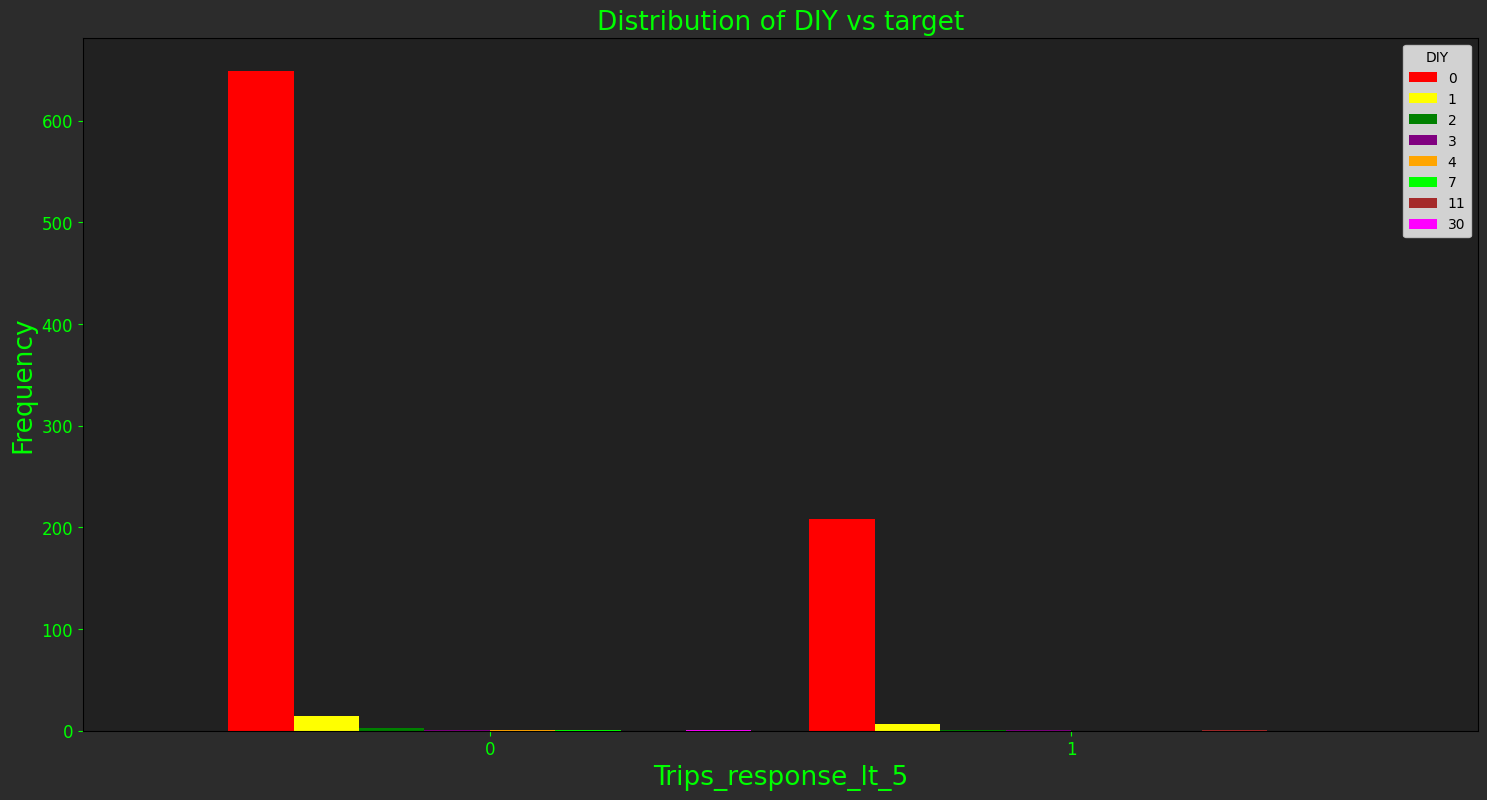

In [49]:
width_ = 0.9

# Plotting DIY_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

DIY_vs_target.plot(ax=ax,
                   kind='bar',
                   color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                   ylabel='Frequency',
                   width=width_
                  )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of DIY vs target", fontsize=19)
plt.show()

In [50]:
Electronics_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Electronics',
    values='Total_Price',
    aggfunc='count'
)
Electronics_vs_target.fillna(0)

Electronics              0     1    6
Trips_response_lt_5                  
0                    659.0  10.0  1.0
1                    213.0   5.0  0.0

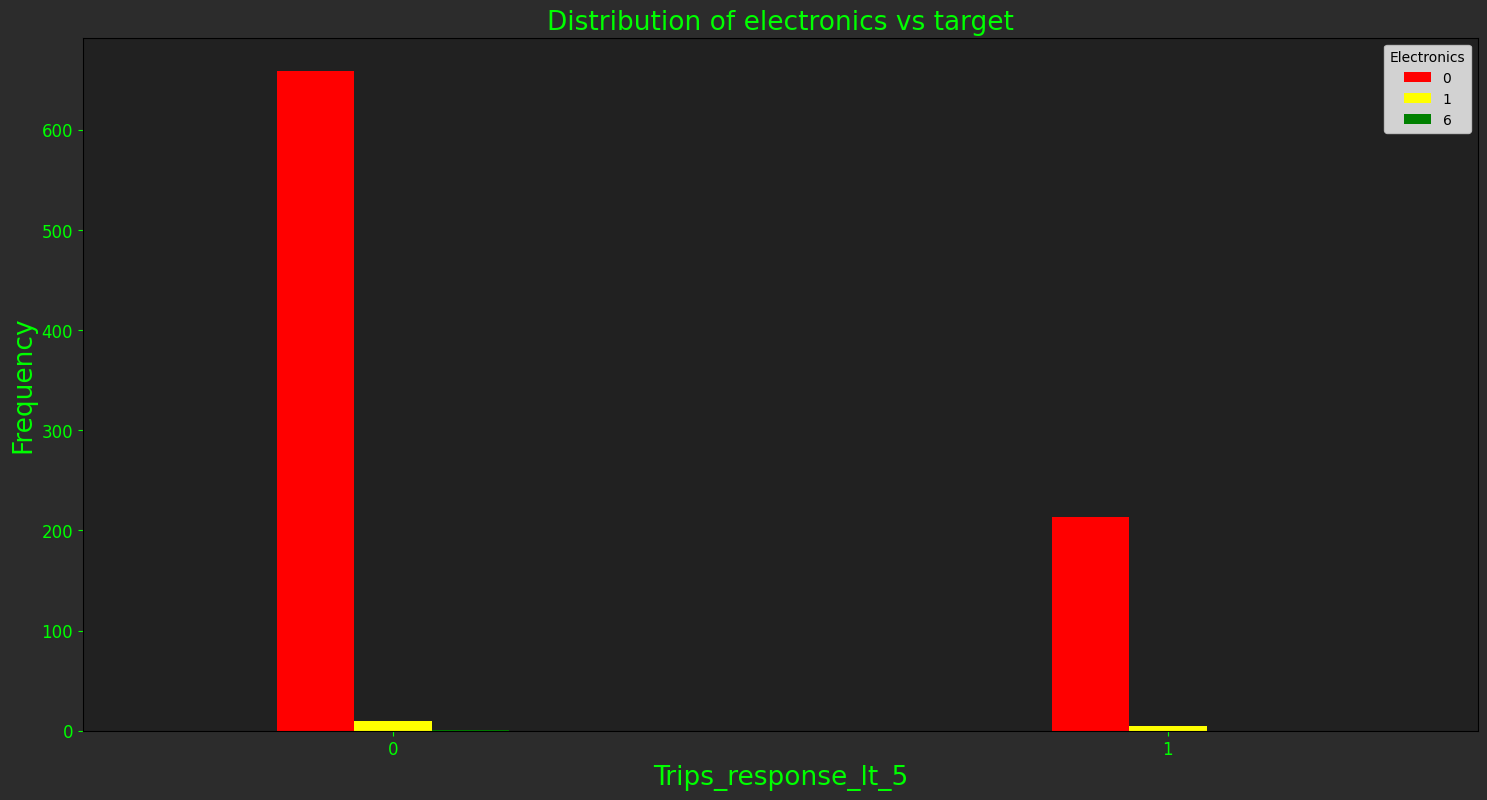

In [51]:
width_ = 0.3
# Plotting Electronics_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Electronics_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                           ylabel='Frequency',
                           width=width_
                          )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of electronics vs target", fontsize=19)
plt.show()

In [52]:
Education_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Education',
    values='Total_Price',
    aggfunc='count'
)
Education_vs_target.fillna(0)

Education                0     1    3    7
Trips_response_lt_5                       
0                    637.0  31.0  1.0  1.0
1                    209.0   9.0  0.0  0.0

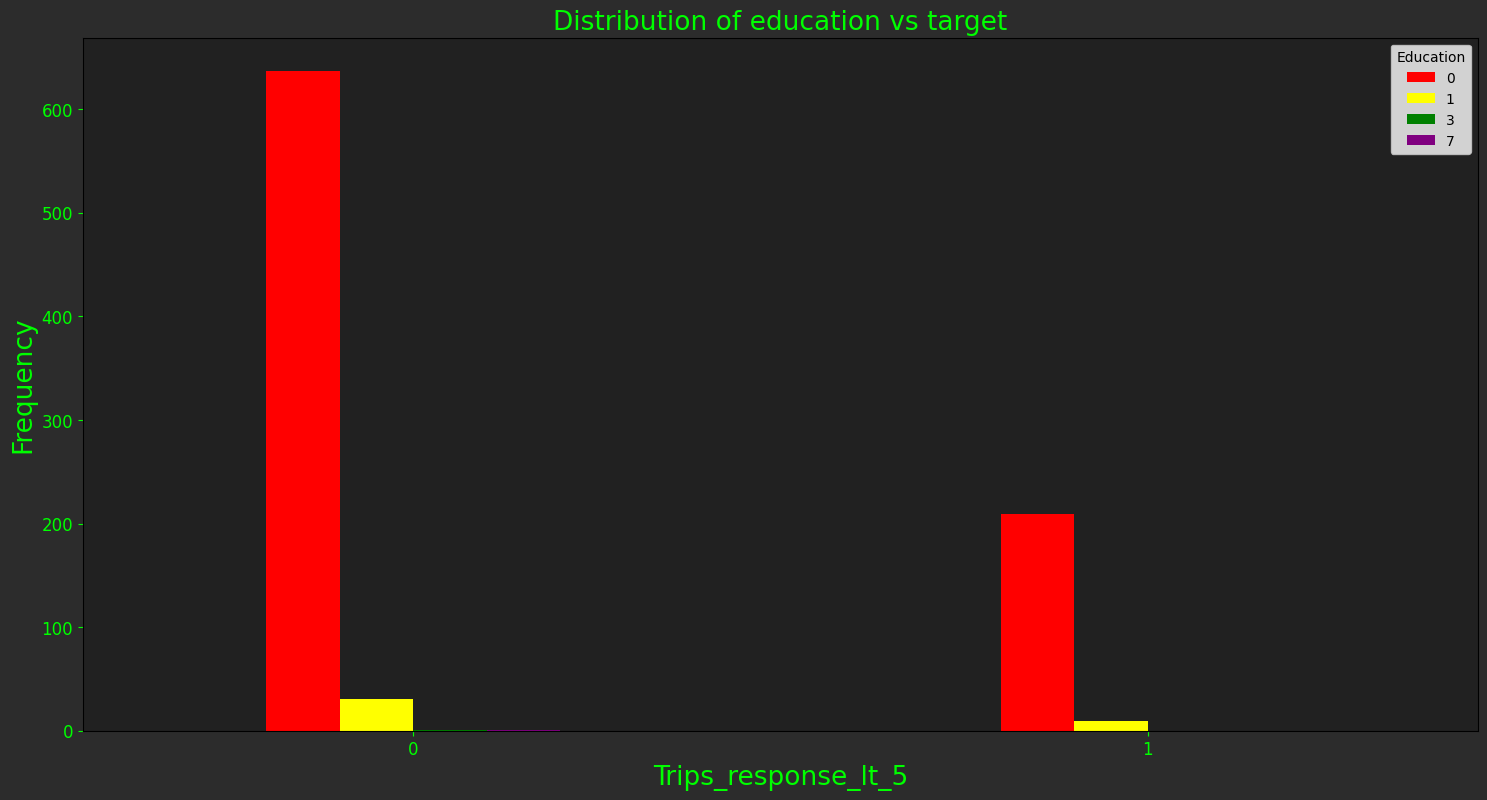

In [53]:
width_ = 0.4
# Plotting Education_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Education_vs_target.plot(ax=ax,
                            kind='bar',
                            color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                            ylabel='Frequency',
                            width=width_
                        )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of education vs target", fontsize=19)
plt.show()

In [54]:
Tech_and_services_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Tech_and_services',
    values='Total_Price',
    aggfunc='count'
)
Tech_and_services_vs_target.fillna(0)

Tech_and_services      0   1  2
Trips_response_lt_5            
0                    648  21  1
1                    200  17  1

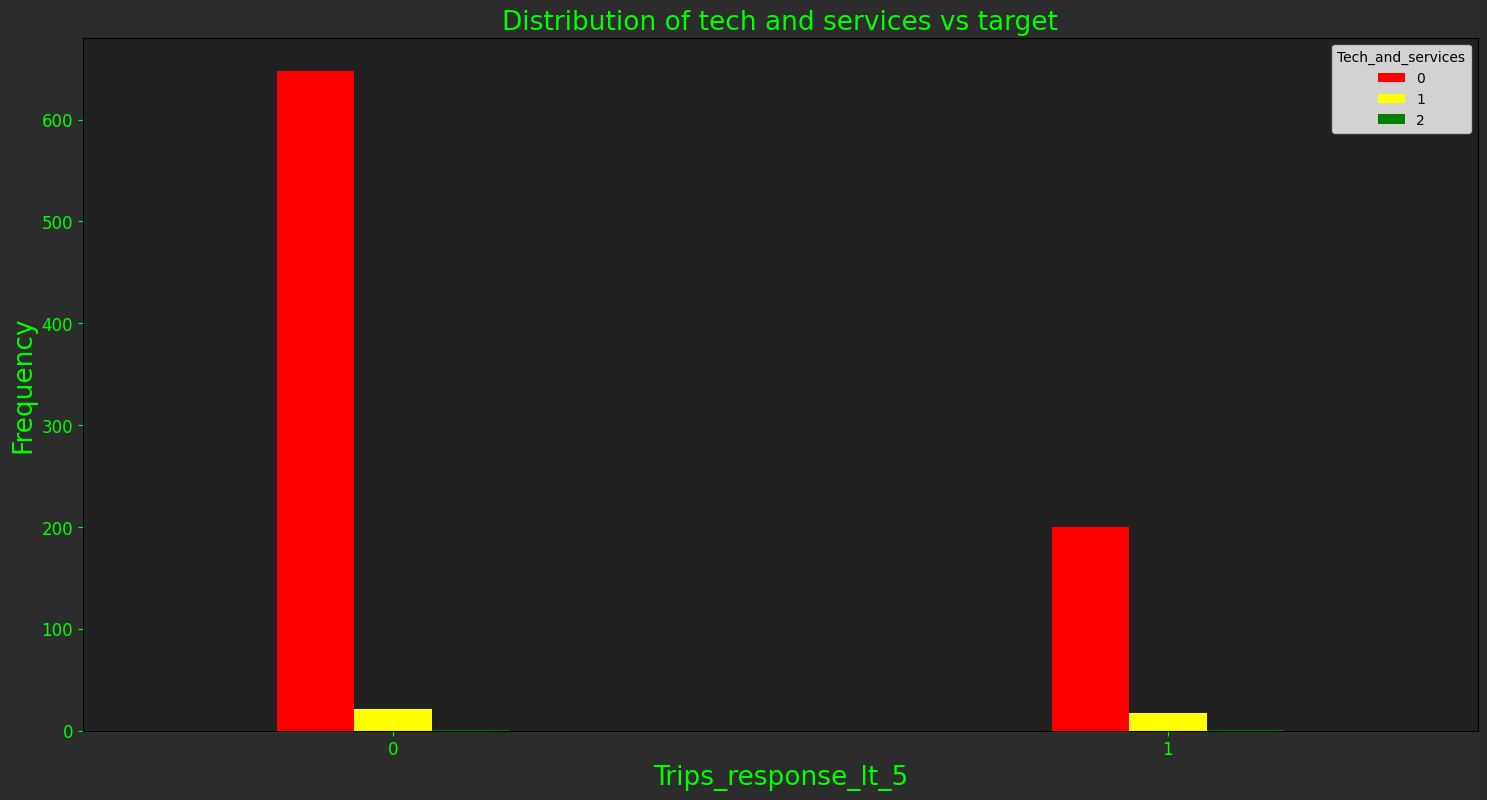

In [55]:
width_ = 0.3
# Plotting Tech_and_services_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Tech_and_services_vs_target.plot(ax=ax,
                                kind='bar',
                                color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                                ylabel='Frequency',
                                width=width_
                                )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of tech and services vs target", fontsize=19)
plt.show()

In [56]:
Cosmetics_and_selfcare_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Cosmetics_and_selfcare',
    values='Total_Price',
    aggfunc='count'
)
Cosmetics_and_selfcare_vs_target.fillna(0)

Cosmetics_and_selfcare      0     1     2     3    4    5    9
Trips_response_lt_5                                           
0                       573.0  59.0  16.0  17.0  3.0  1.0  1.0
1                       179.0  28.0   9.0   2.0  0.0  0.0  0.0

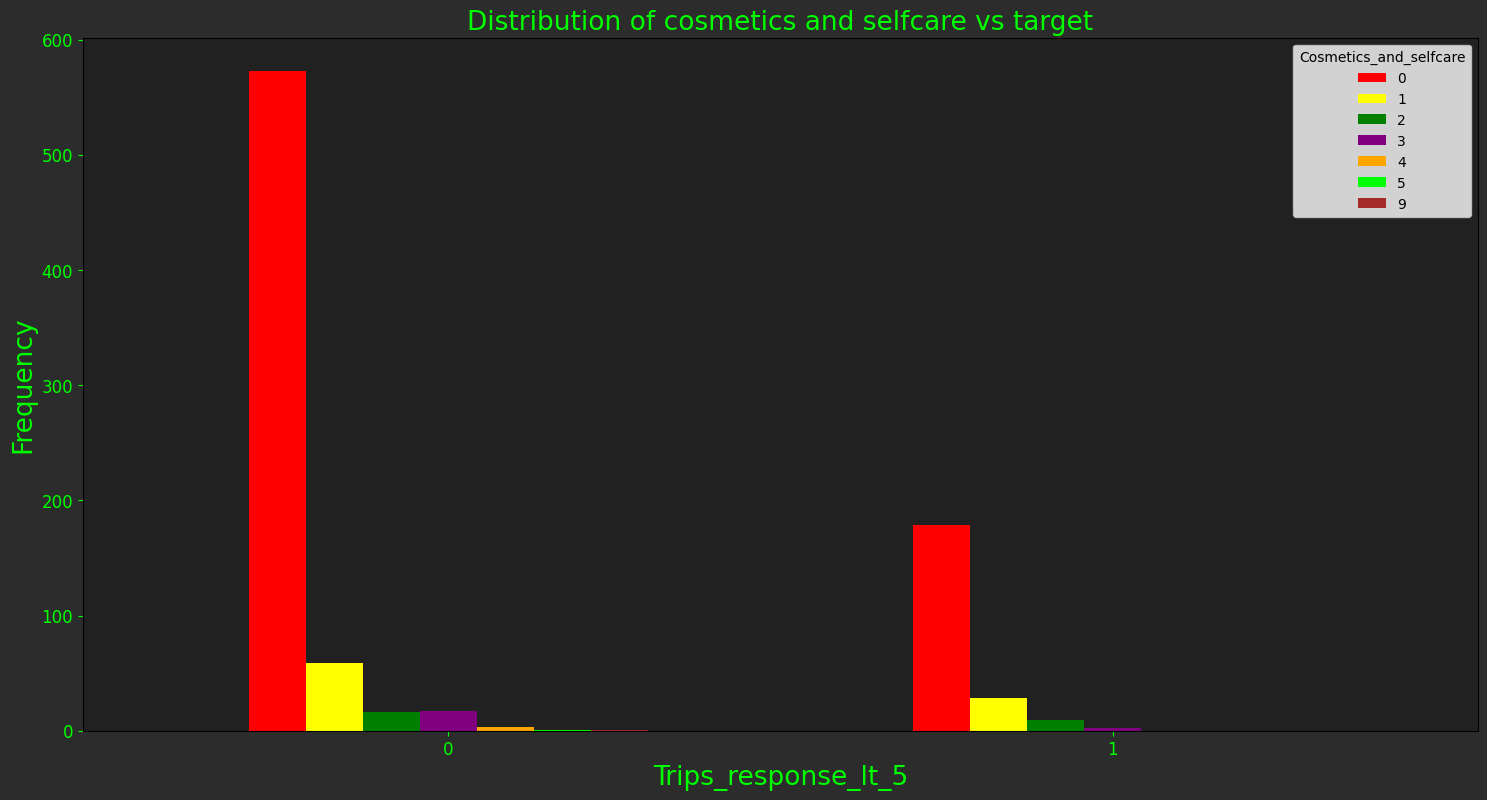

In [57]:
width_ = 0.6
# Plotting Cosmetics_and_selfcare_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Cosmetics_and_selfcare_vs_target.plot(ax=ax,
                            kind='bar',
                            color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                            ylabel='Frequency',
                            width=width_
                                     )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of cosmetics and selfcare vs target", fontsize=19)
plt.show()

In [58]:
Clothes_and_shoes_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Clothes_and_shoes',
    values='Total_Price',
    aggfunc='count'
)
Clothes_and_shoes_vs_target.fillna(0)

Clothes_and_shoes        0     1    2    3    4
Trips_response_lt_5                            
0                    648.0  13.0  5.0  3.0  1.0
1                    214.0   3.0  1.0  0.0  0.0

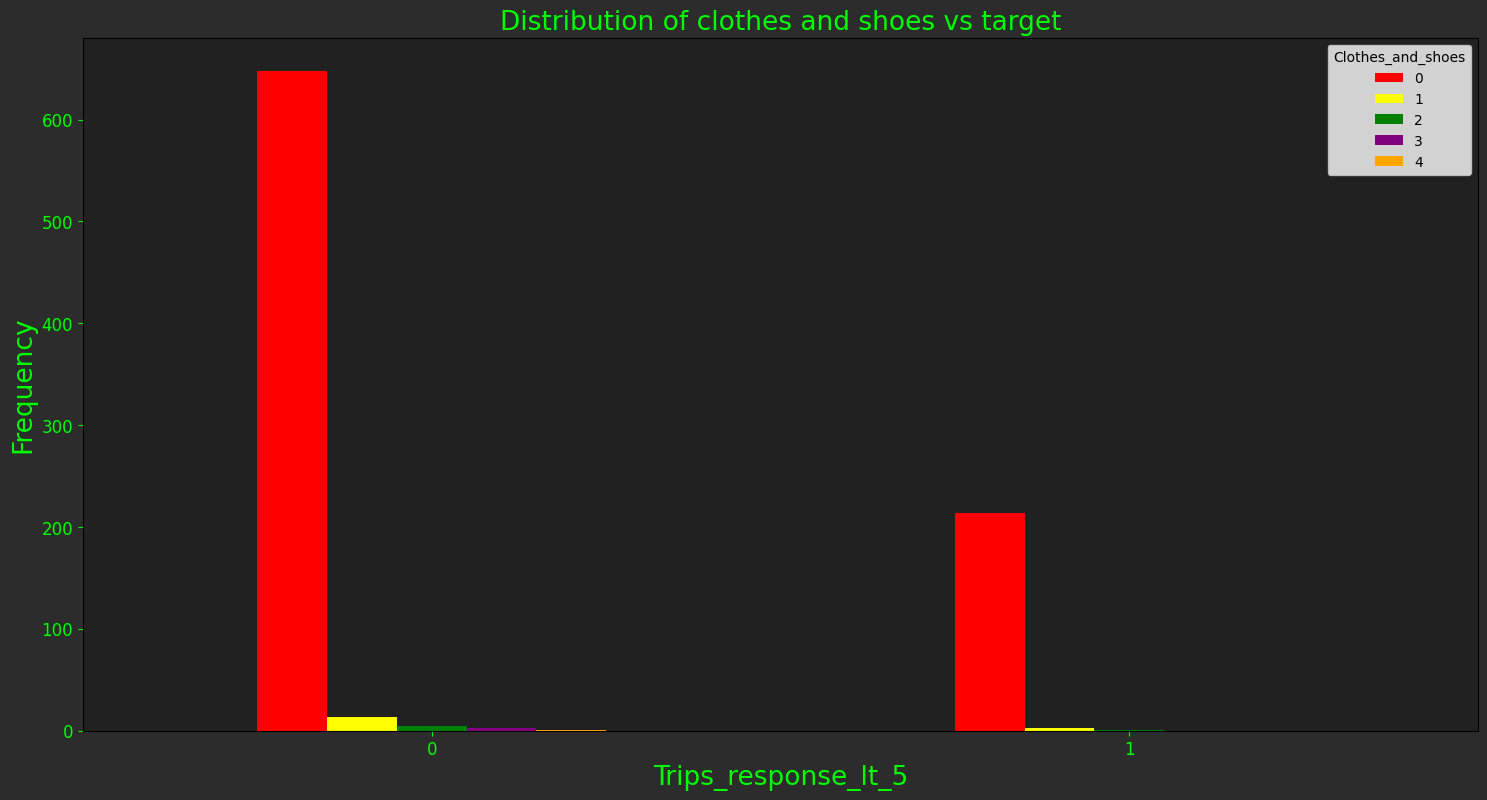

In [59]:
width_ = 0.5
# Plotting Clothes_and_shoes_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Clothes_and_shoes_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                           ylabel='Frequency',
                           width=width_
                                )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of clothes and shoes vs target", fontsize=19)

plt.show()

In [60]:
House_and_kitchen_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='House_and_kitchen',
    values='Total_Price',
    aggfunc='count'
)
House_and_kitchen_vs_target.fillna(0)

House_and_kitchen       0     1    2    3    10
Trips_response_lt_5                            
0                    638.0  25.0  5.0  1.0  1.0
1                    210.0   7.0  1.0  0.0  0.0

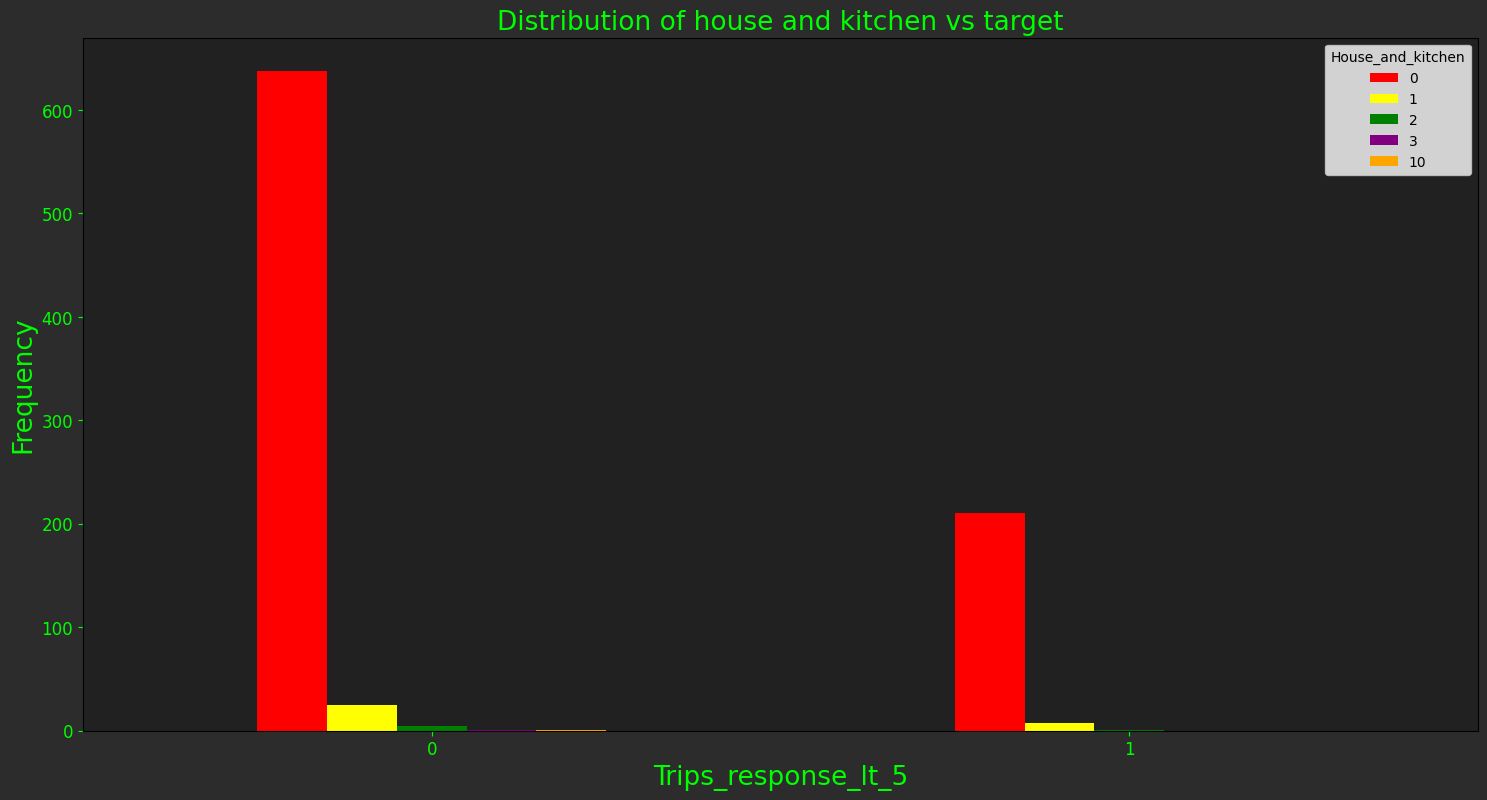

In [61]:
width_ = 0.5
# Plotting House_and_kitchen_vs_target
# figure background
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

House_and_kitchen_vs_target.plot(ax=ax,
                           kind='bar',
                           color=['red','yellow','green','purple','orange','lime','brown','magenta','grey'],
                           ylabel='Frequency',
                           width=width_ 
                                )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of house and kitchen vs target", fontsize=19)
plt.show()

<h1 style="color: green;">Exploring categorical features</h1>

In [62]:
cat_feats

['Venue', 'Payment_Type', 'Card_Source', 'Week_day_name', 'Part_of_day']

<h3 style="color: green;">Frequency distributions of categorical features</h3>

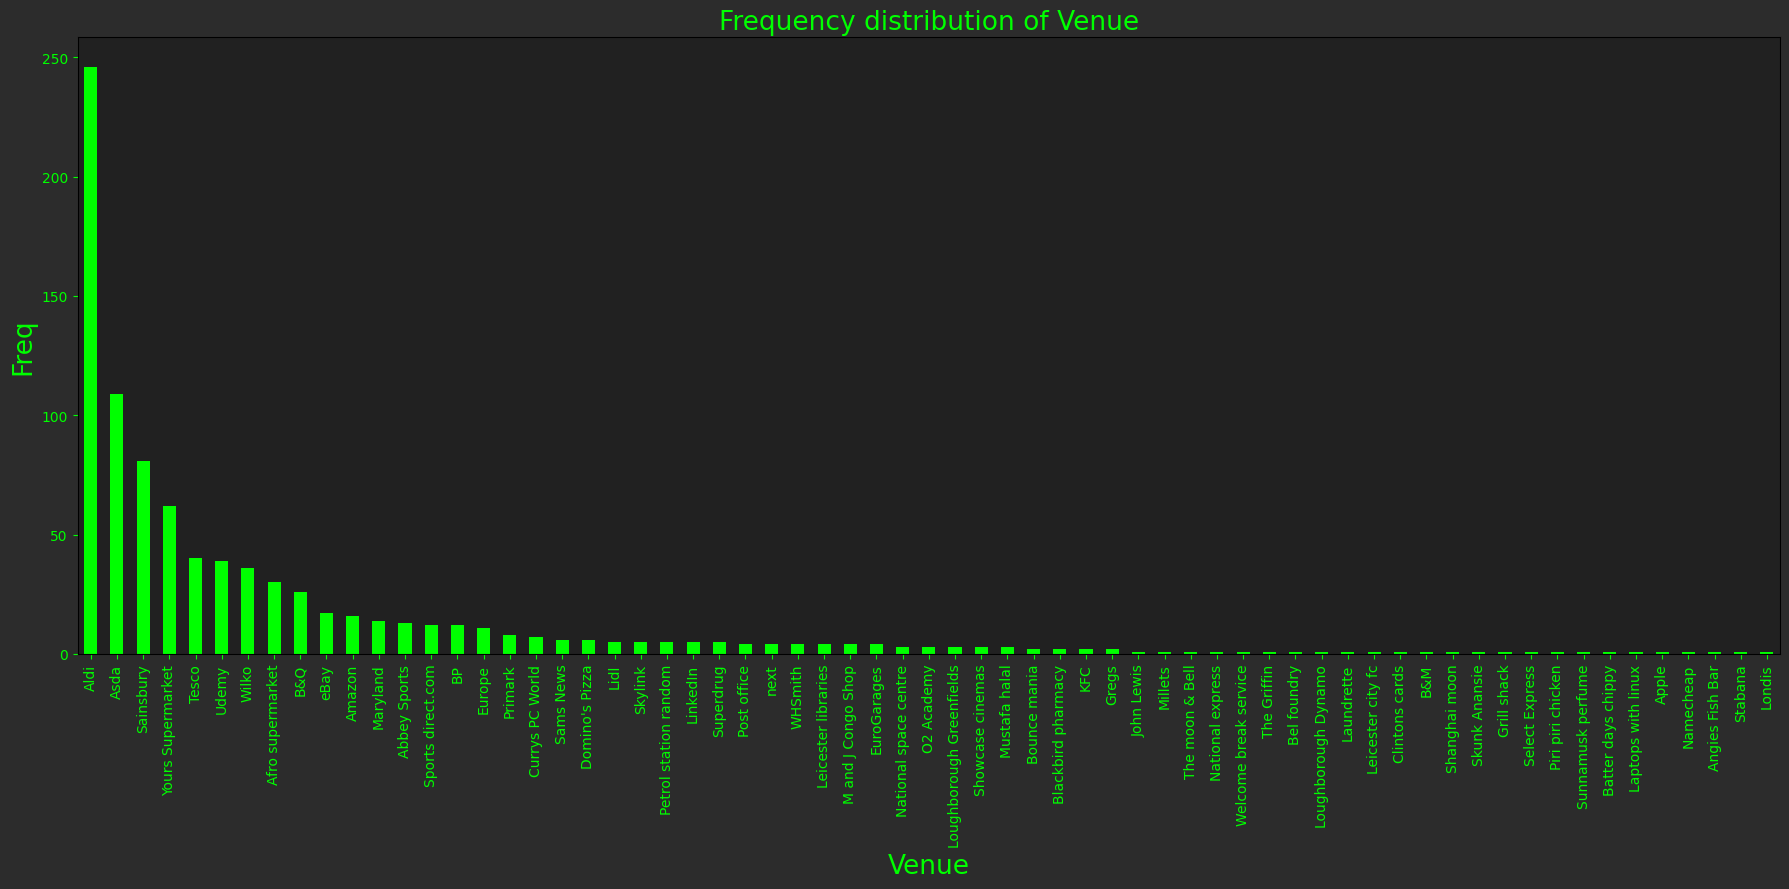

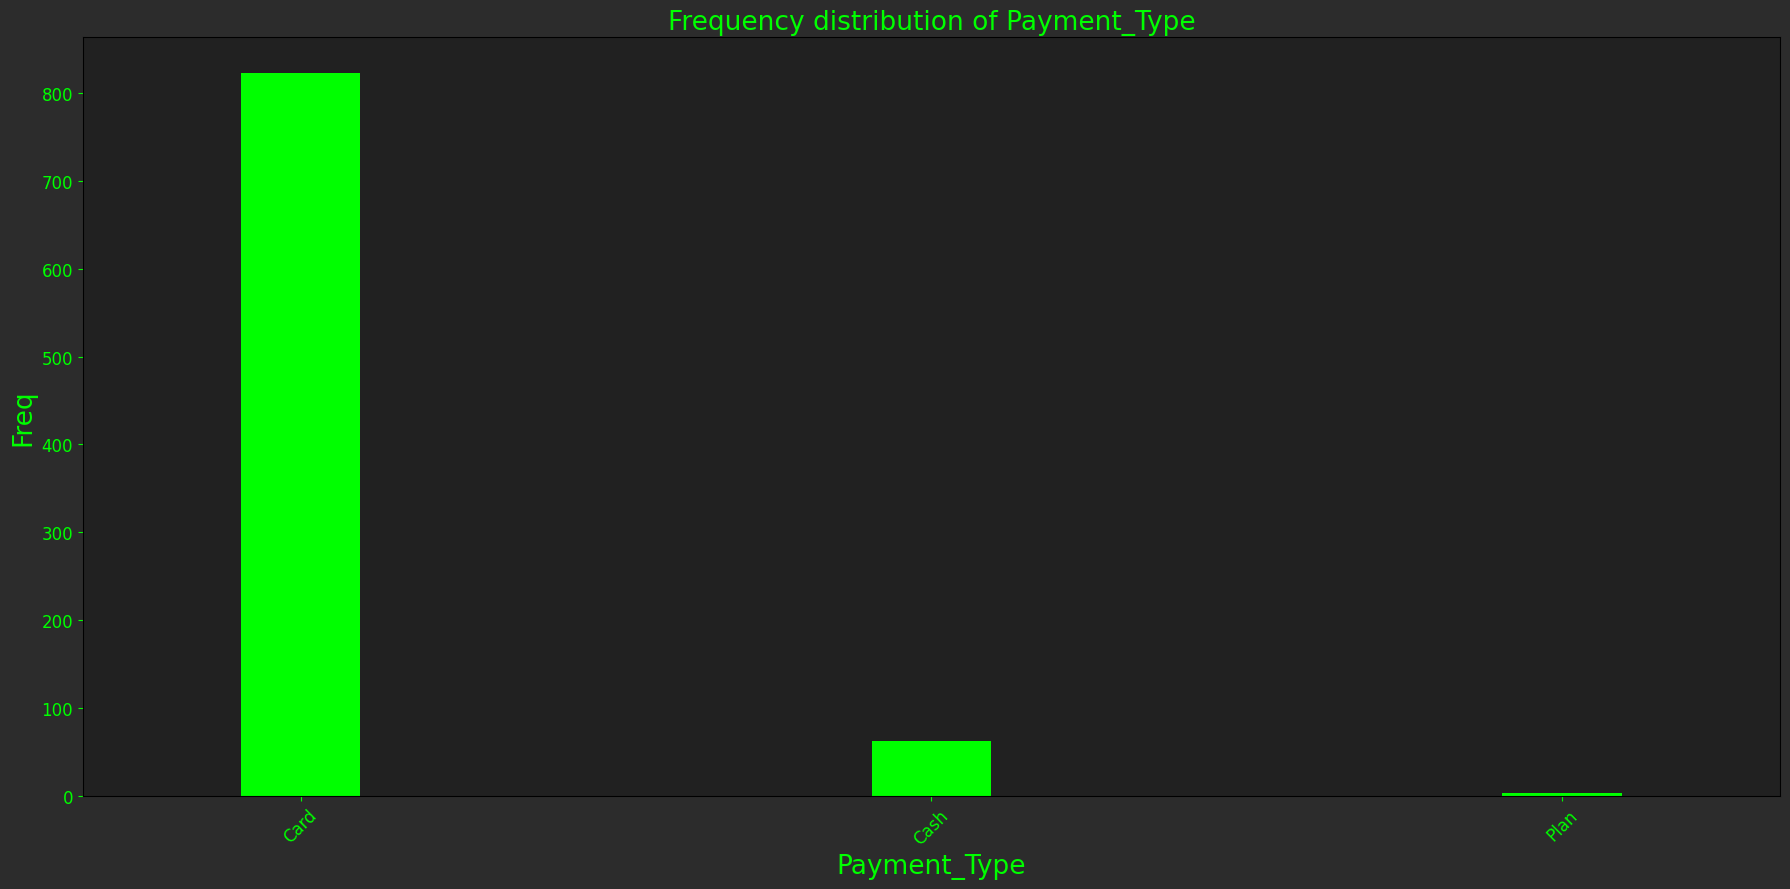

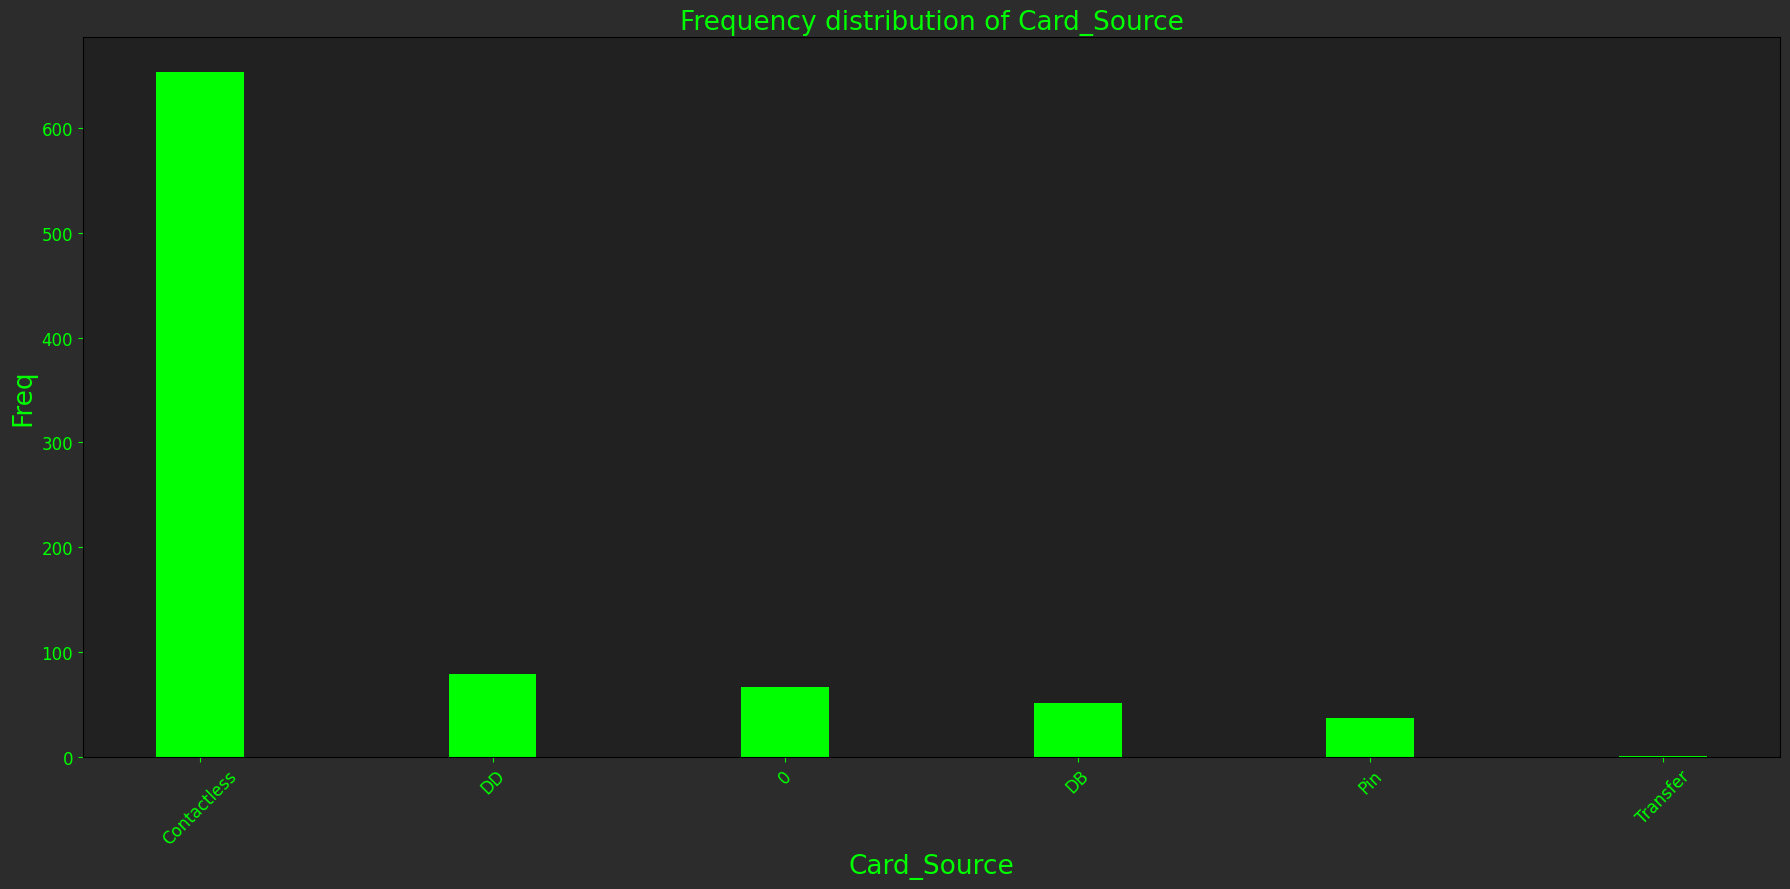

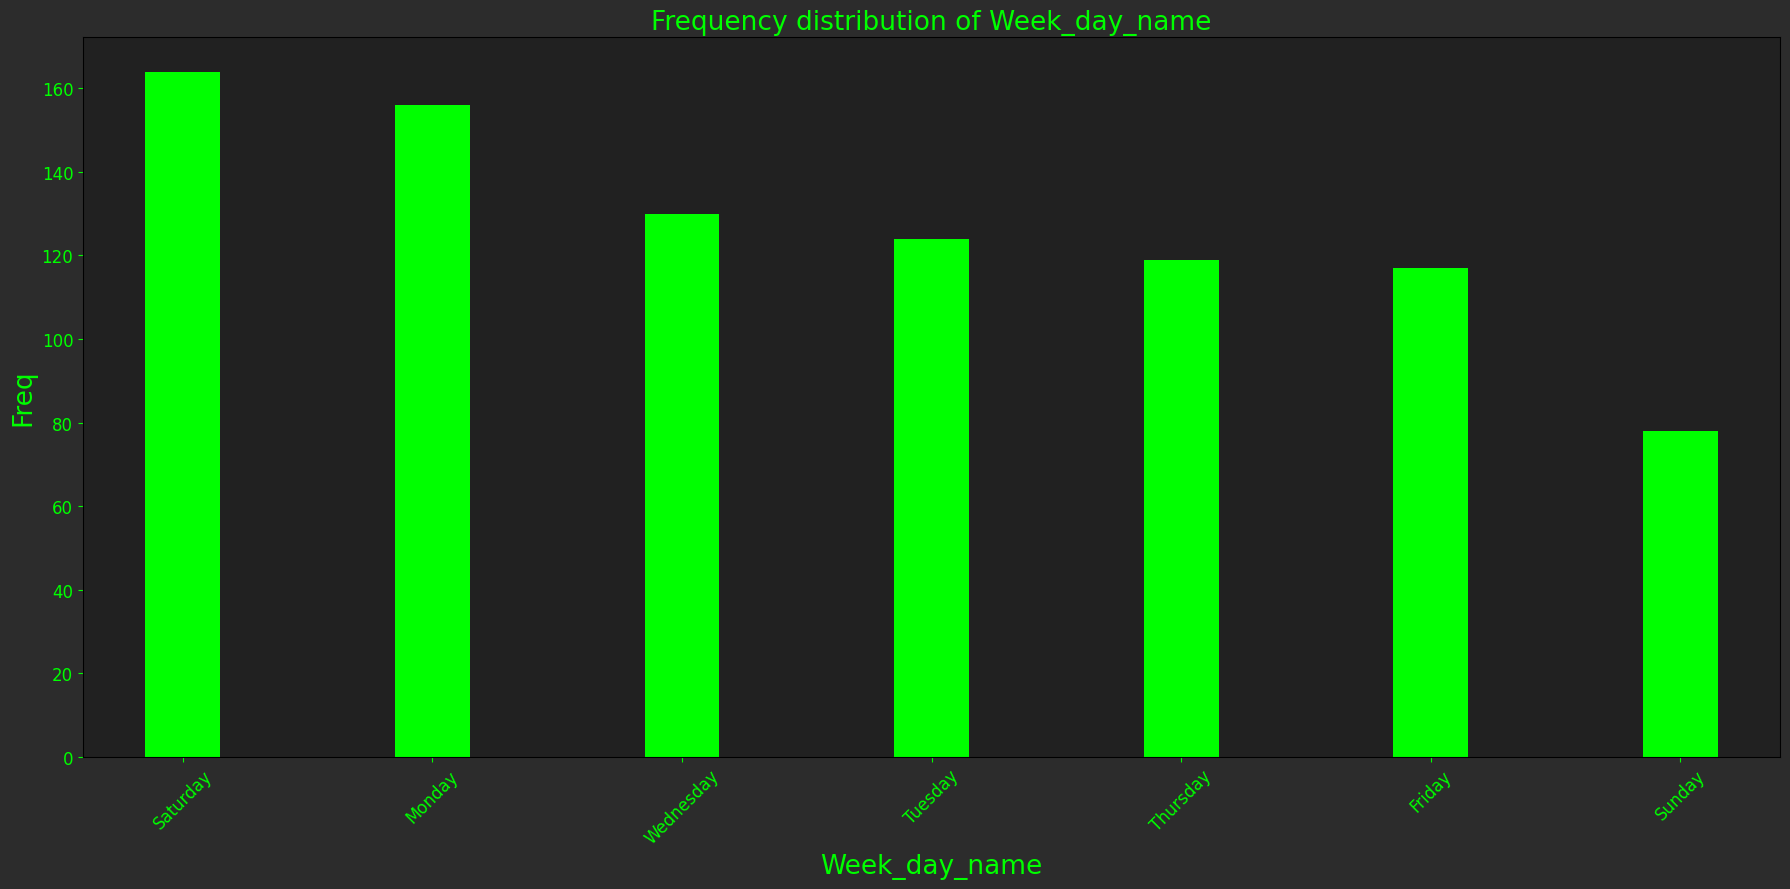

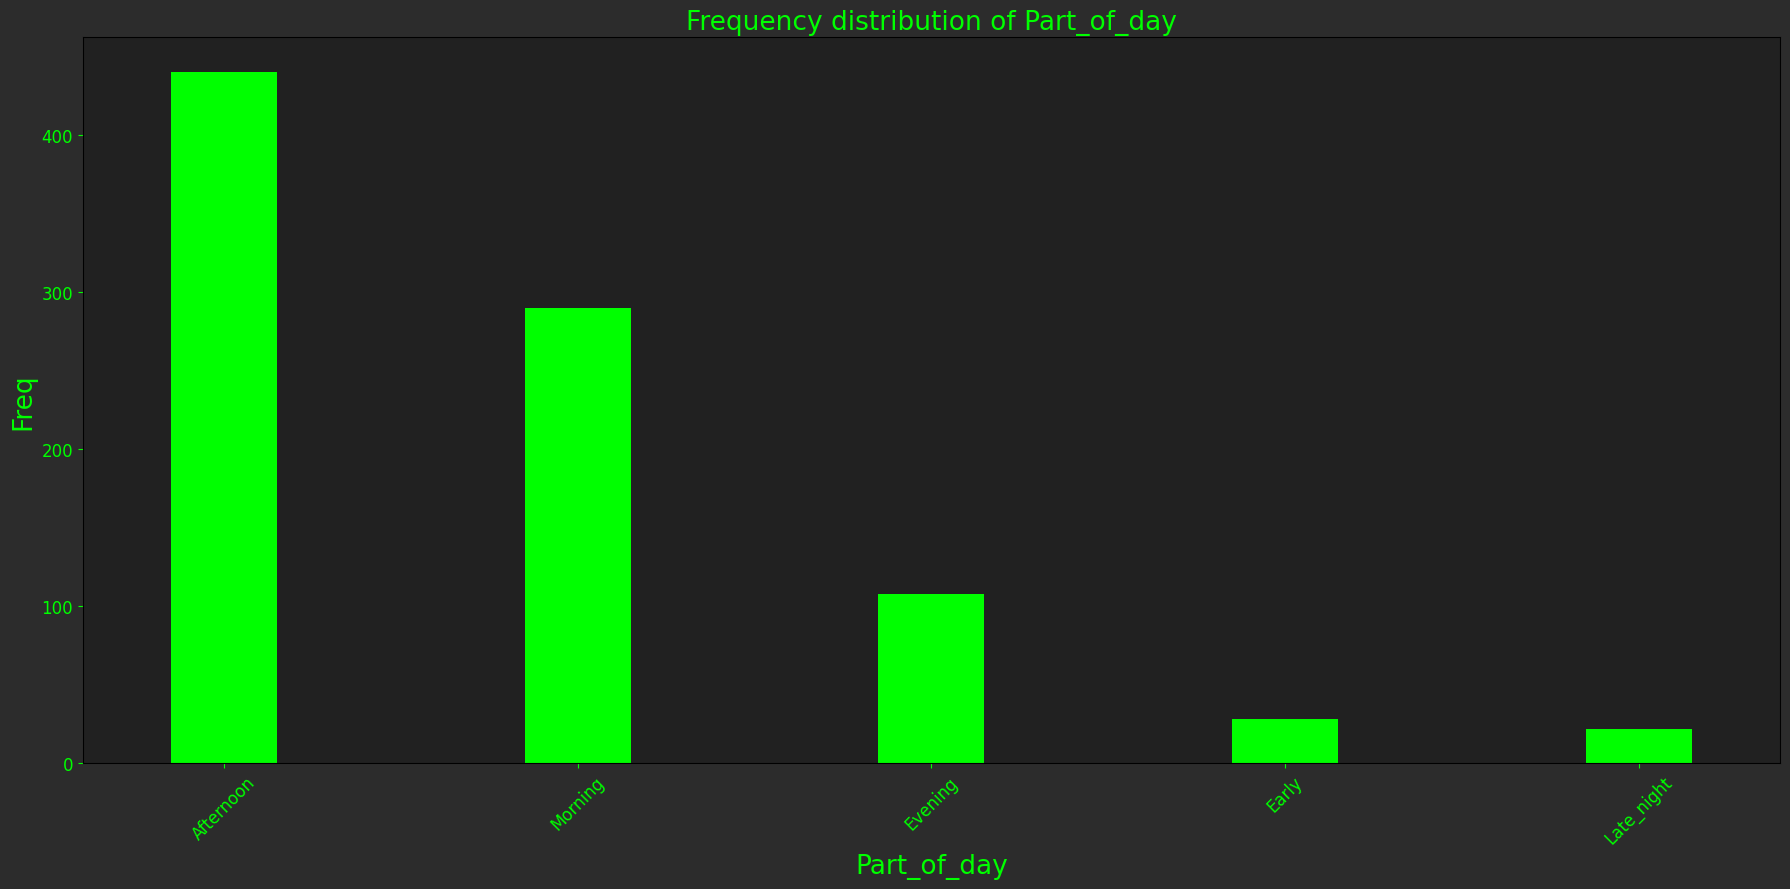

In [78]:
for var in cat_feats:
    fig = plt.figure(figsize=(18,9))
    fig.patch.set_facecolor('#212121')
    fig.patch.set_alpha(0.95)

    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('#212121')
    ax.patch.set_alpha(1.0)
    ax.yaxis.label.set_color('lime')
    ax.yaxis.label.set_size(19)
    ax.xaxis.label.set_color('lime')
    ax.xaxis.label.set_size(19)
    ax.title.set_color('lime')
    ax.tick_params(colors='lime', which='both')

    if var == "Venue":

        fig = raw0[var].value_counts().plot(ax=ax, kind='bar',color='lime')
        fig.set_ylabel('Freq')
        fig.set_title(f'Frequency distribution of {var}', fontsize=19)
        fig.set_xlabel(var)
        plt.tight_layout()
        plt.show()

    elif var == "Payment_Type":
        width_=0.19

        fig = raw0[var].value_counts().plot(ax=ax, kind='bar',color='lime', width=width_)
        fig.set_ylabel('Freq')
        fig.set_title(f'Frequency distribution of {var}', fontsize=19)
        fig.set_xlabel(var)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()

        plt.show()

    else:
        width_=0.3

        fig = raw0[var].value_counts().plot(ax=ax, kind='bar',color='lime', width=width_)
        fig.set_ylabel('Freq')
        fig.set_title(f'Frequency distribution of {var}', fontsize=19)
        fig.set_xlabel(var)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()

        plt.show()

<h1 style="color: green;">Exploring Relationships between the target and categorical features</h1>

In [64]:
# Checking total expenditure by Venue
Expenditure_by_venue = pd.pivot_table(
    data=raw0,
    index='Venue',
    values='Total_Price',
    aggfunc='count'
)
Expenditure_by_venue['Total_Price'].nlargest(30).sort_values(ascending=False)

Venue
Aldi                     246
Asda                     109
Sainsbury                 81
Yours Supermarket         62
Tesco                     40
Udemy                     39
Wilko                     36
Afro supermarket          30
B&Q                       26
eBay                      17
Amazon                    16
Maryland                  14
Abbey Sports              13
BP                        12
Sports direct.com         12
Europe                    11
Primark                    8
Currys PC World            7
Domino's Pizza             6
Sams News                  6
Lidl                       5
LinkedIn                   5
Petrol station random      5
Skylink                    5
Superdrug                  5
EuroGarages                4
Leicester libraries        4
M and J Congo Shop         4
Post office                4
WHSmith                    4
Name: Total_Price, dtype: int64

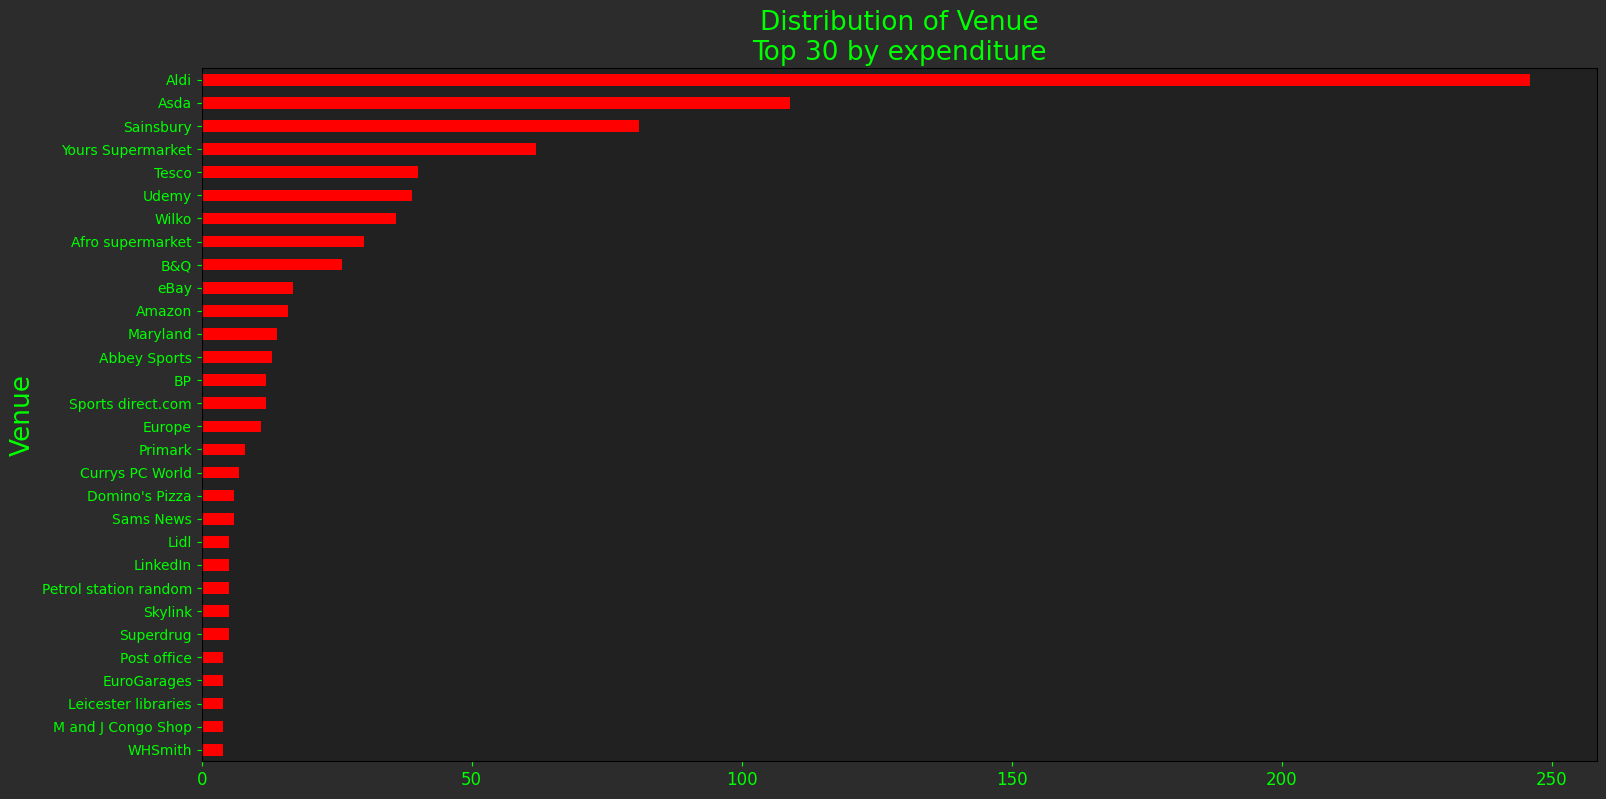

In [65]:
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.yaxis.label.set_size(19)
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Expenditure_by_venue['Total_Price'].nlargest(30).sort_values().plot(
                                         kind='barh', 
                                         color='red')
plt.title('Distribution of Venue\nTop 30 by expenditure', fontsize=19)
plt.xticks(fontsize=12)
plt.show()

In [66]:
# Checking distribution of Venue vs target
Expenditure_by_venue_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Venue',
    values='Total_Price',
    aggfunc='count'
)

Expenditure_by_venue_vs_target = Expenditure_by_venue_vs_target.T.fillna(0)

Expenditure_by_venue_vs_target = \
Expenditure_by_venue_vs_target.sort_values(by=Expenditure_by_venue_vs_target.columns[0], ascending=False)[:29]
Expenditure_by_venue_vs_target


Trips_response_lt_5        0     1
Venue                             
Aldi                   174.0  72.0
Sainsbury               67.0  14.0
Asda                    63.0  46.0
Yours Supermarket       56.0   6.0
Wilko                   29.0   7.0
Udemy                   27.0  12.0
Afro supermarket        26.0   4.0
Tesco                   25.0  15.0
B&Q                     20.0   6.0
BP                      12.0   0.0
Maryland                12.0   2.0
Sports direct.com       11.0   1.0
Amazon                  11.0   5.0
Primark                  8.0   0.0
Europe                   7.0   4.0
Sams News                6.0   0.0
eBay                     6.0  11.0
Abbey Sports             6.0   7.0
Petrol station random    5.0   0.0
Superdrug                5.0   0.0
Skylink                  5.0   0.0
Domino's Pizza           5.0   1.0
Currys PC World          5.0   2.0
Lidl                     5.0   0.0
Post office              4.0   0.0
WHSmith                  4.0   0.0
LinkedIn                 4.0   1.0
M and J Congo Shop       4.0   0.0
Leicester libraries      4.0   0.0

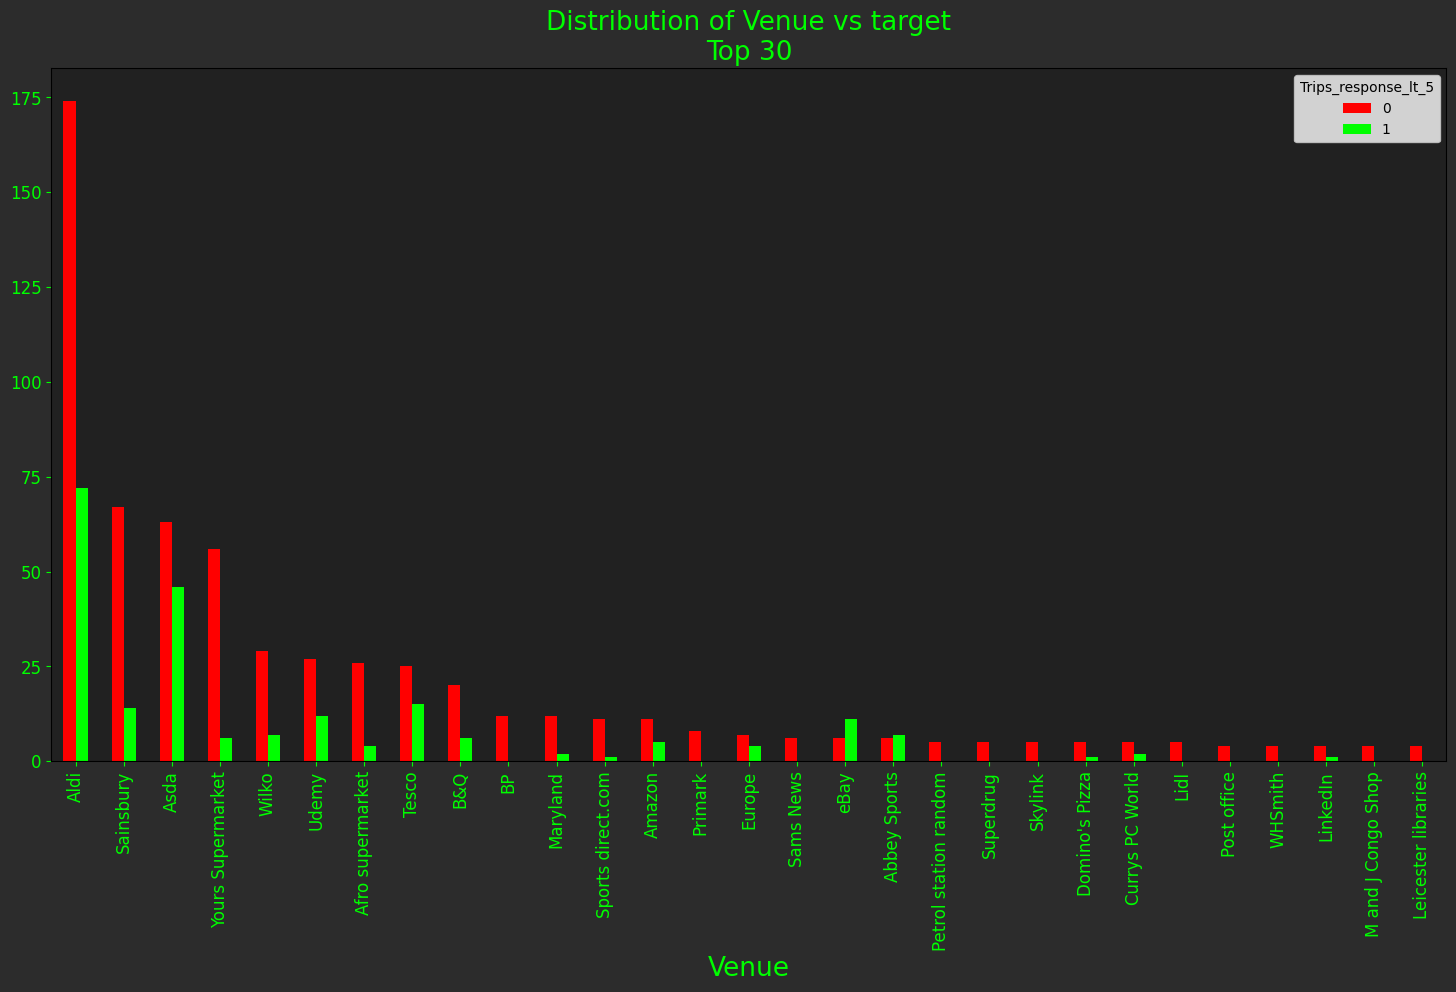

In [67]:
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

Expenditure_by_venue_vs_target.plot(ax=ax,
                                     kind='bar', 
                                     color=['red','lime']
                                   )

plt.title('Distribution of Venue vs target\nTop 30', fontsize=19)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [68]:
# Checking frequency of Payment_Type vs target
freq_by_Payment_Type_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Payment_Type',
    values='Total_Price',
    aggfunc='count'
)
freq_by_Payment_Type_vs_target

Payment_Type         Card  Cash  Plan
Trips_response_lt_5                  
0                     616    53     1
1                     206    10     2

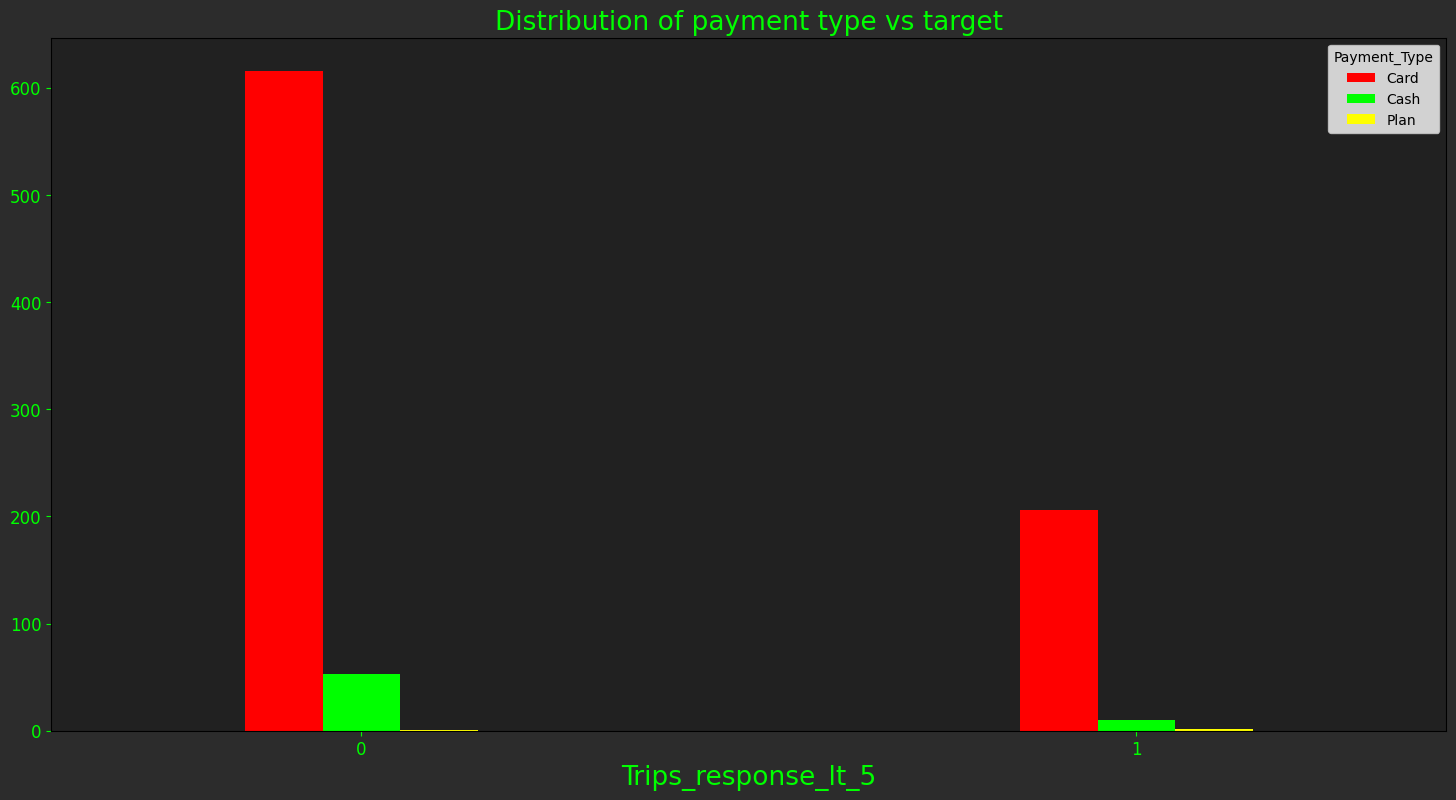

In [69]:
width_=0.3
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

freq_by_Payment_Type_vs_target.plot(ax=ax,
                                kind='bar', 
                                color=['red','lime','yellow'],
                                width=width_
                                   )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of payment type vs target', fontsize=19)
plt.show()

In [70]:
# Checking frequency of Payment_Type vs target
freq_by_Card_Source_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Payment_Type',
    values='Total_Price',
    aggfunc='count'
)
freq_by_Card_Source_vs_target

Payment_Type         Card  Cash  Plan
Trips_response_lt_5                  
0                     616    53     1
1                     206    10     2

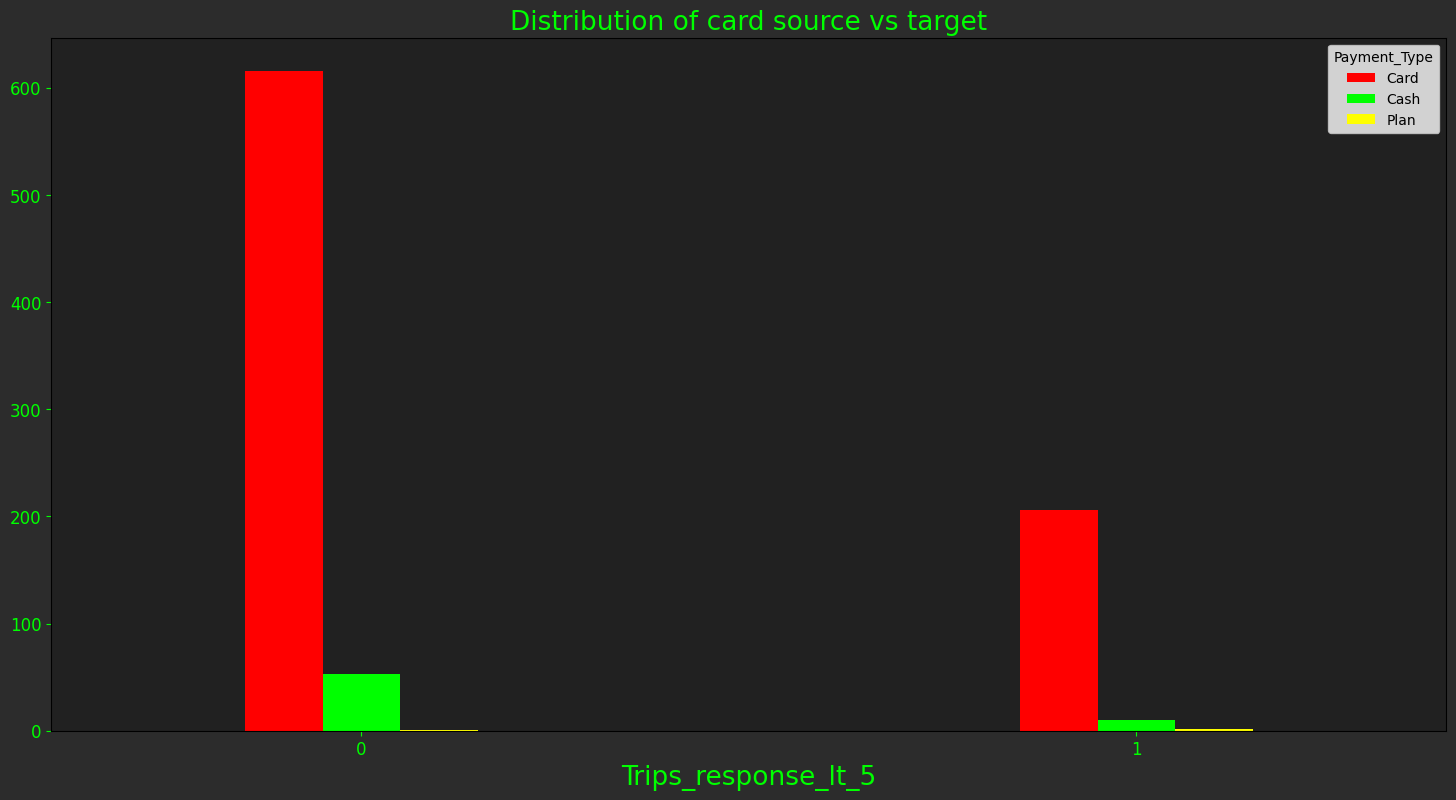

In [71]:
width_ = 0.3
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

freq_by_Card_Source_vs_target.plot(ax=ax,
                            kind='bar', 
                            color=['red','lime','yellow'],
                            width=width_
                                  )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of card source vs target', fontsize=19)
plt.show()

In [72]:
# Checking frequency of Week_day_name vs target
freq_by_Week_day_name_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Week_day_name',
    values='Total_Price',
    aggfunc='count'
)
freq_by_Week_day_name_vs_target

Week_day_name        Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
Trips_response_lt_5                                                        
0                        92     118       127      60        94       91   
1                        25      38        37      18        25       33   

Week_day_name        Wednesday  
Trips_response_lt_5             
0                           88  
1                           42

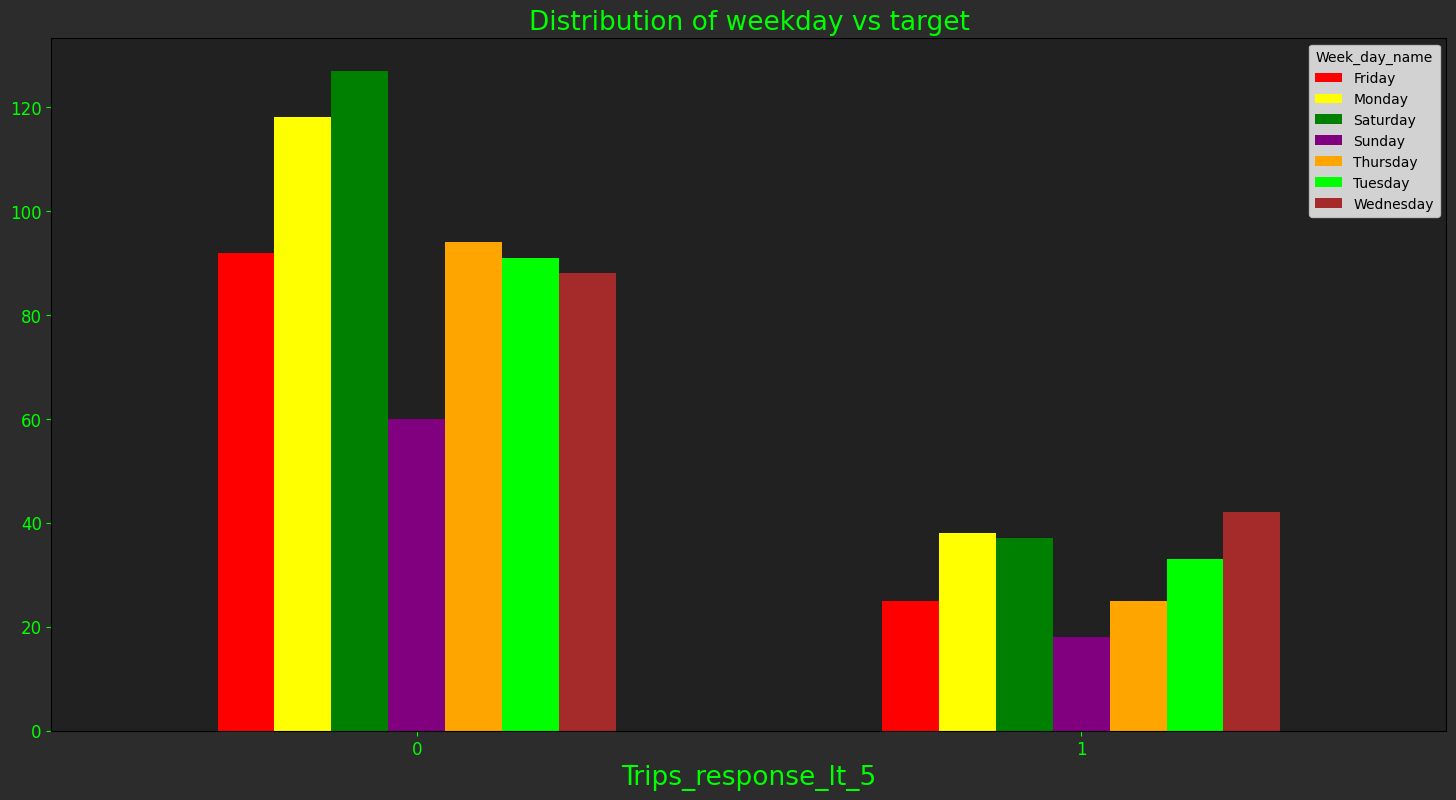

In [73]:
width_=0.6
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

freq_by_Week_day_name_vs_target.plot(ax=ax,
                                 kind='bar', 
                                 color=['red','yellow','green','purple','orange',
                                        'lime','brown'],
                                 width=width_
                                    )

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of weekday vs target', fontsize=19)
plt.show()

In [74]:
# Checking frequency of Week_day_name vs target
freq_by_Part_of_day_vs_target = pd.pivot_table(
    data=raw0,
    index='Trips_response_lt_5',
    columns='Part_of_day',
    values='Total_Price',
    aggfunc='count'
)
freq_by_Part_of_day_vs_target

Part_of_day          Afternoon  Early  Evening  Late_night  Morning
Trips_response_lt_5                                                
0                          333     19       95          17      206
1                          107      9       13           5       84

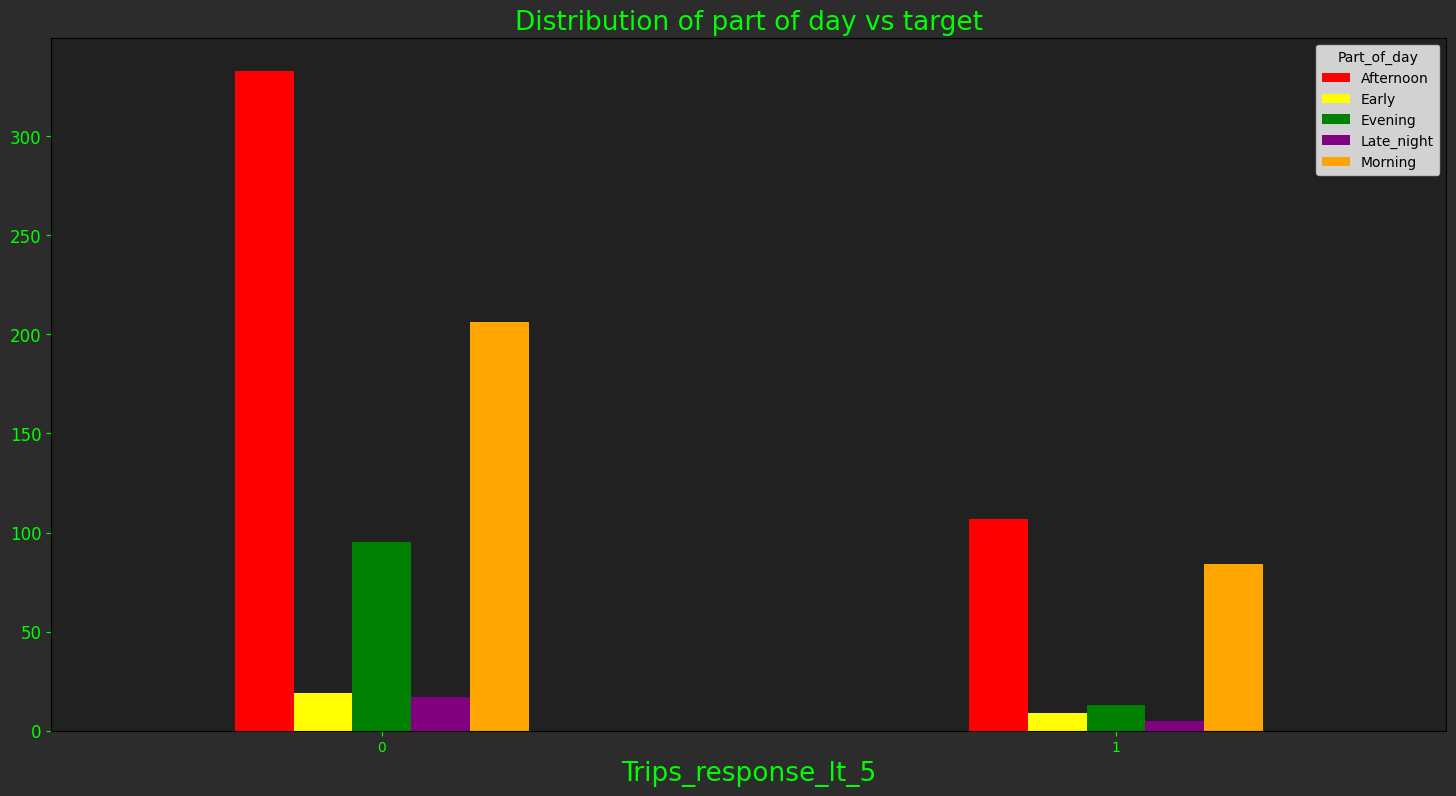

In [75]:
width_=0.4
fig = plt.figure(figsize=(18,9))
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.xaxis.label.set_size(19)
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

freq_by_Part_of_day_vs_target.plot(ax=ax,
                                kind='bar', 
                                color=['red','yellow','green','purple','orange'],
                                width=width_
                                  )

plt.xticks(rotation=0)
plt.yticks(fontsize=12)

plt.title('Distribution of part of day vs target', fontsize=19)
plt.show()

<h1 style="color: green;">Summary of EDA</h1>
<p>
The majority of numeric features exhibit a right skewed distribution with a dominant value of 0.<br><br>
With respect to outliers, other than features derived from Total_Price, the majority of the features<br>
are dominated by 0, hence the effect of 0 on statistical measures is greater than the effect of values<br>
farther from 0 i.e. the real outlier is the value 0.<br>
<b style="color: green;">If this is not clear to you, please ask and I will explain :)</b>
</p>